In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
display(df.head())
df['result'].value_counts()


FileNotFoundError: [Errno 2] No such file or directory: 'data/auth_parsed.csv'

In [ ]:
df.set_index('timestamp', inplace=True)
df.resample('1H')['result'].count().plot(title='Events per hour')
plt.xlabel('Time')
plt.ylabel('Number of events')


In [ ]:
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])
display(feat.head())
feat[['cnt_last_1m','cnt_last_5m','cnt_last_15m']].describe()


In [ ]:
plt.figure()
feat['cnt_last_5m'].hist(bins=50)
plt.title('Distribution of events per IP in last 5 minutes')
plt.xlabel('Count')
plt.ylabel('Frequency')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# ÿ™ÿ®ÿ≥Ÿäÿ∑: ÿ≥ŸÜÿπÿ™ÿ®ÿ± ÿßŸÑÿ≠ÿØÿ´ ŸÖÿ¥ÿ®ŸàŸá ÿ•ÿ∞ÿß ŸÉÿßŸÜ event_result == 'failed'
feat = feat.dropna(subset=['event_result'])
feat['label'] = feat['event_result'].apply(lambda x: 1 if x=='failed' else 0)

X = feat[['cnt_last_1m','cnt_last_5m','cnt_last_15m','fail_rate']].values
y = feat['label'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
import joblib
joblib.dump(model, 'models/logreg_baseline.joblib')
print("Saved model to models/logreg_baseline.joblib")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
df = pd.read_csv('../data/auth_features.csv')

# ÿπÿ±ÿ∂ ÿ£ŸàŸÑ 5 ÿµŸÅŸàŸÅ ŸÑŸÑÿ™ÿ£ŸÉÿØ
display(df.head())

# ŸÜŸÅÿ™ÿ±ÿ∂ ÿ£ŸÜ ŸÑÿØŸäŸÜÿß ÿπŸÖŸàÿØ target = 1 (ŸÖÿ¥ÿ®ŸàŸá) ÿ£Ÿà 0 (ÿπÿßÿØŸä)
# ÿ•ÿ∞ÿß ŸÑŸÖ ŸäŸÉŸÜ ŸÖŸàÿ¨ŸàÿØŸãÿßÿå ÿ≥ŸÜŸÜÿ¥ÿ¶ ÿπŸÖŸàÿØŸãÿß ÿ®ÿ≥Ÿäÿ∑Ÿãÿß ŸÖÿ§ŸÇÿ™Ÿãÿß
if 'target' not in df.columns:
    # ŸÇÿßÿπÿØÿ© ŸÖÿ§ŸÇÿ™ÿ©: ÿ•ÿ∞ÿß ŸÅÿ¥ŸÑ ÿßŸÑÿØÿÆŸàŸÑ ÿ£ŸÉÿ´ÿ± ŸÖŸÜ 3 ŸÖÿ±ÿßÿ™ ŸÅŸä ÿßŸÑÿØŸÇŸäŸÇÿ© = ŸÖÿ¥ÿ®ŸàŸá
    df['target'] = (df['fail_count'] > 3).astype(int)

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸÑŸÑÿ™ÿØÿ±Ÿäÿ®
features = ['fail_count', 'success_count', 'unique_users', 'hour']
X = df[features]
y = df['target']

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ ÿ™ÿØÿ±Ÿäÿ® ŸàÿßÿÆÿ™ÿ®ÿßÿ±
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
model = LogisticRegression()

# ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
model.fit(X_train, y_train)

# ÿßŸÑÿ™ŸÇŸäŸäŸÖ
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
joblib.dump(model, '../models/logreg_baseline.joblib')
print("‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÅŸä ../models/logreg_baseline.joblib")


In [ ]:
df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
print(df.isnull().mean())            # ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿßÿ±ÿ∫ÿ© ŸÑŸÉŸÑ ÿπŸÖŸàÿØ
print(df['result'].value_counts())   # ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])
print(feat.describe())               # ÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿπÿØÿØŸäÿ©


In [ ]:
import pandas as pd

# ŸÇÿ±ÿßÿ°ÿ© ŸÖŸÑŸÅÿßÿ™ CSV
df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])


In [ ]:
# ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÑŸÉŸÑ ÿπŸÖŸàÿØ
print("Missing values in auth_parsed.csv:")
print(df.isnull().mean())

print("\nMissing values in auth_features.csv:")
print(feat.isnull().mean())


In [ ]:
# ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÑŸÉŸÑ ÿπŸÖŸàÿØ
print("Missing values in auth_parsed.csv:")
print(df.isnull().mean())

print("\nMissing values in auth_features.csv:")
print(feat.isnull().mean())


In [ ]:
# ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÑŸÉŸÑ ÿπŸÖŸàÿØ
print("Missing values in auth_parsed.csv:")
print(df.isnull().mean())

print("\nMissing values in auth_features.csv:")
print(feat.isnull().mean())


In [ ]:
import pandas as pd
df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàŸÇÿ±ÿßÿ°ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])
print("ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result'].value_counts())

print("\nŸÜÿ≥ÿ®ÿ© ŸÉŸÑ ŸÅÿ¶ÿ©:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
# ------------------------------
print("\nÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features.csv:")
print(feat.describe())

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿµÿßŸÑÿ≠ÿ©
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nÿ™ŸÖ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ timestamp ÿ£Ÿà ip ŸÖŸÅŸÇŸàÿØ ÿ™ŸÖ ÿßÿ≥ÿ™ÿ®ÿπÿßÿØŸáÿß.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} ÿµŸÅŸàŸÅ")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} ÿµŸÅŸàŸÅ")

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© (Boxplot ÿ≥ÿ±Ÿäÿπ)
# ------------------------------
feat_clean[['duration', 'num_failures']].boxplot()
plt.title("Boxplot ŸÑŸÑŸÇŸäŸÖ ÿßŸÑÿπÿØÿØŸäÿ©")
plt.show()


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàŸÇÿ±ÿßÿ°ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])
print("ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result'].value_counts())

print("\nŸÜÿ≥ÿ®ÿ© ŸÉŸÑ ŸÅÿ¶ÿ©:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
# ------------------------------
print("\nÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features.csv:")
print(feat.describe())

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿµÿßŸÑÿ≠ÿ©
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nÿ™ŸÖ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ timestamp ÿ£Ÿà ip ŸÖŸÅŸÇŸàÿØ ÿ™ŸÖ ÿßÿ≥ÿ™ÿ®ÿπÿßÿØŸáÿß.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} ÿµŸÅŸàŸÅ")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} ÿµŸÅŸàŸÅ")

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© (Boxplot ÿ≥ÿ±Ÿäÿπ)
# ------------------------------
feat_clean[['duration', 'num_failures']].boxplot()
plt.title("Boxplot ŸÑŸÑŸÇŸäŸÖ ÿßŸÑÿπÿØÿØŸäÿ©")
plt.show()


In [ ]:
df = pd.read_csv('C:/Users/Bakri/Documents/csv_files/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('C:/Users/Bakri/Documents/csv_files/auth_features.csv', parse_dates=['timestamp'])


In [ ]:
import os
import pandas as pd

# ŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑŸÖŸÑŸÅÿßÿ™
parsed_path = 'data/auth_parsed.csv'
features_path = 'data/auth_features.csv'

# ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
if os.path.exists(parsed_path) and os.path.exists(features_path):
    # ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
    df = pd.read_csv(parsed_path, parse_dates=['timestamp'])
    feat = pd.read_csv(features_path, parse_dates=['timestamp'])
    print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")
else:
    # ÿ•ÿπŸÑÿßŸÖ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖ ÿ®ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
    if not os.path.exists(parsed_path):
        print(f"ŸÖŸÑŸÅ ŸÖŸÅŸÇŸàÿØ: {parsed_path}")
    if not os.path.exists(features_path):
        print(f"ŸÖŸÑŸÅ ŸÖŸÅŸÇŸàÿØ: {features_path}")
    print("ÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿ£ŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÇÿ®ŸÑ ÿßŸÑŸÖÿ™ÿßÿ®ÿπÿ©.")


In [ ]:
import os

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ ŸÖÿ¨ŸÑÿØ data
print(os.listdir('data'))


In [ ]:
import os

# ÿ•ÿ∏Ÿáÿßÿ± ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿ≠ÿßŸÑŸä ŸÑŸÑŸÄ Notebook
print("ÿßŸÑŸÖÿ¨ŸÑÿØ ÿßŸÑÿ≠ÿßŸÑŸä ŸÑŸÑŸÄ Notebook:")
print(os.getcwd())


In [ ]:
df = pd.read_csv('../data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features.csv', parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÖŸÜ scripts ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result'].value_counts())

print("\nŸÜÿ≥ÿ®ÿ© ŸÉŸÑ ŸÅÿ¶ÿ©:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ŸÅÿ≠ÿµ ÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
# ------------------------------
print("\nÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features.csv:")
print(feat.describe())

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿµÿßŸÑÿ≠ÿ©
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nÿ™ŸÖ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ timestamp ÿ£Ÿà ip ŸÖŸÅŸÇŸàÿØ ÿ™ŸÖ ÿßÿ≥ÿ™ÿ®ÿπÿßÿØŸáÿß.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} ÿµŸÅŸàŸÅ")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} ÿµŸÅŸàŸÅ")

# ------------------------------
# ÿÆŸÑŸäÿ© 7: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© (Boxplot ÿ≥ÿ±Ÿäÿπ)
# ------------------------------
feat_clean[['duration', 'num_failures']].boxplot()
plt.title("Boxplot ŸÑŸÑŸÇŸäŸÖ ÿßŸÑÿπÿØÿØŸäÿ©")
plt.show()


In [ ]:
print("ÿ£ÿ≥ŸÖÿßÿ° ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÅŸä auth_features.csv:")
print(feat_clean.columns)


In [ ]:
# ÿ±ÿ≥ŸÖ Boxplot ŸÑÿ¨ŸÖŸäÿπ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

feat_clean[numeric_cols].boxplot(figsize=(10,6))
plt.title("Boxplot ŸÑŸÑŸÇŸäŸÖ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÖŸÜ scripts ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['res]()


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÖŸÜ scripts ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result']()


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÖŸÜ scripts ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result'].value_counts())  # ÿ™ÿµÿ≠Ÿäÿ≠ ÿßŸÑÿßÿ≥ŸÖ ŸàÿßŸÑÿ£ŸÇŸàÿßÿ≥

print("\nŸÜÿ≥ÿ®ÿ© ŸÉŸÑ ŸÅÿ¶ÿ©:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ŸÅÿ≠ÿµ ÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
# ------------------------------
print("\nÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features.csv:")
print(feat.describe())

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿµÿßŸÑÿ≠ÿ©
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nÿ™ŸÖ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ timestamp ÿ£Ÿà ip ŸÖŸÅŸÇŸàÿØ ÿ™ŸÖ ÿßÿ≥ÿ™ÿ®ÿπÿßÿØŸáÿß.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} ÿµŸÅŸàŸÅ")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} ÿµŸÅŸàŸÅ")

# -----


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline  # ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÖŸÜ scripts ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ----------------------------


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline  # ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÖŸÜ scripts ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_featur_


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline  # ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÖŸÜ scripts ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result']()


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline  # ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÖŸÜ scripts ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸàÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline  # ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÖŸÜ scripts ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result'].value_counts())  # ÿµÿ≠Ÿäÿ≠ ÿ®ÿØŸàŸÜ ÿ£ŸÇŸàÿßÿ≥ ÿ•ÿ∂ÿßŸÅŸäÿ©

print("\nŸÜÿ≥ÿ®ÿ© ŸÉŸÑ ŸÅÿ¶ÿ©:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ŸÅÿ≠ÿµ ÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
# ------------------------------
print("\nÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features.csv:")
print(feat.describe())

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿµÿßŸÑÿ≠ÿ©
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nÿ™ŸÖ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ timestamp ÿ£Ÿà ip ŸÖŸÅŸÇŸàÿØ ÿ™ŸÖ ÿßÿ≥ÿ™ÿ®ÿπÿßÿØŸáÿß.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} ÿµŸÅŸàŸÅ")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} ÿµŸÅŸàŸÅ")

# ------------------------------
# ÿÆŸÑŸäÿ© 7: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© (Boxplot ŸÑŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ©)
# ------------------------------
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

# ÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÅÿπŸÑŸäÿßŸã
existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]

# ÿ±ÿ≥ŸÖ Boxplot
feat_clean[existing_numeric_cols].boxplot(figsize=(10,6))
plt.title("Boxplot ŸÑŸÑŸÇŸäŸÖ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline  # ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑŸÜÿ≥ÿ®Ÿä ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())  # ÿ™ÿµÿ≠Ÿäÿ≠ ÿßŸÑÿ£ŸÇŸàÿßÿ≥

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result'].value_counts())

print("\nŸÜÿ≥ÿ®ÿ© ŸÉŸÑ ŸÅÿ¶ÿ©:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ŸÅÿ≠ÿµ ÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
# ------------------------------
print("\nÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features.csv:")
print(feat.describe())

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿµÿßŸÑÿ≠ÿ©
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean =_


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline
# ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑŸÜÿ≥ÿ®Ÿä ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline
# ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑŸÜÿ≥ÿ®Ÿä ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result'].value_counts())

print("\nŸÜÿ≥ÿ®ÿ© ŸÉŸÑ ŸÅÿ¶ÿ©:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ŸÅÿ≠ÿµ ÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
# ------------------------------
print("\nÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features.csv:")
print(feat.describe())

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿµÿßŸÑÿ≠ÿ©
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nÿ™ŸÖ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ timestamp ÿ£Ÿà ip ŸÖŸÅŸÇŸàÿØ ÿ™ŸÖ ÿßÿ≥ÿ™ÿ®ÿπÿßÿØŸáÿß.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} ÿµŸÅŸàŸÅ")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} ÿµŸÅŸàŸÅ")

# ------------------------------
# ÿÆŸÑŸäÿ© 7: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© (Boxplot ŸÑŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ©)
# ------------------------------
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÇÿ®ŸÑ ÿßŸÑÿ±ÿ≥ŸÖ
existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]

# ÿ±ÿ≥ŸÖ Boxplot
feat_clean[existing_numeric_cols].boxplot(figsize=(10,6))
plt.title("Boxplot ŸÑŸÑŸÇŸäŸÖ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline
# ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑŸÜÿ≥ÿ®Ÿä ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result'].value_counts())

print("\nŸÜÿ≥ÿ®ÿ© ŸÉŸÑ ŸÅÿ¶ÿ©:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ŸÅÿ≠ÿµ ÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
# ------------------------------
print("\nÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features.csv:")
print(feat.describe())

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿµÿßŸÑÿ≠ÿ©
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nÿ™ŸÖ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ timestamp ÿ£Ÿà ip ŸÖŸÅŸÇŸàÿØ ÿ™ŸÖ ÿßÿ≥ÿ™ÿ®ÿπÿßÿØŸáÿß.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} ÿµŸÅŸàŸÅ")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} ÿµŸÅŸàŸÅ")

# ------------------------------
# ÿÆŸÑŸäÿ© 7: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© (Boxplot ŸÑŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ©)
# ------------------------------
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÇÿ®ŸÑ ÿßŸÑÿ±ÿ≥ŸÖ
existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]

# ÿ±ÿ≥ŸÖ Boxplot
feat_clean[existing_numeric_cols].boxplot(figsize=(10,6))
plt.title("Boxplot ŸÑŸÑŸÇŸäŸÖ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline
# ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑŸÜÿ≥ÿ®Ÿä ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ data
data_path = '../data'

# ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿØÿßÿÆŸÑ data ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data:")
print(os.listdir(data_path))

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_parsed.csv:")
print(df.isnull().mean())

print("\nŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ŸÅÿ≠ÿµ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ------------------------------
print("\nÿ™ÿπÿØÿßÿØ ŸÅÿ¶ÿßÿ™ 'result' ŸÅŸä auth_parsed.csv:")
print(df['result'].value_counts())

print("\nŸÜÿ≥ÿ®ÿ© ŸÉŸÑ ŸÅÿ¶ÿ©:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ŸÅÿ≠ÿµ ÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
# ------------------------------
print("\nÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features.csv:")
print(feat.describe())

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿµÿßŸÑÿ≠ÿ©
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nÿ™ŸÖ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ timestamp ÿ£Ÿà ip ŸÖŸÅŸÇŸàÿØ ÿ™ŸÖ ÿßÿ≥ÿ™ÿ®ÿπÿßÿØŸáÿß.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} ÿµŸÅŸàŸÅ")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} ÿµŸÅŸàŸÅ")

# ------------------------------
# ÿÆŸÑŸäÿ© 7: ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© (Boxplot ŸÑŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ©)
# ------------------------------
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÇÿ®ŸÑ ÿßŸÑÿ±ÿ≥ŸÖ
existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]

# ÿ±ÿ≥ŸÖ Boxplot
feat_clean[existing_numeric_cols].boxplot(figsize=(10,6))
plt.title("Boxplot ŸÑŸÑŸÇŸäŸÖ ÿßŸÑÿπÿØÿØŸäÿ© ŸÅŸä auth_features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------
# 1Ô∏è‚É£ ÿ™ŸàŸÇÿπ ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# --------------------------------------
y_prob = model.predict_proba(X_test)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÅÿ¶ÿ© failed
y_true = y_test

# --------------------------------------
# 2Ô∏è‚É£ ÿ≠ÿ≥ÿßÿ® Precision, Recall, F1 ŸÖÿπ threshold ÿßŸÅÿ™ÿ±ÿßÿ∂Ÿä 0.5
# --------------------------------------
threshold_default = 0.5
y_pred = (y_prob >= threshold_default).astype(int)

print("=== ÿßŸÑÿ™ŸÇÿßÿ±Ÿäÿ± ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂Ÿäÿ© (threshold=0.5) ===")
print(classification_report(y_true, y_pred, target_names=['success','failed']))

roc_auc = roc_auc_score(y_true, y_prob)
print("ROC AUC:", roc_auc)

prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(rec, prec)
print("PR AUC:", pr_auc)

# --------------------------------------
# 3Ô∏è‚É£ ÿ±ÿ≥ŸÖ ROC curve
# --------------------------------------
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# --------------------------------------
# 4Ô∏è‚É£ ÿ±ÿ≥ŸÖ Precision-Recall curve
# --------------------------------------
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'PR curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# --------------------------------------
# 5Ô∏è‚É£ ÿ∂ÿ®ÿ∑ threshold ŸÑŸÑŸàÿµŸàŸÑ ÿ•ŸÑŸâ Recall ‚â• 0.8
# --------------------------------------
target_recall = 0.8

# ÿ•Ÿäÿ¨ÿßÿØ ÿ£ŸàŸÑ threshold Ÿäÿ≠ŸÇŸÇ ÿßŸÑŸáÿØŸÅ
thresholds = np.linspace(0,1,101)
best_threshold = 0.5  # ÿßŸÅÿ™ÿ±ÿßÿ∂Ÿä
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tp = ((y_true==1) & (y_pred_t==1)).sum()
    fn = ((y_true==1) & (y_pred_t==0)).sum()
    recall_t = tp / (tp + fn) if (tp+fn)>0 else 0
    if recall_t >= target_recall:
        best_threshold = t
        break

print(f"\nÿ£ŸÅÿ∂ŸÑ threshold ŸÑÿ™ÿ≠ŸÇŸäŸÇ Recall ‚â• {target_recall}: {best_threshold:.2f}")

# --------------------------------------
# 6Ô∏è‚É£ ÿ•ÿπÿßÿØÿ© ÿßŸÑÿ≠ÿ≥ÿßÿ® ŸÖÿπ threshold ÿßŸÑÿ¨ÿØŸäÿØ
# --------------------------------------
y_pred_best = (y_prob >= best_threshold).astype(int)
print("\n=== ÿßŸÑÿ™ŸÇÿßÿ±Ÿäÿ± ÿ®ÿπÿØ ÿ∂ÿ®ÿ∑ threshold ===")
print(classification_report(y_true, y_pred_best, target_names=['success','failed']))

# ÿ±ÿ≥ŸÖ ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_best, display_labels=['success','failed'])
plt.show()


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------
# 1Ô∏è‚É£ ÿ™ŸàŸÇÿπ ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# --------------------------------------
y_prob = model.predict_proba(X_test)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÅÿ¶ÿ© failed
y_true = y_test

# --------------------------------------
# 2Ô∏è‚É£ ÿ≠ÿ≥ÿßÿ® Precision, Recall, F1 ŸÖÿπ threshold ÿßŸÅÿ™ÿ±ÿßÿ∂Ÿä 0.5
# --------------------------------------
threshold_default = 0.5
y_pred = (y_prob >= threshold_default).astype(int)

print("=== ÿßŸÑÿ™ŸÇÿßÿ±Ÿäÿ± ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂Ÿäÿ© (threshold=0.5) ===")
print(classification_report(y_true, y_pred, target_names=['success','failed']))

roc_auc = roc_auc_score(y_true, y_prob)
print("ROC AUC:", roc_auc)

prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(rec, prec)
print("PR AUC:", pr_auc)

# --------------------------------------
# 3Ô∏è‚É£ ÿ±ÿ≥ŸÖ ROC curve
# --------------------------------------
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# --------------------------------------
# 4Ô∏è‚É£ ÿ±ÿ≥ŸÖ Precision-Recall curve
# --------------------------------------
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'PR curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# --------------------------------------
# 5Ô∏è‚É£ ÿ∂ÿ®ÿ∑ threshold ŸÑŸÑŸàÿµŸàŸÑ ÿ•ŸÑŸâ Recall ‚â• 0.8
# --------------------------------------
target_recall = 0.8

# ÿ•Ÿäÿ¨ÿßÿØ ÿ£ŸàŸÑ threshold Ÿäÿ≠ŸÇŸÇ ÿßŸÑŸáÿØŸÅ
thresholds = np.linspace(0,1,101)
best_threshold = 0.5  # ÿßŸÅÿ™ÿ±ÿßÿ∂Ÿä
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tp = ((y_true==1) & (y_pred_t==1)).sum()
    fn = ((y_true==1) & (y_pred_t==0)).sum()
    recall_t = tp / (tp + fn) if (tp+fn)>0 else 0
    if recall_t >= target_recall:
        best_threshold = t
        break

print(f"\nÿ£ŸÅÿ∂ŸÑ threshold ŸÑÿ™ÿ≠ŸÇŸäŸÇ Recall ‚â• {target_recall}: {best_threshold:.2f}")

# --------------------------------------
# 6Ô∏è‚É£ ÿ•ÿπÿßÿØÿ© ÿßŸÑÿ≠ÿ≥ÿßÿ® ŸÖÿπ threshold ÿßŸÑÿ¨ÿØŸäÿØ
# --------------------------------------
y_pred_best = (y_prob >= best_threshold).astype(int)
print("\n=== ÿßŸÑÿ™ŸÇÿßÿ±Ÿäÿ± ÿ®ÿπÿØ ÿ∂ÿ®ÿ∑ threshold ===")
print(classification_report(y_true, y_pred_best, target_names=['success','failed']))

# ÿ±ÿ≥ŸÖ ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_best, display_labels=['success','failed'])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# X: ŸÉŸÑ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿ£Ÿà ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸÖÿÆÿ™ÿßÿ±ÿ©
# y: ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸÖÿ≥ÿ™ŸáÿØŸÅ 'result' (0=success, 1=failed)
X = feat_clean[existing_numeric_cols]  # ŸÖÿ´ÿßŸÑÿå ÿßÿÆÿ™Ÿäÿßÿ±ÿßÿ™ŸÉ ŸÑŸÑŸÖŸäÿ≤ÿßÿ™
y = df_clean['result'].map({'success':0, 'failed':1})  # ÿ™ÿ≠ŸàŸäŸÑ ÿ•ŸÑŸâ 0/1

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
import pandas as pd
import os

data_path = '../data'

# ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

# ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä timestamp ÿ£Ÿà ip
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ©
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]


In [ ]:
print(df_clean.shape)
print(feat_clean.shape)
print(existing_numeric_cols)


In [ ]:
from sklearn.model_selection import train_test_split

# X: ŸÉŸÑ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿ£Ÿà ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸÖÿÆÿ™ÿßÿ±ÿ©
X = feat_clean[existing_numeric_cols]

# y: ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸÖÿ≥ÿ™ŸáÿØŸÅ 'result' ŸÖŸÜ df_cleanÿå ÿ™ÿ≠ŸàŸäŸÑ success=0, failed=1
y = df_clean['result'].map({'success':0, 'failed':1})

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
# ÿØŸÖÿ¨ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ≠ÿ≥ÿ® 'timestamp' Ÿà 'ip' ÿ£Ÿà ÿ£Ÿä ÿπŸÖŸàÿØ ŸÖÿ¥ÿ™ÿ±ŸÉ
data_merged = pd.merge(df_clean, feat_clean, on=['timestamp', 'ip'], how='inner')

# ÿßŸÑÿ¢ŸÜ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ X ŸàÿßŸÑÿ£ŸáÿØÿßŸÅ y ŸÖŸÜ ŸÜŸÅÿ≥ DataFrame
X = data_merged[existing_numeric_cols]  # ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
y = data_merged['result'].map({'success':0, 'failed':1})


In [ ]:
print(X.shape)
print(y.shape)


In [ ]:
print(df_clean.shape)print(df_clean.shape)
print(feat_clean.shape)
print(feat_clean.shape)


In [ ]:
print(df_clean.shape)
print(feat_clean.shape)


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline
# ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay, roc_curve

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
data_path = '../data'

df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")
print("ÿ£ÿ®ÿπÿßÿØ df:", df.shape)
print("ÿ£ÿ®ÿπÿßÿØ feat:", feat.shape)

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (ŸÑÿß ŸÜŸÅŸÇÿØ ÿßŸÑÿµŸÅŸàŸÅ)
# ------------------------------
df_clean = df.copy()
feat_clean = feat.copy()

# ÿπÿ±ÿ∂ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ©
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]
print("ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØ


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay, roc_curve

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
data_path = '../data'

df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")
print("ÿ£ÿ®ÿπÿßÿØ df:", df.shape)
print("ÿ£ÿ®ÿπÿßÿØ feat:", feat.shape)

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (ŸÑÿß ŸÜŸÅŸÇÿØ ÿßŸÑÿµŸÅŸàŸÅ)
# ------------------------------
df_clean = df.copy()
feat_clean = feat.copy()

# ÿπÿ±ÿ∂ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ©
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]
print("ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖÿ©:", existing_numeric_cols)

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ÿØŸÖÿ¨ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÖÿπ ÿßŸÑÿ≠ŸÅÿßÿ∏ ÿπŸÑŸâ ÿ£ŸÉÿ®ÿ± ÿπÿØÿØ ŸÖŸÖŸÉŸÜ ŸÖŸÜ ÿßŸÑÿµŸÅŸàŸÅ
# ------------------------------
data_merged = pd.merge(df_clean, feat_clean, on=['timestamp', 'ip'], how='left')

# ŸÖŸÑÿ° ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÑŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿ®ŸÄ 0
for col in existing_numeric_cols:
    data_merged[col] = data_merged[col].fillna(0)

print("ÿ£ÿ®ÿπÿßÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ ÿßŸÑÿØŸÖÿ¨:", data_merged.shape)

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ÿ®ŸÜÿßÿ° X Ÿà y
# ------------------------------
X = data_merged[existing_numeric_cols]
y = data_merged['result'].map({'success':0, 'failed':1})

print("X shape:", X.shape)
print("y shape:", y.shape)

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# ÿÆŸÑŸäÿ© 7: ÿ™ÿØÿ±Ÿäÿ® ŸÖŸàÿØŸäŸÑ RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# ÿÆŸÑŸäÿ© 8: ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÖŸàÿØŸäŸÑ
# ------------------------------
y_prob = model.predict_proba(X_test)[:,1]
y_true = y_test

# Threshold ÿßŸÅÿ™ÿ±ÿßÿ∂Ÿä 0.5
threshold_default = 0.5
y_pred = (y_prob >= threshold_default).astype(int)

print("=== ÿßŸÑÿ™ŸÇÿßÿ±Ÿäÿ± ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂Ÿäÿ© (threshold=0.5) ===")
print(classification_report(y_true, y_pred, target_names=['success','failed']))

roc_auc = roc_auc_score(y_tr)


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay, roc_curve

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
data_path = '../data'

df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")
print("ÿ£ÿ®ÿπÿßÿØ df:", df.shape)
print("ÿ£ÿ®ÿπÿßÿØ feat:", feat.shape)

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (ŸÑÿß ŸÜŸÅŸÇÿØ ÿßŸÑÿµŸÅŸàŸÅ)
# ------------------------------
df_clean = df.copy()
feat_clean = feat.copy()

# ÿπÿ±ÿ∂ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ©
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay, roc_curve

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
data_path = '../data'

df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")
print("ÿ£ÿ®ÿπÿßÿØ df:", df.shape)
print("ÿ£ÿ®ÿπÿßÿØ feat:", feat.shape)

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (ŸÑÿß ŸÜŸÅŸÇÿØ ÿßŸÑÿµŸÅŸàŸÅ)
# ------------------------------
df_clean = df.copy()
feat_clean = feat.copy()

# ÿπÿ±ÿ∂ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ©
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]
print("ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖÿ©:", existing_numeric_cols)

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ÿØŸÖÿ¨ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÖÿπ ÿßŸÑÿ≠ŸÅÿßÿ∏ ÿπŸÑŸâ ÿ£ŸÉÿ®ÿ± ÿπÿØÿØ ŸÖŸÖŸÉŸÜ ŸÖŸÜ ÿßŸÑÿµŸÅŸàŸÅ
# ------------------------------
data_merged = pd.merge(df_clean, feat_clean, on=['timestamp', 'ip'], how='left')

# ŸÖŸÑÿ° ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÑŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿ®ŸÄ 0
for col in existing_numeric_cols:
    data_merged[col] = data_merged[col].fillna(0)

print("ÿ£ÿ®ÿπÿßÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ ÿßŸÑÿØŸÖÿ¨:", data_merged.shape)

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ÿ®ŸÜÿßÿ° X Ÿà y ŸÖÿπ ÿ•ÿ≤ÿßŸÑÿ© ÿ£Ÿä NaN ŸÅŸä y
# ------------------------------
data_final = data_merged.dropna(subset=['result'])  # ÿ≠ÿ∞ŸÅ ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ŸÅŸäŸáÿß y ŸÖŸÅŸÇŸàÿØ

X = data_final[existing_numeric_cols]
y = data_final['result'].map({'success':0, 'failed':1})

print("X shape ÿ®ÿπÿØ ÿ•ÿ≤ÿßŸÑÿ© NaN ŸÅŸä y:", X.shape)
print("y shape ÿ®ÿπÿØ ÿ•ÿ≤ÿßŸÑÿ© NaN ŸÅŸä y:", y.shape)
print("ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ ŸÑŸÉŸÑ ŸÅÿ¶ÿ©:")
print(y.value_counts())

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# ÿÆŸÑŸäÿ© 7: ÿ™ÿØÿ±Ÿäÿ® ŸÖŸàÿØŸäŸÑ RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# ÿÆŸÑŸäÿ© 8: ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÖŸàÿØŸäŸÑ
# ------------------------------
y_prob = model.predict_proba(X_test)[:,1]
y_true = y_test

# Threshold ÿßŸÅÿ™ÿ±ÿßÿ∂Ÿä 0.5
threshold_default = 0.5
y_pred = (y_prob >= threshold_default).astype(int)

print("=== ÿßŸÑÿ™ŸÇÿßÿ±Ÿäÿ± ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂Ÿäÿ© (threshold=0.5) ===")
print(classification_report(y_true, y_pred, target_names=['success','failed']))

roc_auc = roc_auc_score(y_true, y_prob)
print("ROC AUC:", roc_auc)

prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(rec, prec)
print("PR AUC:", pr_auc)

# ÿ±ÿ≥ŸÖ ROC curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ÿ±ÿ≥ŸÖ Precision-Recall curve
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'PR curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ------------------------------
# ÿÆŸÑŸäÿ© 9: ÿ∂ÿ®ÿ∑ threshold ŸÑŸÑŸàÿµŸàŸÑ ÿ•ŸÑŸâ Recall ‚â• 0.8
# ------------------------------
target_recall = 0.8
thresholds = np.linspace(0,1,101)
best_threshold = 0.5
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tp = ((y_true==1) & (y_pred_t==1)).sum()
    fn = ((y_true==1) & (y_pred_t==0)).sum()
    recall_t = tp / (tp + fn) if (tp+fn)>0 else 0
    if recall_t >= target_recall:
        best_threshold = t
        break

print(f"\nÿ£ŸÅÿ∂ŸÑ threshold ŸÑÿ™ÿ≠ŸÇŸäŸÇ Recall ‚â• {target_recall}: {best_threshold:.2f}")

y_pred_best = (y_prob >= best_threshold).astype(int)
print("\n=== ÿßŸÑÿ™ŸÇÿßÿ±Ÿäÿ± ÿ®ÿπÿØ ÿ∂ÿ®ÿ∑ threshold ===")
print(classification_report(y_true, y_pred_best, target_names=['success','failed']))

ConfusionMatrixDisplay.from_predictions(y_true, y_pred_best, display_labels=['success','failed'])
plt.show()


In [ ]:
# ------------------------------
# ÿÆŸÑŸäÿ© 1: ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ + ÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ------------------------------
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay, roc_curve

# ------------------------------
# ÿÆŸÑŸäÿ© 2: ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
data_path = '../data'

df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

print("ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")
print("ÿ£ÿ®ÿπÿßÿØ df:", df.shape)
print("ÿ£ÿ®ÿπÿßÿØ feat:", feat.shape)

# ------------------------------
# ÿÆŸÑŸäÿ© 3: ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df_clean = df.copy()
feat_clean = feat.copy()

# ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ©
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]
print("ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖÿ©:", existing_numeric_cols)

# ------------------------------
# ÿÆŸÑŸäÿ© 4: ÿØŸÖÿ¨ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
data_merged = pd.merge(df_clean, feat_clean, on=['timestamp', 'ip'], how='left')

# ŸÖŸÑÿ° ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÑŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿ®ŸÄ 0
for col in existing_numeric_cols:
    data_merged[col] = data_merged[col].fillna(0)

print("ÿ£ÿ®ÿπÿßÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿπÿØ ÿßŸÑÿØŸÖÿ¨:", data_merged.shape)

# ------------------------------
# ÿÆŸÑŸäÿ© 5: ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿπŸÖŸàÿØ result
# ------------------------------
# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÇŸäŸÖ ÿ•ŸÑŸâ ŸÜÿµŸàÿµ Ÿàÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÅÿ±ÿßÿ∫ÿßÿ™
data_merged['result'] = data_merged['result'].astype(str).str.strip()

# ÿßŸÑÿßÿ≠ÿ™ŸÅÿßÿ∏ ÿ®ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿµÿ≠Ÿäÿ≠ÿ© ŸÅŸÇÿ∑
data_merged = data_merged[data_merged['result'].isin(['success','failed'])]

# ÿßŸÑÿ™ÿ≠ŸÇŸÇ ÿ®ÿπÿØ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ
print("ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ ÿ®ÿπÿØ ÿ™ŸÜÿ∏ŸäŸÅ result:", len(data_merged))
print("ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿ±ŸäÿØÿ© ŸÅŸä result:", data_merged['result'].unique())

# ------------------------------
# ÿÆŸÑŸäÿ© 6: ÿ®ŸÜÿßÿ° X Ÿà y
# ------------------------------
X = data_merged[existing_numeric_cols]
y = data_merged['result'].map({'success':0, 'failed':1})

print("ÿπÿØÿØ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿßÿ±ÿ∫ÿ© ŸÅŸä y:", y.isnull().sum())
print("X shape:", X.shape)
print("y shape:", y.shape)
print("ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ ŸÑŸÉŸÑ ŸÅÿ¶ÿ©:")
print(y.value_counts())

# ------------------------------
# ÿÆŸÑŸäÿ© 7: ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# ÿÆŸÑŸäÿ© 8: ÿ™ÿØÿ±Ÿäÿ® ŸÖŸàÿØŸäŸÑ RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# ÿÆŸÑŸäÿ© 9: ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÖŸàÿØŸäŸÑ
# ------------------------------
y_prob = model.predict_proba(X_test)[:,1]
y_true = y_test

# Threshold ÿßŸÅÿ™ÿ±ÿßÿ∂Ÿä 0.5
threshold_default = 0.5
y_pred = (y_prob >= threshold_default).astype(int)

print("=== ÿßŸÑÿ™ŸÇÿßÿ±Ÿäÿ± ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂Ÿäÿ© (threshold=0.5) ===")
print(classification_report(y_true, y_pred, target_names=['success','failed']))

roc_auc = roc_auc_score(y_true, y_prob)
print("ROC AUC:", roc_auc)

prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(rec, prec)
print("PR AUC:", pr_auc)

# ÿ±ÿ≥ŸÖ ROC curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ÿ±ÿ≥ŸÖ Precision-Recall curve
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'PR curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ------------------------------
# ÿÆŸÑŸäÿ© 10: ÿ∂ÿ®ÿ∑ threshold ŸÑŸÑŸàÿµŸàŸÑ ÿ•ŸÑŸâ Recall ‚â• 0.8
# ------------------------------
target_recall = 0.8
thresholds = np.linspace(0,1,101)
best_threshold = 0.5
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tp = ((y_true==1) & (y_pred_t==1)).sum()
    fn = ((y_true==1) & (y_pred_t==0)).sum()
    recall_t = tp / (tp + fn) if (tp+fn)>0 else 0
    if recall_t >= target_recall:
        best_threshold = t
        break

print(f"\nÿ£ŸÅÿ∂ŸÑ threshold ŸÑÿ™ÿ≠ŸÇŸäŸÇ Recall ‚â• {target_recall}: {best_threshold:.2f}")

y_pred_best = (y_prob >= best_threshold).astype(int)
print("\n=== ÿßŸÑÿ™ŸÇÿßÿ±Ÿäÿ± ÿ®ÿπÿØ ÿ∂ÿ®ÿ∑ threshold ===")
print(classification_report(y_true, y_pred_best, target_names=['success','failed']))

ConfusionMatrixDisplay.from_predictions(y_true, y_pred_best, display_labels=['success','failed'])
plt.show()


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸäÿ©
n_rows = 1000

# ÿ•ŸÜÿ¥ÿßÿ° timestamps ŸÖÿ™ÿ≥ŸÑÿ≥ŸÑÿ©
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='T')

# ÿ•ŸÜÿ¥ÿßÿ° ÿ®ŸäÿßŸÜÿßÿ™ auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸÑŸÅ
df.to_csv('data/auth_parsed_large.csv', index=False)
print("ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° auth_parsed_large.csv ÿ®ÿπÿØÿØ ÿµŸÅŸàŸÅ:", len(df))


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸäÿ©
n_rows = 1000

# ÿ•ŸÜÿ¥ÿßÿ° timestamps ŸÖÿ™ÿ≥ŸÑÿ≥ŸÑÿ©
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='T')

# ÿ•ŸÜÿ¥ÿßÿ° ÿ®ŸäÿßŸÜÿßÿ™ auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸÑŸÅ
df.to_csv('data/auth_parsed_large.csv', index=False)
print("ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° auth_parsed_large.csv ÿ®ÿπÿØÿØ ÿµŸÅŸàŸÅ:", len(df))


In [ ]:
import os

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖÿ¨ŸÑÿØ dataÿå ÿ•ÿ∞ÿß ŸÑŸÖ ŸäŸÉŸÜ ŸÖŸàÿ¨ŸàÿØŸãÿßÿå ÿ•ŸÜÿ¥ÿßÿ°Ÿá
os.makedirs('data', exist_ok=True)

print("ÿ™ŸÖ ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ŸÖÿ¨ŸÑÿØ data")



In [ ]:
df.to_csv('data/auth_parsed_large.csv', index=False)
feat.to_csv('data/auth_features_large.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸäÿ©
n_rows = 1000

# ÿ•ŸÜÿ¥ÿßÿ° timestamps ŸÖÿ™ÿ≥ŸÑÿ≥ŸÑÿ©
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='T')

# ÿ•ŸÜÿ¥ÿßÿ° ÿ®ŸäÿßŸÜÿßÿ™ auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸÑŸÅ
df.to_csv('data/auth_parsed_large.csv', index=False)
print("ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° auth_parsed_large.csv ÿ®ÿπÿØÿØ ÿµŸÅŸàŸÅ:", len(df))


In [ ]:
import pandas as pd
import numpy as np
import os

# ------------------------------
# 1Ô∏è‚É£ ÿ•ŸÜÿ¥ÿßÿ° ŸÖÿ¨ŸÑÿØ data ÿ•ÿ∞ÿß ŸÑŸÖ ŸäŸÉŸÜ ŸÖŸàÿ¨ŸàÿØ
# ------------------------------
os.makedirs('data', exist_ok=True)
print("‚úÖ ÿ™ŸÖ ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ŸÖÿ¨ŸÑÿØ data")

# ------------------------------
# 2Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸäÿ©
# ------------------------------
np.random.seed(42)
n_rows = 1000  # ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ

# timestamps ÿ®ÿßŸÑÿØŸÇÿßÿ¶ŸÇ
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# ÿ®ŸäÿßŸÜÿßÿ™ auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

# ÿ≠ŸÅÿ∏ auth_parsed_large.csv
df.to_csv('data/auth_parsed_large.csv', index=False)
print("‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° auth_parsed_large.csv ÿ®ÿπÿØÿØ ÿµŸÅŸàŸÅ:", len(df))

# ÿ®ŸäÿßŸÜÿßÿ™ auth_features
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df['ip'],
    'cnt_last_1m': np.random.randint(0,10, size=n_rows),
    'cnt_last_5m': np.random.randint(0,50, size=n_rows),
    'cnt_last_15m': np.random.randint(0,150, size=n_rows),
    'succ_count': np.random.randint(0,10, size=n_rows),
    'fail_count': np.random.randint(0,5, size=n_rows),
    'total_count': np.random.randint(1,15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': df['user'],
    'event_result': df['result']
})

# ÿ≠ŸÅÿ∏ auth_features_large.csv
feat.to_csv('data/auth_features_large.csv', index=False)
print("‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° auth_features_large.csv ÿ®ÿπÿØÿØ ÿµŸÅŸàŸÅ:", len(feat))

# ------------------------------
# 3Ô∏è‚É£ ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ¨ÿØŸäÿØÿ© ŸÑŸÑÿ™ÿ£ŸÉÿØ
# ------------------------------
df_check = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat_check = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

print("\nSample auth_parsed:")
print(df_check.head())

print("\nSample auth_features:")
print(feat_check.head())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ŸÖŸÜ auth_features_large.csv
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_check[numeric_cols]

# ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸÖÿ≥ÿ™ŸáÿØŸÅ: result (0=success, 1=failed)
y = df_check['result'].map({'success':0, 'failed':1})

print("X shape:", X.shape)
print("y value counts:\n", y.value_counts())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


In [ ]:
# ÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™ ŸÅÿ¶ÿ© failed
y_prob = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

# ÿ™ŸÇÿ±Ÿäÿ± classification
print(classification_report(y_test, y_pred))

# ROC-AUC
roc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc)

# PR-AUC
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print("PR AUC:", pr_auc)


In [ ]:
import pandas as pd
import numpy as np

n_rows = 5000  # ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='T')

df_large = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['10.0.0.1','10.0.0.2','192.168.0.1','192.168.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.7,0.3])  # 30% failed
})

df_large.to_csv('data/auth_parsed_large.csv', index=False)
print("ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° auth_parsed_large.csv ÿ®ÿπÿØÿØ ÿµŸÅŸàŸÅ:", len(df_large))


In [ ]:
import pandas as pd
import numpy as np

n_rows = 5000  # ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')  # ÿßÿ≥ÿ™ÿÆÿØŸÖ 'min' ÿ®ÿØŸÑ 'T'

# --------------------------
# ÿ•ŸÜÿ¥ÿßÿ° auth_parsed_large.csv
# --------------------------
df_large = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['10.0.0.1','10.0.0.2','192.168.0.1','192.168.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.7,0.3])  # 30% failed
})
df_large.to_csv('data/auth_parsed_large.csv', index=False)
print("‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° auth_parsed_large.csv ÿ®ÿπÿØÿØ ÿµŸÅŸàŸÅ:", len(df_large))

# --------------------------
# ÿ•ŸÜÿ¥ÿßÿ° auth_features_large.csv
# --------------------------
feat_large = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['10.0.0.1','10.0.0.2','192.168.0.1','192.168.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),


In [ ]:
import pandas as pd
import numpy as np

n_rows = 5000  # ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')  # ÿßÿ≥ÿ™ÿÆÿØŸÖ 'min' ÿ®ÿØŸÑ 'T'

# --------------------------
# ÿ•ŸÜÿ¥ÿßÿ° auth_parsed_large.csv
# --------------------------
df_large = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['10.0.0.1','10.0.0.2','192.168.0.1','192.168.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.7,0.3])
})
df_large.to_csv('data/auth_parsed_large.csv', index=False)
print("‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° auth_parsed_large.csv ÿ®ÿπÿØÿØ ÿµŸÅŸàŸÅ:", len(df_large))

# --------------------------
# ÿ•ŸÜÿ¥ÿßÿ° auth_features_large.csv
# --------------------------
feat_large = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['10.0.0.1','10.0.0.2','192.168.0.1','192.168.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows)
})
feat_large.to_csv('data/auth_features_large.csv', index=False)
print("‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° auth_features_large.csv ÿ®ÿπÿØÿØ ÿµŸÅŸàŸÅ:", len(feat_large))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

print("ÿ£ÿ®ÿπÿßÿØ auth_parsed:", df.shape)
print("ÿ£ÿ®ÿπÿßÿØ auth_features:", feat.shape)


In [ ]:
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ÿ®Ÿáÿß ŸÇŸäŸÖ ŸÖŸÅŸÇŸàÿØÿ©
df_clean = df.dropna()
feat_clean = feat.dropna()

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸÖÿ≥ÿ™ŸáÿØŸÅ ÿ•ŸÑŸâ 0/1
df_clean['result_bin'] = df_clean['result'].map({'success':0, 'failed':1})

print("ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ ÿ®ÿπÿØ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ:", len(df_clean))
print(df_clean['result_bin'].value_counts())


In [ ]:
# ŸÜÿÆÿ™ÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ŸÖŸÜ auth_features
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]

# ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸÖÿ≥ÿ™ŸáÿØŸÅ
y = df_clean['result_bin']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)

print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve

# ŸÑÿ™ŸÅÿπŸäŸÑ ÿπÿ±ÿ∂ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™ ÿØÿßÿÆŸÑ Notebook
%matplotlib inline

# ------------------------------
# 2Ô∏è‚É£ ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

print("ÿ£ÿ®ÿπÿßÿØ auth_parsed:", df.shape)
print("ÿ£ÿ®ÿπÿßÿØ auth_features:", feat.shape)

# ------------------------------
# 3Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸÖÿ≥ÿ™ŸáÿØŸÅ ÿ•ŸÑŸâ 0/1
df_clean['result_bin'] = df_clean['result'].map({'success':0, 'failed':1})

print("ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ ÿ®ÿπÿØ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ:", len(df_clean))
print(df_clean['result_bin'].value_counts())

# ------------------------------
# 4Ô∏è‚É£ ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸàÿßŸÑÿ£ŸáÿØÿßŸÅ
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result_bin']

print("X shape:", X.shape)
print("y shape:", y.shape)

# ------------------------------
# 5Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ ÿ™ÿØÿ±Ÿäÿ® ŸàÿßÿÆÿ™ÿ®ÿßÿ±
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

# ------------------------------
# 6Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 7Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ£ÿØÿßÿ°
# ------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÅÿ¶ÿ© failed

# ÿ™ŸÇÿ±Ÿäÿ± Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ÿ≠ÿ≥ÿßÿ® ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)

# ÿ≠ÿ≥ÿßÿ® Precision-Recall AUC
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)

print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# ------------------------------
# 8Ô∏è‚É£ ÿ±ÿ≥ŸÖ ŸÖŸÜÿ≠ŸÜŸâ ROC Ÿà Precision-Recall
# ------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(12,5))

# ROC curve
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall curve
plt.subplot(1,2,2)
plt.plot(rec, prec, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve

%matplotlib inline

# ------------------------------
# 2Ô∏è‚É£ ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 3Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()
df_clean['result_bin'] = df_clean['result'].map({'success':0, 'failed':1})

# ------------------------------
# 4Ô∏è‚É£ ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸàÿßŸÑÿ£ŸáÿØÿßŸÅ
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result_bin']

# ------------------------------
# 5Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 6Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 7Ô∏è‚É£ ÿ™ŸàŸÇÿπ ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™
# ------------------------------
y_prob = model.predict_proba(X_test)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÅÿ¶ÿ© failed

# ------------------------------
# 8Ô∏è‚É£ ÿßÿÆÿ™Ÿäÿßÿ± threshold ÿ™ŸÑŸÇÿßÿ¶ŸäŸãÿß
# ------------------------------
def select_threshold(y_true, y_prob, min_recall=0.8, min_precision=0.3):
    prec, rec, thresholds = precision_recall_curve(y_true, y_prob)
    # ÿßÿÆÿ™ÿ± ÿ£ŸàŸÑ threshold Ÿäÿ≠ŸÇŸÇ ÿßŸÑÿ¥ÿ±Ÿàÿ∑
    candidates = np.where((rec >= min_recall) & (prec >= min_precision))[0]
    if len(candidates) > 0:
        return thresholds[candidates[0]]
    # ÿ•ÿ∞ÿß ŸÑŸÖ ŸÜÿ¨ÿØ threshold ŸäŸÑÿ®Ÿä ÿßŸÑÿ¥ÿ±ÿ∑ÿå ÿßÿÆÿ™ÿ± ÿ£ÿπŸÑŸâ recall ŸÖŸÖŸÉŸÜ
    best_idx = np.argmax(rec)
    return thresholds[best_idx]

best_threshold = select_threshold(y_test, y_prob)
print(f"Threshold ÿ™ŸÑŸÇÿßÿ¶Ÿä ŸÖÿ≠ÿ≥ŸëŸÜ: {best_threshold:.2f}")

# ÿ™ÿ∑ÿ®ŸäŸÇ threshold
y_pred_thresh = (y_prob >= best_threshold).astype(int)

# ------------------------------
# 9Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ£ÿØÿßÿ°
# ------------------------------
print("\nClassification Report (ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ threshold ŸÖÿ≠ÿ≥ŸëŸÜ):")
print(classification_report(y_test, y_pred_thresh))

roc_auc = roc_auc_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# ------------------------------
# 10Ô∏è‚É£ ÿ±ÿ≥ŸÖ ÿßŸÑŸÖŸÜÿ≠ŸÜŸäÿßÿ™
# ------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rec, prec, label=f'PR AUC = {pr_auc:.2f}')
plt.axhline(0.3, color='red', linestyle='--', label='Precision ‚â• 0.3')
plt.axvline(0.8, color='green', linestyle='--', label='Recall ‚â• 0.8')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# ------------------------------
# 11Ô∏è‚É£ ÿØÿßŸÑÿ© ŸÑŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ÿ£Ÿä ÿ®ŸäÿßŸÜÿßÿ™ ÿ¨ÿØŸäÿØÿ©
# ------------------------------
def predict_new_data(new_feat_df, model, threshold, numeric_cols):
    """
    new_feat_df: ÿ®ŸäÿßŸÜÿßÿ™ Features ÿ¨ÿØŸäÿØÿ© (DataFrame)
    model: ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÖÿØÿ±ÿ®
    threshold: threshold ŸÖÿ≠ÿ≥ŸëŸÜ
    numeric_cols: ÿ£ÿ≥ŸÖÿßÿ° ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ© ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖÿ© ŸÅŸä ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
    """
    # ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ¨ÿØŸäÿØÿ©
    new_feat_df_clean = new_feat_df.dropna(subset=numeric_cols)
    
    # ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
    X_new = new_feat_df_clean[numeric_cols]
    
    # ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™
    y_prob_new = model.predict_proba(X_new)[:,1]
    
    # ÿ™ÿ∑ÿ®ŸäŸÇ threshold
    y_pred_new = (y_prob_new >= threshold).astype(int)
    
    # ÿ•ÿ∂ÿßŸÅÿ© ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÑŸÑŸÄ DataFrame
    new_feat_df_clean['pred_failed_prob'] = y_prob_new
    new_feat_df_clean['pred_failed'] = y_pred_new
    
    return new_feat_df_clean

# ------------------------------
# 12Ô∏è‚É£ ŸÖÿ´ÿßŸÑ ÿπŸÑŸâ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑÿØÿßŸÑÿ©
# ------------------------------
# ŸÜŸÅÿ™ÿ±ÿ∂ ÿ£ŸÜ ŸÑÿØŸäŸÜÿß ÿ®ŸäÿßŸÜÿßÿ™ Features ÿ¨ÿØŸäÿØÿ© ÿ®ÿßÿ≥ŸÖ new_features.csv
new_feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

predicted_df = predict_new_data(new_feat, model, best_threshold, numeric_cols)

# ÿπÿ±ÿ∂ ÿ®ÿπÿ∂ ÿßŸÑÿµŸÅŸàŸÅ ŸÑŸÑÿ™ÿ£ŸÉÿØ
predicted_df.head(10)


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

def evaluate_new_data(predicted_df, true_col='event_result', pred_col='pred_failed', prob_col='pred_failed_prob'):
    """
    predicted_df: DataFrame ÿ®ÿπÿØ ÿßŸÑÿ™ŸÜÿ®ÿ§
    true_col: ÿßÿ≥ŸÖ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑÿ≠ŸÇŸäŸÇŸä (0=success, 1=failed ÿ£Ÿà 'success'/'failed')
    pred_col: ÿßÿ≥ŸÖ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸÖŸÇÿØÿ± ŸÖŸÜ ÿßŸÑÿØÿßŸÑÿ© ÿßŸÑÿ≥ÿßÿ®ŸÇÿ©
    prob_col: ÿπŸÖŸàÿØ ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ©
    """
    # ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑÿ≠ŸÇŸäŸÇŸä
    if true_col not in predicted_df.columns:
        print(f"ŸÑÿß ŸäŸàÿ¨ÿØ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑÿ≠ŸÇŸäŸÇŸä '{true_col}' ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ¨ÿØŸäÿØÿ©ÿå ŸÑÿß ŸäŸÖŸÉŸÜ ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿ£ÿØÿßÿ°.")
        return
    
    # ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÇŸäŸÖ ÿ•ŸÑŸâ 0/1
    y_true = predicted_df[true_col].map({'success':0, 'failed':1})
    y_pred = predicted_df[pred_col]
    y_prob = predicted_df[prob_col]
    
    # ÿ™ŸÇÿ±Ÿäÿ± Classification
    print("------ Classification Report ------")
    print(classification_report(y_true, y_pred, zero_division=0))
    
    # ROC AUC
    roc = roc_auc_score(y_true, y_prob)
    print(f"ROC AUC: {roc:.3f}")
    
    # PR AUC
    prec, rec, _ = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(rec, prec)
    print(f"PR AUC: {pr_auc:.3f}")
    
    return roc, pr_auc

# ------------------------------
# ŸÖÿ´ÿßŸÑ ÿπŸÑŸâ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ
# ------------------------------
roc, pr_auc = evaluate_new_data(predicted_df, true_col='event_result')


In [ ]:
# ======================================================
# ‚úÖ Jupyter Notebook: ŸÉÿßŸÖŸÑ ŸÖŸÜ ÿßŸÑÿµŸÅÿ± ÿ≠ÿ™Ÿâ ÿßŸÑÿ™ŸÇŸäŸäŸÖ ŸÖÿπ ÿßŸÑÿ±ÿ≥ŸàŸÖÿßÿ™
# ======================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import os

# ------------------------------
# 1Ô∏è‚É£ ÿ•ŸÜÿ¥ÿßÿ° ŸÖÿ¨ŸÑÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ÿ∞ÿß ŸÑŸÖ ŸäŸÉŸÜ ŸÖŸàÿ¨ŸàÿØŸãÿß
# ------------------------------
os.makedirs('data', exist_ok=True)

# ------------------------------
# 2Ô∏è‚É£ ÿ•ŸÜÿ¥ÿßÿ° ÿ®ŸäÿßŸÜÿßÿ™ auth_parsed_large.csv Ÿà auth_features_large.csv
# ------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 100, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
feat.to_csv('data/auth_features_large.csv', index=False)

print("‚úÖ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ§Ÿáÿß ÿ®ŸÜÿ¨ÿßÿ≠:")
print("auth_parsed_large.csv:", df.shape)
print("auth_features_large.csv:", feat.shape)

# ------------------------------
# 3Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 4Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()

# ------------------------------
# 5Ô∏è‚É£ ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸàÿßŸÑŸáÿØŸÅ
# ------------------------------
y = df_clean['result'].map({'success':0, 'failed':1})
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 'succ_count', 'fail_count', 'total_count', 'fail_rate']
X = feat_clean[numeric_cols]

# ------------------------------
# 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ ÿßŸÑÿ™ŸÜÿ®ÿ§
# ------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÅÿ¶ÿ© failed

# ------------------------------
# 9Ô∏è‚É£ ÿßŸÑÿ™ŸÇŸäŸäŸÖ
# ------------------------------
print("\n------ Classification Report ------")
print(classification_report(y_test, y_pred, zero_division=0))

roc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc:.3f}")

prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print(f"PR AUC: {pr_auc:.3f}")

# ------------------------------
# üîπ ÿ±ÿ≥ŸÖ ROC Curve Ÿà Precision-Recall Curve
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve")

# Precision-Recall Curve
plt.subplot(1,2,2)
PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.title("Precision-Recall Curve")

plt.tight_layout()
plt.show()


In [ ]:
# ======================================================
# ‚úÖ ŸÉÿßŸÖŸÑ ÿßŸÑŸÉŸàÿØ ŸÖÿπ ÿßÿÆÿ™Ÿäÿßÿ± Threshold ŸÑÿ™ÿ≠ÿ≥ŸäŸÜ Recall ŸÑŸÅÿ¶ÿ© failed
# ======================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import os

# ------------------------------
# 1Ô∏è‚É£ ÿ•ŸÜÿ¥ÿßÿ° ŸÖÿ¨ŸÑÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ÿ∞ÿß ŸÑŸÖ ŸäŸÉŸÜ ŸÖŸàÿ¨ŸàÿØŸãÿß
# ------------------------------
os.makedirs('data', exist_ok=True)

# ------------------------------
# 2Ô∏è‚É£ ÿ•ŸÜÿ¥ÿßÿ° ÿ®ŸäÿßŸÜÿßÿ™ auth_parsed_large.csv Ÿà auth_features_large.csv
# ------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 100, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
feat.to_csv('data/auth_features_large.csv', index=False)

# ------------------------------
# 3Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 4Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()

# ------------------------------
# 5Ô∏è‚É£ ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸàÿßŸÑŸáÿØŸÅ
# ------------------------------
y = df_clean['result'].map({'success':0, 'failed':1})
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 'succ_count', 'fail_count', 'total_count', 'fail_rate']
X = feat_clean[numeric_cols]

# ------------------------------
# 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™
# ------------------------------
y_prob = model.predict_proba(X_test)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÅÿ¶ÿ© failed

# ------------------------------
# 9Ô∏è‚É£ ÿßÿÆÿ™Ÿäÿßÿ± Threshold ŸÑÿ™ÿ≠ÿ≥ŸäŸÜ Recall ŸÑŸÅÿ¶ÿ© failed
# ------------------------------
prec, rec, thresholds = precision_recall_curve(y_test, y_prob)

# ŸáÿØŸÅŸÜÿß: recall >= 0.8
desired_recall = 0.8
# ÿßÿÆÿ™ÿ± ÿ£ÿµÿ∫ÿ± threshold Ÿäÿ≠ŸÇŸÇ Ÿáÿ∞ÿß ÿßŸÑŸÄ recall
threshold_opt = thresholds[np.argmax(rec >= desired_recall)]
print(f"Threshold ÿßŸÑÿ£ŸÖÿ´ŸÑ ŸÑÿ™ÿ≠ŸÇŸäŸÇ recall ‚â• {desired_recall}: {threshold_opt:.3f}")

# ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÑŸÄ threshold ÿßŸÑÿ¨ÿØŸäÿØ
y_pred_opt = (y_prob >= threshold_opt).astype(int)

# ------------------------------
# üîπ ÿßŸÑÿ™ŸÇŸäŸäŸÖ ÿ®ÿπÿØ ÿ™ÿπÿØŸäŸÑ Threshold
# ------------------------------
print("\n------ Classification Report (ÿ®ÿπÿØ ÿ∂ÿ®ÿ∑ Threshold) ------")
print(classification_report(y_test, y_pred_opt, zero_division=0))

roc = roc_auc_score(y_test, y_prob)
pr_auc = auc(rec, prec)
print(f"ROC AUC: {roc:.3f}")
print(f"PR AUC: {pr_auc:.3f}")

# ------------------------------
# üîπ ÿ±ÿ≥ŸÖ ROC Curve Ÿà Precision-Recall Curve
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve")

# Precision-Recall Curve
plt.subplot(1,2,2)
PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.title("Precision-Recall Curve")

plt.tight_layout()
plt.show()


In [ ]:
# ----------------------------------------------
# üîπ ŸÖŸÉÿ™ÿ®ÿßÿ™
# ----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score

# ----------------------------------------------
# 0Ô∏è‚É£ ÿ™ŸàŸÑŸäÿØ ÿ®ŸäÿßŸÜÿßÿ™ ŸàŸáŸÖŸäÿ© ŸÉÿ®Ÿäÿ±ÿ©
# ----------------------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df['ip'],
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': df['user'],
    'event_result': df['result']
})

# ----------------------------------------------
# 1Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (ÿßÿÆÿ™Ÿäÿßÿ±Ÿä)
# ----------------------------------------------
df.to_csv('data/auth_parsed_large.csv', index=False)
feat.to_csv('data/auth_features_large.csv', index=False)
print("‚úîÔ∏è ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸàŸáŸÖŸäÿ© ŸÉÿ®Ÿäÿ±ÿ©")

# ----------------------------------------------
# 2Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ----------------------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()

# ----------------------------------------------
# 3Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ X Ÿà y
# ----------------------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result'].map({'success':0, 'failed':1})

print("\nÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸáÿØŸÅ y:")
print(y.value_counts())

# ----------------------------------------------
# 4Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------
# 5Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® RandomForest
# ----------------------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ----------------------------------------------
# 6Ô∏è‚É£ ÿ™ŸàŸÇÿπ ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™
# ----------------------------------------------
y_prob = model.predict_proba(X_test)[:,1]

# ----------------------------------------------
# 7Ô∏è‚É£ ÿßÿÆÿ™Ÿäÿßÿ± Threshold ÿ™ŸÑŸÇÿßÿ¶Ÿä ŸÑÿ™ÿ≠ŸÇŸäŸÇ Recall ‚â• 0.8 Ÿà Precision ‚â• 0.3
# ----------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# ÿ•Ÿäÿ¨ÿßÿØ ÿ£ŸÅÿ∂ŸÑ threshold
best_threshold = 0.5
for p, r, t in zip(precisions, recalls, np.append(thresholds,1.0)):
    if r >= 0.8 and p >= 0.3:
        best_threshold = t
        break

y_pred_custom = (y_prob >= best_threshold).astype(int)

print(f"\n‚úîÔ∏è ÿ£ŸÅÿ∂ŸÑ Threshold: {best_threshold:.3f}")
print("\n------ Classification Report (custom threshold) ------")
print(classification_report(y_test, y_pred_custom, zero_division=0))

roc = roc_auc_score(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print(f"ROC-AUC: {roc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

# ----------------------------------------------
# 8Ô∏è‚É£ Feature Importance
# ----------------------------------------------
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'feature': numeric_cols, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - RandomForest")
plt.show()

# ----------------------------------------------
# 9Ô∏è‚É£ Precision-Recall Curve
# ----------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(recalls, precisions, label=f'PR Curve (AUC={pr_auc:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ----------------------------------------------
# üîπ ŸÖŸÉÿ™ÿ®ÿßÿ™
# ----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score
import joblib  # ŸÑÿ≠ŸÅÿ∏ Ÿàÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸàÿØŸäŸÑ

# ----------------------------------------------
# 0Ô∏è‚É£ ÿ™ŸàŸÑŸäÿØ ÿ®ŸäÿßŸÜÿßÿ™ ŸàŸáŸÖŸäÿ© ŸÉÿ®Ÿäÿ±ÿ©
# ----------------------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df['ip'],
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': df['user'],
    'event_result': df['result']
})

# ----------------------------------------------
# 1Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (ÿßÿÆÿ™Ÿäÿßÿ±Ÿä)
# ----------------------------------------------
df.to_csv('data/auth_parsed_large.csv', index=False)
feat.to_csv('data/auth_features_large.csv', index=False)
print("‚úîÔ∏è ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸàŸáŸÖŸäÿ© ŸÉÿ®Ÿäÿ±ÿ©")

# ----------------------------------------------
# 2Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ----------------------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()

# ----------------------------------------------
# 3Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ X Ÿà y
# ----------------------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result'].map({'success':0, 'failed':1})

print("\nÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸáÿØŸÅ y:")
print(y.value_counts())

# ----------------------------------------------
# 4Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------
# 5Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® RandomForest
# ----------------------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ----------------------------------------------
# 6Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÖÿØÿ±ÿ®
# ----------------------------------------------
joblib.dump(model, 'data/random_forest_model.joblib')
print("‚úîÔ∏è ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸàÿØŸäŸÑ ŸÅŸä: data/random_forest_model.joblib")

# ----------------------------------------------
# 7Ô∏è‚É£ ÿ™ŸàŸÇÿπ ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™
# ----------------------------------------------
y_prob = model.predict_proba(X_test)[:,1]

# ----------------------------------------------
# 8Ô∏è‚É£ ÿßÿÆÿ™Ÿäÿßÿ± Threshold ÿ™ŸÑŸÇÿßÿ¶Ÿä ŸÑÿ™ÿ≠ŸÇŸäŸÇ Recall ‚â• 0.8 Ÿà Precision ‚â• 0.3
# ----------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

best_threshold = 0.5
for p, r, t in zip(precisions, recalls, np.append(thresholds,1.0)):
    if r >= 0.8 and p >= 0.3:
        best_threshold = t
        break

y_pred_custom = (y_prob >= best_threshold).astype(int)

print(f"\n‚úîÔ∏è ÿ£ŸÅÿ∂ŸÑ Threshold: {best_threshold:.3f}")
print("\n------ Classification Report (custom threshold) ------")
print(classification_report(y_test, y_pred_custom, zero_division=0))

roc = roc_auc_score(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print(f"ROC-AUC: {roc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

# ----------------------------------------------
# 9Ô∏è‚É£ Feature Importance
# ----------------------------------------------
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'feature': numeric_cols, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - RandomForest")
plt.show()

# ----------------------------------------------
# üîü Precision-Recall Curve
# ----------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(recalls, precisions, label=f'PR Curve (AUC={pr_auc:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------------
# 1Ô∏è‚É£1Ô∏è‚É£ ŸÖÿ´ÿßŸÑ ŸÑÿ•ÿπÿßÿØÿ© ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÑÿßÿ≠ŸÇŸãÿß
# ----------------------------------------------
# loaded_model = joblib.load('data/random_forest_model.joblib')
# y_prob_loaded = loaded_model.predict_proba(X_test)[:,1]


In [ ]:
# ------------------------------
# ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# ------------------------------
# 1Ô∏è‚É£ ÿ™ŸàŸÑŸäÿØ ÿ®ŸäÿßŸÜÿßÿ™ ŸàŸáŸÖŸäÿ© ŸÉÿ®Ÿäÿ±ÿ©
# ------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed_large.csv
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features_large.csv
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows)
})
feat.to_csv('data/auth_features_large.csv', index=False)

print("‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 3Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸàŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nMissing values in auth_parsed:")
print(df.isnull().mean())

print("\nMissing values in auth_features:")
print(feat.isnull().mean())

# ÿ•ÿ≤ÿßŸÑÿ© ÿ£Ÿä ÿµŸÅŸàŸÅ ŸÖŸÅŸÇŸàÿØÿ©
df_clean = df.dropna()
feat_clean = feat.dropna()

# ------------------------------
# 4Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸàÿßŸÑŸáÿØŸÅ
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result'].map({'success':0, 'failed':1})  # ÿ™ÿ≠ŸàŸäŸÑ ÿ•ŸÑŸâ 0/1

# ------------------------------
# 5Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 6Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÖŸàÿØŸäŸÑ RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 7Ô∏è‚É£ ÿßŸÑÿ™ŸàŸÇÿπ ŸàÿßŸÑÿ™ŸÇŸäŸäŸÖ
# ------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÅÿ¶ÿ© failed

print("\n------ Classification Report ------")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

precisions, recalls, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print("PR AUC:", pr_auc)

# ------------------------------
# 8Ô∏è‚É£ Feature Importance
# ------------------------------
importances = model.feature_importances_
plt.figure(figsize=(8,4))
plt.barh(numeric_cols, importances)
plt.title("Feature Importance")
plt.show()

# ------------------------------
# 9Ô∏è‚É£ Precision/Recall ŸÑŸÉŸÑ Threshold
# ------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
thresholds = np.append(thresholds, 1.0)

pr_df = pd.DataFrame({'threshold': thresholds, 'precision': precisions, 'recall': recalls})
print("\n------ ÿ¨ÿØŸàŸÑ Precision/Recall ŸÑŸÉŸÑ Threshold ------")
print(pr_df.head(20))

plt.figure(figsize=(8,5))
plt.plot(pr_df['threshold'], pr_df['precision'], label='Precision', color='blue')
plt.plot(pr_df['threshold'], pr_df['recall'], label='Recall', color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall ŸÖŸÇÿßÿ®ŸÑ Threshold")
plt.legend()
plt.grid(True)
plt.show()

# ÿßŸÑÿπÿ´Ÿàÿ± ÿπŸÑŸâ ÿ£ŸÅÿ∂ŸÑ Threshold Ÿäÿ≠ŸÇŸÇ Recall >= 0.8 Ÿà Precision >= 0.3
best_threshold = 0.5
for p, r, t in zip(precisions, recalls, thresholds):
    if r >= 0.8 and p >= 0.3:
        best_threshold = t
        break

print(f"\n‚úîÔ∏è ÿ£ŸÅÿ∂ŸÑ Threshold ŸÑÿ™ÿ≠ŸÇŸäŸÇ Recall>=0.8 Ÿà Precision>=0.3: {best_threshold:.3f}")


In [ ]:
# ------------------------------
# ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# ------------------------------
# 1Ô∏è‚É£ ÿ™ŸàŸÑŸäÿØ ÿ®ŸäÿßŸÜÿßÿ™ ŸàŸáŸÖŸäÿ© ŸÉÿ®Ÿäÿ±ÿ©
# ------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed_large.csv
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features_large.csv
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows)
})
feat.to_csv('data/auth_features_large.csv', index=False)

print("‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 3Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸàŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nMissing values in auth_parsed:")
print(df.isnull().mean())

print("\nMissing values in auth_features:")
print(feat.isnull().mean())

# ÿ•ÿ≤ÿßŸÑÿ© ÿ£Ÿä ÿµŸÅŸàŸÅ ŸÖŸÅŸÇŸàÿØÿ©
df_clean = df.dropna()
feat_clean = feat.dropna()

# ------------------------------
# 4Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸàÿßŸÑŸáÿØŸÅ
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result'].map({'success':0, 'failed':1})  # ÿ™ÿ≠ŸàŸäŸÑ ÿ•ŸÑŸâ 0/1

# ------------------------------
# 5Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 6Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÖŸàÿØŸäŸÑ RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 7Ô∏è‚É£ ÿßŸÑÿ™ŸàŸÇÿπ ŸàÿßŸÑÿ™ŸÇŸäŸäŸÖ
# ------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÅÿ¶ÿ© failed

print("\n------ Classification Report ------")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

precisions, recalls, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print("PR AUC:", pr_auc)

# ------------------------------
# 8Ô∏è‚É£ Feature Importance
# ------------------------------
importances = model.feature_importances_
plt.figure(figsize=(8,4))
plt.barh(numeric_cols, importances)
plt.title("Feature Importance")
plt.show()

# ------------------------------
# 9Ô∏è‚É£ Precision/Recall ŸÑŸÉŸÑ Threshold
# ------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
thresholds = np.append(thresholds, 1.0)

pr_df = pd.DataFrame({'threshold': thresholds, 'precision': precisions, 'recall': recalls})
print("\n------ ÿ¨ÿØŸàŸÑ Precision/Recall ŸÑŸÉŸÑ Threshold ------")
print(pr_df.head(20))

plt.figure(figsize=(8,5))
plt.plot(pr_df['threshold'], pr_df['precision'], label='Precision', color='blue')
plt.plot(pr_df['threshold'], pr_df['recall'], label='Recall', color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall ŸÖŸÇÿßÿ®ŸÑ Threshold")
plt.legend()
plt.grid(True)
plt.show()

# ÿßŸÑÿπÿ´Ÿàÿ± ÿπŸÑŸâ ÿ£ŸÅÿ∂ŸÑ Threshold Ÿäÿ≠ŸÇŸÇ Recall >= 0.8 Ÿà Precision >= 0.3
best_threshold = 0.5
for p, r, t in zip(precisions, recalls, thresholds):
    if r >= 0.8 and p >= 0.3:
        best_threshold = t
        break

print(f"\n‚úîÔ∏è ÿ£ŸÅÿ∂ŸÑ Threshold ŸÑÿ™ÿ≠ŸÇŸäŸÇ Recall>=0.8 Ÿà Precision>=0.3: {best_threshold:.3f}")


In [ ]:
# ------------------------------
# ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# ------------------------------
# 1Ô∏è‚É£ ÿ™ŸàŸÑŸäÿØ ÿ®ŸäÿßŸÜÿßÿ™ ŸàŸáŸÖŸäÿ© ŸÉÿ®Ÿäÿ±ÿ©
# ------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed_large.csv
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features_large.csv
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows)
})
feat.to_csv('data/auth_features_large.csv', index=False)

print("‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ŸÜÿ¨ÿßÿ≠!")

# ------------------------------
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 3Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸàŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\nMissing values in auth_parsed:")
print(df.isnull().mean())

print("\nMissing values in auth_features:")
print(feat.isnull().mean())

# ÿ•ÿ≤ÿßŸÑÿ© ÿ£Ÿä ÿµŸÅŸàŸÅ ŸÖŸÅŸÇŸàÿØÿ©
df_clean = df.dropna()
feat_clean = feat.dropna()

# ------------------------------
# 4Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸàÿßŸÑŸáÿØŸÅ
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result'].map({'success':0, 'failed':1})  # ÿ™ÿ≠ŸàŸäŸÑ ÿ•ŸÑŸâ 0/1

# ------------------------------
# 5Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 6Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÖŸàÿØŸäŸÑ RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 7Ô∏è‚É£ ÿßŸÑÿ™ŸàŸÇÿπ ŸàÿßŸÑÿ™ŸÇŸäŸäŸÖ
# ------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÅÿ¶ÿ© failed

print("\n------ Classification Report ------")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

precisions, recalls, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print("PR AUC:", pr_auc)

# ------------------------------
# 8Ô∏è‚É£ Feature Importance
# ------------------------------
importances = model.feature_importances_
plt.figure(figsize=(8,4))
plt.barh(numeric_cols, importances)
plt.title("Feature Importance")
plt.show()

# ------------------------------
# 9Ô∏è‚É£ Precision/Recall ŸÑŸÉŸÑ Threshold
# ------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
thresholds = np.append(thresholds, 1.0)

pr_df = pd.DataFrame({'threshold': thresholds, 'precision': precisions, 'recall': recalls})
print("\n------ ÿ¨ÿØŸàŸÑ Precision/Recall ŸÑŸÉŸÑ Threshold ------")
print(pr_df.head(20))

plt.figure(figsize=(8,5))
plt.plot(pr_df['threshold'], pr_df['precision'], label='Precision', color='blue')
plt.plot(pr_df['threshold'], pr_df['recall'], label='Recall', color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall ŸÖŸÇÿßÿ®ŸÑ Threshold")
plt.legend()
plt.grid(True)
plt.show()

# ÿßŸÑÿπÿ´Ÿàÿ± ÿπŸÑŸâ ÿ£ŸÅÿ∂ŸÑ Threshold Ÿäÿ≠ŸÇŸÇ Recall >= 0.8 Ÿà Precision >= 0.3
best_threshold = 0.5
for p, r, t in zip(precisions, recalls, thresholds):
    if r >= 0.8 and p >= 0.3:
        best_threshold = t
        break

print(f"\n‚úîÔ∏è ÿ£ŸÅÿ∂ŸÑ Threshold ŸÑÿ™ÿ≠ŸÇŸäŸÇ Recall>=0.8 Ÿà Precision>=0.3: {best_threshold:.3f}")


In [ ]:
# Full pipeline (English comments) ‚Äî Synthetic data -> features -> train -> eval -> plots -> save model
# Run this in a Jupyter cell.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support
)

# -------------------------------
# Config / randomness
# -------------------------------
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
os.makedirs('data', exist_ok=True)

# -------------------------------
# 1) Generate synthetic datasets
#    - auth_parsed (events with result)
#    - auth_features (precomputed rolling counts / rates)
# -------------------------------
n_rows = 5000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')  # use 'min' (no FutureWarning)

# auth_parsed: event-level (timestamp, ip, user, result)
df_parsed = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    # make failed less frequent but not too rare
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.75,0.25])
})

# auth_features: features aligned (timestamp, ip, counts, rates, event_user, event_result)
df_features = pd.DataFrame({
    'timestamp': timestamps,
    # make ip sometimes different to simulate imperfect joins
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.random(size=n_rows),
    # event_user / event_result for optional sanity-check/eval
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows, p=[0.75,0.25])
})

# Save (optional, helpful to inspect files on disk)
df_parsed.to_csv('data/auth_parsed_large.csv', index=False)
df_features.to_csv('data/auth_features_large.csv', index=False)
print("Data files saved to ./data/ (auth_parsed_large.csv, auth_features_large.csv)")
print("Sizes:", df_parsed.shape, df_features.shape)

# -------------------------------
# 2) Merge parsed + features to align labels and features
#    Use a left join on timestamp + ip where we assume features may or may not match exactly.
# -------------------------------
# If your real data uses other keys, change merge keys accordingly.
merged = pd.merge(df_parsed, df_features, on=['timestamp', 'ip'], how='left', suffixes=('_parsed','_feat'))

# Show how many parsed rows lost features
print("\nAfter merge shapes:", merged.shape)
missing_features = merged[['cnt_last_1m','cnt_last_5m','cnt_last_15m']].isnull().any(axis=1).sum()
print(f"Rows with missing features after merge: {missing_features} (out of {len(merged)})")

# For rows with missing numeric features fill with 0 (or other imputation strategy)
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
for c in numeric_cols:
    if c in merged.columns:
        merged[c] = merged[c].fillna(0)

# Clean label column: ensure 'result' exists and valid
print("\nUnique values in parsed.result before cleaning:", merged['result'].unique()[:10])
merged['result'] = merged['result'].astype(str).str.strip().str.lower()
# keep only 'success'/'failed' rows
merged = merged[merged['result'].isin(['success','failed'])].copy()
# map to numeric
merged['label'] = merged['result'].map({'success':0, 'failed':1})

print("After cleaning labels, rows:", merged.shape[0])
print("Label distribution:\n", merged['label'].value_counts())

# -------------------------------
# 3) Build feature matrix X and target y
# -------------------------------
X = merged[numeric_cols].copy()
y = merged['label'].copy()

# Quick sanity checks
assert len(X) == len(y), "Feature/target length mismatch"

# If dataset too small for stratify splitting, handle that:
if len(y) < 10 or y.value_counts().min() < 2:
    raise ValueError("Not enough samples or too-rare positive class to train reliably. Increase data.")

# -------------------------------
# 4) Train/test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y
)
print("\nSplit sizes ‚Äî train:", X_train.shape, "test:", X_test.shape)
print("Train label dist:\n", y_train.value_counts(normalize=True))
print("Test label dist:\n", y_test.value_counts(normalize=True))

# -------------------------------
# 5) Train a RandomForest (class_weight='balanced' to help imbalance)
# -------------------------------
model = RandomForestClassifier(n_estimators=200, random_state=RANDOM_SEED, class_weight='balanced', n_jobs=-1)
model.fit(X_train, y_train)
print("\nModel trained (RandomForest).")

# Optionally save the model to disk
model_path = 'data/random_forest_model.joblib'
joblib.dump(model, model_path)
print("Saved trained model to:", model_path)

# -------------------------------
# 6) Baseline evaluation with default threshold 0.5
# -------------------------------
y_prob = model.predict_proba(X_test)[:, 1]  # probability for class 'failed' (1)
y_pred_default = (y_prob >= 0.5).astype(int)

print("\n=== Evaluation (default threshold=0.5) ===")
print(classification_report(y_test, y_pred_default, digits=4, zero_division=0))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC: {:.4f}".format(roc_auc))
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print("PR AUC: {:.4f}".format(pr_auc))

# -------------------------------
# 7) Find threshold automatically:
#    prefer thresholds that satisfy recall >= 0.8 and precision >= 0.3;
#    if none exist, pick threshold that maximizes F1 score.
# -------------------------------
# Build arrays for thresholds aligned with precisions/recalls:
# precision_recall_curve returns arrays: precision[i], recall[i] for threshold = thresholds[i-1]
# we'll compute F1 for corresponding thresholds by evaluating predictions.
candidate_thresholds = np.linspace(0.0, 1.0, 101)

best_thresh = None
best_choice = None  # store tuple (precision, recall, f1)

# compute precision/recall/f1 for each candidate threshold
for t in candidate_thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred_t, average='binary', zero_division=0)
    # prefer thresholds meeting constraints first
    if (r >= 0.8) and (p >= 0.3):
        best_thresh = t
        best_choice = (p, r, f1)
        break

# if not found, pick threshold that maximizes F1
if best_thresh is None:
    best_f1 = -1
    best_t = 0.5
    for t in candidate_thresholds:
        y_pred_t = (y_prob >= t).astype(int)
        p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred_t, average='binary', zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = t
            best_choice = (p, r, f1)
    best_thresh = best_t

print("\nSelected threshold:", best_thresh)
print("Selected threshold metrics: precision={:.4f}, recall={:.4f}, f1={:.4f}".format(*best_choice))

# Apply selected threshold to produce final predictions
y_pred_best = (y_prob >= best_thresh).astype(int)

# Final classification report
print("\n=== Final Evaluation (selected threshold) ===")
print(classification_report(y_test, y_pred_best, digits=4, zero_division=0))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC (probabilities): {:.4f}".format(roc_auc))
precisions_full, recalls_full, thresholds_full = precision_recall_curve(y_test, y_prob)
pr_auc_full = auc(recalls_full, precisions_full)
print("PR AUC: {:.4f}".format(pr_auc_full))

# -------------------------------
# 8) Plots: ROC curve, Precision-Recall, Confusion matrix, Feature importance
# -------------------------------
# ROC curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
RocCurveDisplay.from_predictions(y_test, y_prob, name="RandomForest", ax=plt.gca())
plt.title("ROC Curve")

# Precision-Recall curve
plt.subplot(1,3,2)
PrecisionRecallDisplay.from_predictions(y_test, y_prob, name="RandomForest", ax=plt.gca())
plt.axhline(0.3, color='red', linestyle='--', label='Precision target=0.3')
plt.axvline(0.8, color='green', linestyle='--', label='Recall target=0.8')
plt.title("Precision-Recall Curve")
plt.legend()

# Confusion matrix at selected threshold
plt.subplot(1,3,3)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['success','failed'])
disp.plot(ax=plt.gca(), cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (threshold={best_thresh:.2f})")
plt.tight_layout()
plt.show()

# Feature importance
feat_imp = pd.DataFrame({
    'feature': numeric_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(6,4))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.title("Feature importance (RandomForest)")
plt.xlabel("Importance")
plt.show()

# -------------------------------
# 9) Precision & Recall table by threshold (top entries)
# -------------------------------
# Build PR table using candidate_thresholds
rows = []
for t in candidate_thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred_t, average='binary', zero_division=0)
    rows.append((t, p, r, f1))
pr_table = pd.DataFrame(rows, columns=['threshold','precision','recall','f1'])
print("\nTop 20 threshold rows (precision/recall/f1):")
print(pr_table.sort_values(by='recall', ascending=False).head(20))

# -------------------------------
# 10) Example: predict on new feature rows (use some rows from features as "new")
# -------------------------------
new_features = df_features.sample(10, random_state=RANDOM_SEED).copy()
# ensure numeric cols exist and match order
X_new = new_features[numeric_cols].fillna(0)
new_probs = model.predict_proba(X_new)[:,1]
new_preds = (new_probs >= best_thresh).astype(int)
new_features = new_features.assign(pred_failed_prob=new_probs, pred_failed=new_preds)

print("\nSample predictions on new data:")
print(new_features[['timestamp','ip'] + numeric_cols + ['pred_failed_prob','pred_failed']].head())

# If 'event_result' exists, evaluate predictions for those rows
if 'event_result' in new_features.columns:
    y_true_new = new_features['event_result'].map({'success':0,'failed':1})
    # only evaluate rows where mapped values not NA
    valid_mask = y_true_new.notna()
    if valid_mask.any():
        p_new, r_new, f1_new, _ = precision_recall_fscore_support(y_true_new[valid_mask], new_features.loc[valid_mask,'pred_failed'], average='binary', zero_division=0)
        print(f"\nNew-data evaluation (sample): precision={p_new:.4f}, recall={r_new:.4f}, f1={f1_new:.4f}")

# -------------------------------
# 11) Save final artifacts: model and PR table to csv
# -------------------------------
joblib.dump(model, 'data/final_random_forest_model.joblib')
pr_table.to_csv('data/precision_recall_by_threshold.csv', index=False)
print("\nSaved model -> data/final_random_forest_model.joblib")
print("Saved precision/recall table -> data/precision_recall_by_threshold.csv")

# -------------------------------
# 12) Summary print
# -------------------------------
print("\nSUMMARY:")
print(f" - Train samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f" - Selected threshold: {best_thresh:.3f}")
p_final, r_final, f1_final, _ = precision_recall_fscore_support(y_test, y_pred_best, average='binary', zero_division=0)
print(f" - Final metrics at selected threshold: precision={p_final:.4f}, recall={r_final:.4f}, f1={f1_final:.4f}, ROC AUC={roc_auc:.4f}, PR AUC={pr_auc_full:.4f}")


In [ ]:
# ====== Step 4: Handle Class Imbalance with SMOTE ======
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ‚úÖ Apply SMOTE to training data only (to avoid data leakage)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:",  pd.Series(y_res).value_counts().to_dict())

# ‚úÖ Train a Logistic Regression model on balanced data
model_smote = LogisticRegression(max_iter=1000, class_weight=None)
model_smote.fit(X_res, y_res)

# ‚úÖ Evaluate performance on test data
y_pred_smote = model_smote.predict(X_test)
y_prob_smote = model_smote.predict_proba(X_test)[:, 1]

print("\n--- Classification Report (SMOTE + Logistic Regression) ---")
print(classification_report(y_test, y_pred_smote))

print("ROC AUC:", roc_auc_score(y_test, y_prob_smote))

# ‚úÖ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_smote)
print("\nConfusion Matrix:\n", cm)


In [ ]:
# ====== Step 5: Try Stronger Models + Cross-Validation ======
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# --- Random Forest Base Model ---
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100
)
rf.fit(X_res, y_res)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest Results ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

# --- Hyperparameter Search for Random Forest ---
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rs_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=cv,
    scoring='recall', n_jobs=-1, random_state=42
)
rs_rf.fit(X_res, y_res)
print("\nBest Random Forest Params:", rs_rf.best_params_)

# --- XGBoost Model ---
xgb = XGBClassifier(
    scale_pos_weight=1,  # we used SMOTE, so we can set this to 1
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_res, y_res)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost Results ===")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


In [ ]:
# ====== Step 5: Try Stronger Models + Cross-Validation ======
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# --- Random Forest Base Model ---
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100
)
rf.fit(X_res, y_res)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest Results ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

# --- Hyperparameter Search for Random Forest ---
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rs_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=cv,
    scoring='recall', n_jobs=-1, random_state=42
)
rs_rf.fit(X_res, y_res)
print("\nBest Random Forest Params:", rs_rf.best_params_)

# --- XGBoost Model ---
xgb = XGBClassifier(
    scale_pos_weight=1,  # we used SMOTE, so we can set this to 1
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_res, y_res)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost Results ===")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


In [ ]:
# ------------------------------
# 0Ô∏è‚É£ ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ------------------------------
# 1Ô∏è‚É£ ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 2Ô∏è‚É£ Feature Engineering
# ------------------------------
# ÿ≥ÿßÿπÿ© ÿßŸÑŸäŸàŸÖ ŸàŸàŸÇÿ™ ÿßŸÑŸÑŸäŸÑ
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# ÿ™ÿ≠ŸàŸäŸÑ ÿ®ÿπÿ∂ ÿßŸÑÿπÿØÿßÿØÿßÿ™ ÿ®ÿßŸÑŸÑŸàÿ¨ÿßÿ±Ÿäÿ™ŸÖ ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ©
for col in ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count']:
    feat[col+'_log'] = np.log1p(feat[col])

# ------------------------------
# 3Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ X Ÿà y
# ------------------------------
# ÿØŸÖÿ¨ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸÖÿ≥ÿ™ŸáÿØŸÅ ŸÖŸÜ df
df['result_binary'] = df['result'].map({'success':0, 'failed':1})
y = df['result_binary']

# ÿßÿÆÿ™Ÿäÿßÿ± ŸÖŸäÿ≤ÿßÿ™ ÿπÿØÿØŸäÿ©
numeric_cols = ['cnt_last_1m_log','cnt_last_5m_log','cnt_last_15m_log',
                'succ_count_log','fail_count_log','total_count_log',
                'fail_rate','hour','is_night']

X = feat[numeric_cols]

# ------------------------------
# 4Ô∏è‚É£ ŸÖŸàÿßÿ¨Ÿáÿ© ÿπÿØŸÖ ÿßŸÑÿ™Ÿàÿßÿ≤ŸÜ
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# ------------------------------
# 5Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ------------------------------
# 6Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ XGBoost
# ------------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=1)
xgb.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ£ÿØÿßÿ° ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# ------------------------------
for model_name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    print(f"\n===== {model_name} =====")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# 9Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿ£ŸÅÿ∂ŸÑ ŸÜŸÖŸàÿ∞ÿ¨
# ------------------------------
joblib.dump({'model_rf': rf, 'model_xgb': xgb, 'features': numeric_cols}, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 0Ô∏è‚É£ ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ------------------------------
# 1Ô∏è‚É£ ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 2Ô∏è‚É£ Feature Engineering
# ------------------------------
# ÿ≥ÿßÿπÿ© ÿßŸÑŸäŸàŸÖ ŸàŸàŸÇÿ™ ÿßŸÑŸÑŸäŸÑ
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# ÿ™ÿ≠ŸàŸäŸÑ ÿ®ÿπÿ∂ ÿßŸÑÿπÿØÿßÿØÿßÿ™ ÿ®ÿßŸÑŸÑŸàÿ¨ÿßÿ±Ÿäÿ™ŸÖ ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ©
for col in ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count']:
    feat[col+'_log'] = np.log1p(feat[col])

# ------------------------------
# 3Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ X Ÿà y
# ------------------------------
# ÿØŸÖÿ¨ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸÖÿ≥ÿ™ŸáÿØŸÅ ŸÖŸÜ df
df['result_binary'] = df['result'].map({'success':0, 'failed':1})
y = df['result_binary']

# ÿßÿÆÿ™Ÿäÿßÿ± ŸÖŸäÿ≤ÿßÿ™ ÿπÿØÿØŸäÿ©
numeric_cols = ['cnt_last_1m_log','cnt_last_5m_log','cnt_last_15m_log',
                'succ_count_log','fail_count_log','total_count_log',
                'fail_rate','hour','is_night']

X = feat[numeric_cols]

# ------------------------------
# 4Ô∏è‚É£ ŸÖŸàÿßÿ¨Ÿáÿ© ÿπÿØŸÖ ÿßŸÑÿ™Ÿàÿßÿ≤ŸÜ
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# ------------------------------
# 5Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ------------------------------
# 6Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ XGBoost
# ------------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=1)
xgb.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ£ÿØÿßÿ° ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# ------------------------------
for model_name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    print(f"\n===== {model_name} =====")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# 9Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿ£ŸÅÿ∂ŸÑ ŸÜŸÖŸàÿ∞ÿ¨
# ------------------------------
joblib.dump({'model_rf': rf, 'model_xgb': xgb, 'features': numeric_cols}, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 0Ô∏è‚É£ ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ------------------------------
# 1Ô∏è‚É£ ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 2Ô∏è‚É£ Feature Engineering
# ------------------------------
# ÿ≥ÿßÿπÿ© ÿßŸÑŸäŸàŸÖ ŸàŸàŸÇÿ™ ÿßŸÑŸÑŸäŸÑ
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# ÿ™ÿ≠ŸàŸäŸÑ ÿ®ÿπÿ∂ ÿßŸÑÿπÿØÿßÿØÿßÿ™ ÿ®ÿßŸÑŸÑŸàÿ¨ÿßÿ±Ÿäÿ™ŸÖ ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ©
for col in ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count']:
    feat[col+'_log'] = np.log1p(feat[col])

# ------------------------------
# 3Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ X Ÿà y
# ------------------------------
# ÿØŸÖÿ¨ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸÖÿ≥ÿ™ŸáÿØŸÅ ŸÖŸÜ df
df['result_binary'] = df['result'].map({'success':0, 'failed':1})
y = df['result_binary']

# ÿßÿÆÿ™Ÿäÿßÿ± ŸÖŸäÿ≤ÿßÿ™ ÿπÿØÿØŸäÿ©
numeric_cols = ['cnt_last_1m_log','cnt_last_5m_log','cnt_last_15m_log',
                'succ_count_log','fail_count_log','total_count_log',
                'fail_rate','hour','is_night']

X = feat[numeric_cols]

# ------------------------------
# 4Ô∏è‚É£ ŸÖŸàÿßÿ¨Ÿáÿ© ÿπÿØŸÖ ÿßŸÑÿ™Ÿàÿßÿ≤ŸÜ
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# ------------------------------
# 5Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ------------------------------
# 6Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ XGBoost
# ------------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=1)
xgb.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ£ÿØÿßÿ° ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# ------------------------------
for model_name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    print(f"\n===== {model_name} =====")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# 9Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿ£ŸÅÿ∂ŸÑ ŸÜŸÖŸàÿ∞ÿ¨
# ------------------------------
joblib.dump({'model_rf': rf, 'model_xgb': xgb, 'features': numeric_cols}, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import joblib

# ------------------------------
# 1Ô∏è‚É£ ÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ŸÖÿ¨ŸÑÿØÿßÿ™ data Ÿà models
# ------------------------------
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)

# ------------------------------
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 3Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
# ------------------------------
df.dropna(subset=['result', 'ip', 'user', 'timestamp'], inplace=True)
feat.dropna(subset=['timestamp', 'ip'], inplace=True)

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ÿ•ŸÑŸâ 0/1
y = df['result'].map({'success':0, 'failed':1})

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat[numeric_cols]

# ------------------------------
# 4Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 5Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖÿßÿ∞ÿ¨
# ------------------------------
# RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=sum(y_train==0)/sum(y_train==1))
xgb.fit(X_train, y_train)

# ------------------------------
# 6Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨
# ------------------------------
for name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# 7Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨
# ------------------------------
joblib.dump({'model_rf': rf, 'model_xgb': xgb, 'features': numeric_cols}, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Create Sample Data
# ------------------------------
os.makedirs('data', exist_ok=True)

n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed.csv
df_parsed = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df_parsed.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features.csv
df_features = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df_parsed['ip'],
    'cnt_last_1m': np.random.randint(0,10, size=n_rows),
    'cnt_last_5m': np.random.randint(0,50, size=n_rows),
    'cnt_last_15m': np.random.randint(0,150, size=n_rows),
    'succ_count': np.random.randint(0,10, size=n_rows),
    'fail_count': np.random.randint(0,5, size=n_rows),
    'total_count': np.random.randint(1,15, size=n_rows),
    'fail_rate': np.random.random(size=n_rows),
    'event_user': df_parsed['user'],
    'event_result': df_parsed['result']
})
df_features.to_csv('data/auth_features_large.csv', index=False)

# ------------------------------
# 3Ô∏è‚É£ Load and Clean Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Basic check
print("Missing values in auth_parsed:", df.isnull().mean())
print("Result counts:", df['result'].value_counts())
print("Feature stats:", feat.describe())

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 4Ô∏è‚É£ Feature Engineering
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Use only numeric features for modeling
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate','hour','is_night']
X = feat[numeric_cols]
y = df['result_bin']

# Handle missing values if any
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10Ô∏è‚É£ Simple Alert System (Example)
# ------------------------------
# Use RandomForest as main model
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]  # indices of predicted "failed" events

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# ------------------------------
# 11Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
from sklearn.metrics import roc_curve

plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12Ô∏è‚É£ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Create Sample Data
# ------------------------------
os.makedirs('data', exist_ok=True)

n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed.csv
df_parsed = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df_parsed.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features.csv
df_features = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df_parsed['ip'],
    'cnt_last_1m': np.random.randint(0,10, size=n_rows),
    'cnt_last_5m': np.random.randint(0,50, size=n_rows),
    'cnt_last_15m': np.random.randint(0,150, size=n_rows),
    'succ_count': np.random.randint(0,10, size=n_rows),
    'fail_count': np.random.randint(0,5, size=n_rows),
    'total_count': np.random.randint(1,15, size=n_rows),
    'fail_rate': np.random.random(size=n_rows),
    'event_user': df_parsed['user'],
    'event_result': df_parsed['result']
})
df_features.to_csv('data/auth_features_large.csv', index=False)

# ------------------------------
# 3Ô∏è‚É£ Load and Clean Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Basic check
print("Missing values in auth_parsed:", df.isnull().mean())
print("Result counts:", df['result'].value_counts())
print("Feature stats:", feat.describe())

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 4Ô∏è‚É£ Feature Engineering
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Use only numeric features for modeling
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate','hour','is_night']
X = feat[numeric_cols]
y = df['result_bin']

# Handle missing values if any
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10Ô∏è‚É£ Simple Alert System (Example)
# ------------------------------
# Use RandomForest as main model
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]  # indices of predicted "failed" events

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# ------------------------------
# 11Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
from sklearn.metrics import roc_curve

plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12Ô∏è‚É£ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Create Sample Data
# ------------------------------
os.makedirs('data', exist_ok=True)

n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed.csv
df_parsed = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df_parsed.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features.csv
df_features = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df_parsed['ip'],
    'cnt_last_1m': np.random.randint(0,10, size=n_rows),
    'cnt_last_5m': np.random.randint(0,50, size=n_rows),
    'cnt_last_15m': np.random.randint(0,150, size=n_rows),
    'succ_count': np.random.randint(0,10, size=n_rows),
    'fail_count': np.random.randint(0,5, size=n_rows),
    'total_count': np.random.randint(1,15, size=n_rows),
    'fail_rate': np.random.random(size=n_rows),
    'event_user': df_parsed['user'],
    'event_result': df_parsed['result']
})
df_features.to_csv('data/auth_features_large.csv', index=False)

# ------------------------------
# 3Ô∏è‚É£ Load and Clean Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Basic check
print("Missing values in auth_parsed:", df.isnull().mean())
print("Result counts:", df['result'].value_counts())
print("Feature stats:", feat.describe())

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 4Ô∏è‚É£ Feature Engineering
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Use only numeric features for modeling
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate','hour','is_night']
X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10Ô∏è‚É£ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]  # indices of predicted "failed" events

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# ------------------------------
# 11Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12Ô∏è‚É£ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering (Full)
# ------------------------------
# --- ŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸàŸÇÿ™ ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- ŸÅÿ¥ŸÑ ŸÖÿ™ÿ≥ŸÑÿ≥ŸÑ (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- ÿπÿØÿØ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ ÿßŸÑŸÅÿ±ŸäÿØŸäŸÜ ÿÆŸÑÿßŸÑ ÿ¢ÿÆÿ± 5 ÿØŸÇÿßÿ¶ŸÇ ŸÑŸÉŸÑ IP ---
feat = feat.sort_values(['ip','timestamp'])
def unique_users_last_5m(group):
    return group['event_user'].rolling('5min', on='timestamp').apply(lambda x: x.nunique(), raw=False)
feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(unique_users_last_5m)

# --- ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÅÿßÿµŸÑ ÿßŸÑÿ≤ŸÖŸÜŸä ÿ®ŸäŸÜ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- ÿ™ÿ≠ŸàŸäŸÑÿßÿ™ ŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖŸäÿ© ŸÑÿ™ÿÆŸÅŸäŸÅ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖÿ§ŸÇÿ™ÿ© ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("‚úÖ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4Ô∏è‚É£ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10Ô∏è‚É£ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# Export alerts to CSV
alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1

os.makedirs('alerts', exist_ok=True)
alert_file = 'alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported to CSV: {alert_file}")

# ------------------------------
# 11Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12Ô∏è‚É£ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering (Full)
# ------------------------------
# --- ŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸàŸÇÿ™ ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- ŸÅÿ¥ŸÑ ŸÖÿ™ÿ≥ŸÑÿ≥ŸÑ (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- ÿπÿØÿØ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ ÿßŸÑŸÅÿ±ŸäÿØŸäŸÜ ÿÆŸÑÿßŸÑ ÿ¢ÿÆÿ± 5 ÿØŸÇÿßÿ¶ŸÇ ŸÑŸÉŸÑ IP ---
feat = feat.sort_values(['ip','timestamp'])

def unique_users_last_5m(group):
    group = group.set_index('timestamp')  # ÿ™ÿ≠ŸàŸäŸÑ timestamp ÿ•ŸÑŸâ Index
    return group['event_user'].rolling('5min').apply(lambda x: x.nunique(), raw=False)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(unique_users_last_5m)

# --- ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÅÿßÿµŸÑ ÿßŸÑÿ≤ŸÖŸÜŸä ÿ®ŸäŸÜ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- ÿ™ÿ≠ŸàŸäŸÑÿßÿ™ ŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖŸäÿ© ŸÑÿ™ÿÆŸÅŸäŸÅ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖÿ§ŸÇÿ™ÿ© ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("‚úÖ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4Ô∏è‚É£ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10Ô∏è‚É£ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# Export alerts to CSV
alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1

os.makedirs('alerts', exist_ok=True)
alert_file = 'alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported to CSV: {alert_file}")

# ------------------------------
# 11Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12Ô∏è‚É£ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering (Full)
# ------------------------------
# --- ŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸàŸÇÿ™ ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- ŸÅÿ¥ŸÑ ŸÖÿ™ÿ≥ŸÑÿ≥ŸÑ (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- ÿπÿØÿØ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ ÿßŸÑŸÅÿ±ŸäÿØŸäŸÜ ÿÆŸÑÿßŸÑ ÿ¢ÿÆÿ± 5 ÿØŸÇÿßÿ¶ŸÇ ŸÑŸÉŸÑ IP (ÿ¢ŸÖŸÜ ŸÑŸÑŸÜÿµŸàÿµ) ---
feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# --- ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÅÿßÿµŸÑ ÿßŸÑÿ≤ŸÖŸÜŸä ÿ®ŸäŸÜ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- ÿ™ÿ≠ŸàŸäŸÑÿßÿ™ ŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖŸäÿ© ŸÑÿ™ÿÆŸÅŸäŸÅ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖÿ§ŸÇÿ™ÿ© ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("‚úÖ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4Ô∏è‚É£ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10Ô∏è‚É£ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# Export alerts to CSV
alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1

os.makedirs('alerts', exist_ok=True)
alert_file = 'alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported to CSV: {alert_file}")

# ------------------------------
# 11Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12Ô∏è‚É£ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# GeoIP
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering (Full)
# ------------------------------
# --- ŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸàŸÇÿ™ ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- ŸÅÿ¥ŸÑ ŸÖÿ™ÿ≥ŸÑÿ≥ŸÑ (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- ÿπÿØÿØ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ ÿßŸÑŸÅÿ±ŸäÿØŸäŸÜ ÿÆŸÑÿßŸÑ ÿ¢ÿÆÿ± 5 ÿØŸÇÿßÿ¶ŸÇ ŸÑŸÉŸÑ IP ---
feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# --- ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÅÿßÿµŸÑ ÿßŸÑÿ≤ŸÖŸÜŸä ÿ®ŸäŸÜ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- ÿ™ÿ≠ŸàŸäŸÑÿßÿ™ ŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖŸäÿ© ŸÑÿ™ÿÆŸÅŸäŸÅ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- GeoIP Features ---
reader = geoip2.database.Reader('data/GeoLite2-City.mmdb')

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return pd.Series([country, city])
    except:
        return pd.Series([None, None])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)
reader.close()

# Encode GeoIP categorical features
for col in ['geo_country','geo_city']:
    le = LabelEncoder()
    feat[col] = le.fit_transform(feat[col].astype(str))

# --- ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖÿ§ŸÇÿ™ÿ© ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("‚úÖ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4Ô∏è‚É£ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds',
                'geo_country','geo_city'] + [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Unsupervised Anomaly Detection
# ------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso.fit(X_scaled)
feat['anomaly_score'] = iso.score_samples(X_scaled)  # ÿ£ŸÇŸÑ = ÿ£ŸÉÿ´ÿ± ÿ¥ÿ∞Ÿàÿ∞Ÿäÿ©

# ------------------------------
# 10Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 11Ô∏è‚É£ Simple Alert System with anomaly_score
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts_idx = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts_idx].copy()
alert_df['pred_prob'] = y_prob_test[alerts_idx]
alert_df['pred_label'] = 1

# Flag high-risk anomalies
alert_df['high_risk'] = alert_df['anomaly_score'] < -0.5

os.makedirs('alerts', exist_ok=True)
alert_file = 'alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported to CSV: {alert_file}")
print(f"High-risk alerts count: {alert_df['high_risk'].sum()}")

# ------------------------------
# 12Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 13Ô∏è‚É£ Save Models, Scaler, and Features
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb
save_dict['iso_model'] = iso  # ÿ•ÿ∂ÿßŸÅÿ© ŸÜŸÖŸàÿ∞ÿ¨ anomaly

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
import geoip2.database
import os

# ŸÖÿ≥ÿßÿ± GeoIP ÿ®ÿßŸÑŸÜÿ≥ÿ®ÿ© ŸÑŸÖÿ¨ŸÑÿØ scripts
geoip_path = os.path.join('..', 'data', 'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(geoip_path)


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# GeoIP
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv('../data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering (Full)
# ------------------------------
# --- ŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸàŸÇÿ™ ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- ŸÅÿ¥ŸÑ ŸÖÿ™ÿ≥ŸÑÿ≥ŸÑ (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- ÿπÿØÿØ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ ÿßŸÑŸÅÿ±ŸäÿØŸäŸÜ ÿÆŸÑÿßŸÑ ÿ¢ÿÆÿ± 5 ÿØŸÇÿßÿ¶ŸÇ ŸÑŸÉŸÑ IP ---
feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# --- ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÅÿßÿµŸÑ ÿßŸÑÿ≤ŸÖŸÜŸä ÿ®ŸäŸÜ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- ÿ™ÿ≠ŸàŸäŸÑÿßÿ™ ŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖŸäÿ© ŸÑÿ™ÿÆŸÅŸäŸÅ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- GeoIP Features (ŸÖÿ≥ÿßÿ± ÿ¢ŸÖŸÜ) ---
geoip_path = os.path.join('..', 'data', 'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(geoip_path)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return pd.Series([country, city])
    except:
        return pd.Series([None, None])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)
reader.close()

# Encode GeoIP categorical features
for col in ['geo_country','geo_city']:
    le = LabelEncoder()
    feat[col] = le.fit_transform(feat[col].astype(str))

# --- ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖÿ§ŸÇÿ™ÿ© ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("‚úÖ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4Ô∏è‚É£ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds',
                'geo_country','geo_city'] + [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Unsupervised Anomaly Detection
# ------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso.fit(X_scaled)
feat['anomaly_score'] = iso.score_samples(X_scaled)  # ÿ£ŸÇŸÑ = ÿ£ŸÉÿ´ÿ± ÿ¥ÿ∞Ÿàÿ∞Ÿäÿ©

# ------------------------------
# 10Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 11Ô∏è‚É£ Alerts with anomaly_score
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts_idx = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts_idx].copy()
alert_df['pred_prob'] = y_prob_test[alerts_idx]
alert_df['pred_label'] = 1
alert_df['high_risk'] = alert_df['anomaly_score'] < -0.5

os.makedirs('../alerts', exist_ok=True)
alert_file = '../alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported to CSV: {alert_file}")
print(f"High-risk alerts count: {alert_df['high_risk'].sum()}")

# ------------------------------
# 12Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 13Ô∏è‚É£ Save Models, Scaler, Features
# ------------------------------
os.makedirs('../models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb
save_dict['iso_model'] = iso

joblib.dump(save_dict, '../models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
df = pd.read_csv('../data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features.csv', parse_dates=['timestamp'])


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# GeoIP
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data (ŸÖÿ≥ÿßÿ±ÿßÿ™ ÿµÿ≠Ÿäÿ≠ÿ©)
# ------------------------------
df = pd.read_csv('../data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering (Full)
# ------------------------------
# --- ŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸàŸÇÿ™ ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- ŸÅÿ¥ŸÑ ŸÖÿ™ÿ≥ŸÑÿ≥ŸÑ (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- ÿπÿØÿØ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ ÿßŸÑŸÅÿ±ŸäÿØŸäŸÜ ÿÆŸÑÿßŸÑ ÿ¢ÿÆÿ± 5 ÿØŸÇÿßÿ¶ŸÇ ŸÑŸÉŸÑ IP ---
feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# --- ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÅÿßÿµŸÑ ÿßŸÑÿ≤ŸÖŸÜŸä ÿ®ŸäŸÜ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- ÿ™ÿ≠ŸàŸäŸÑÿßÿ™ ŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖŸäÿ© ŸÑÿ™ÿÆŸÅŸäŸÅ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- GeoIP Features (ŸÖÿ≥ÿßÿ± ÿ¢ŸÖŸÜ) ---
geoip_path = os.path.join('..', 'data', 'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(geoip_path)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return pd.Series([country, city])
    except:
        return pd.Series([None, None])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)
reader.close()

# Encode GeoIP categorical features
for col in ['geo_country','geo_city']:
    le = LabelEncoder()
    feat[col] = le.fit_transform(feat[col].astype(str))

# --- ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖÿ§ŸÇÿ™ÿ© ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("‚úÖ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4Ô∏è‚É£ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds',
                'geo_country','geo_city'] + [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Unsupervised Anomaly Detection
# ------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso.fit(X_scaled)
feat['anomaly_score'] = iso.score_samples(X_scaled)  # ÿ£ŸÇŸÑ = ÿ£ŸÉÿ´ÿ± ÿ¥ÿ∞Ÿàÿ∞Ÿäÿ©

# ------------------------------
# 10Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 11Ô∏è‚É£ Alerts with anomaly_score
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts_idx = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts_idx].copy()
alert_df['pred_prob'] = y_prob_test[alerts_idx]
alert_df['pred_label'] = 1
alert_df['high_risk'] = alert_df['anomaly_score'] < -0.5

os.makedirs('../alerts', exist_ok=True)
alert_file = '../alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported to CSV: {alert_file}")
print(f"High-risk alerts count: {alert_df['high_risk'].sum()}")

# ------------------------------
# 12Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 13Ô∏è‚É£ Save Models, Scaler, Features
# ------------------------------
os.makedirs('../models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb
save_dict['iso_model'] = iso

joblib.dump(save_dict, '../models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
print(df['result_bin'].isna().sum())


In [ ]:
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ŸÅŸäŸáÿß result_bin ŸÅÿßÿ±ÿ∫
valid_idx = df['result_bin'].notna()
X_scaled = X_scaled[valid_idx]
y = df['result_bin'][valid_idx]


In [ ]:
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ŸÅŸäŸáÿß y ŸÅÿßÿ±ÿ∫
valid_idx = df['result_bin'].notna()

# ŸÅŸÑÿ™ÿ±ÿ© y Ÿà X ŸÖÿπŸãÿß ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ valid_idx
y = df.loc[valid_idx, 'result_bin'].astype(int)
X = X.loc[valid_idx]


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv('../data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']
for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# GeoIP Features
geoip_path = os.path.join('..', 'data', 'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(geoip_path)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return pd.Series([country, city])
    except:
        return pd.Series([None, None])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)
reader.close()

for col in ['geo_country','geo_city']:
    le = LabelEncoder()
    feat[col] = le.fit_transform(feat[col].astype(str))

feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# ------------------------------
# 4Ô∏è‚É£ Prepare Data
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds',
                'geo_country','geo_city'] + [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# ŸÖÿ≠ÿßÿ∞ÿßÿ© X Ÿà y
common_idx = X.index.intersection(df.index)
X = X.loc[common_idx]
y = y.loc[common_idx]

# ÿ•ÿ≤ÿßŸÑÿ© ÿ£Ÿä NaN
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask].astype(int)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ IsolationForest
# ------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso.fit(X_scaled)
feat['anomaly_score'] = iso.score_samples(X_scaled)

# ------------------------------
# 10Ô∏è‚É£ Evaluate Models
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name}: {threshold_opt:.3f}")

# ------------------------------
# 11Ô∏è‚É£ Alerts
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts_idx = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts_idx].copy()
alert_df['pred_prob'] = y_prob_test[alerts_idx]
alert_df['pred_label'] = 1
alert_df['high_risk'] = alert_df['anomaly_score'] < -0.5

os.makedirs('../alerts', exist_ok=True)
alert_file = '../alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported: {alert_file}")
print(f"High-risk alerts count: {alert_df['high_risk'].sum()}")

# ------------------------------
# 12Ô∏è‚É£ Plot ROC & PR
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 13Ô∏è‚É£ Save Models
# ------------------------------
os.makedirs('../models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols, 'iso_model': iso}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, '../models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGBoost model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv('../data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']
for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# GeoIP Features
geoip_path = os.path.join('..', 'data', 'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(geoip_path)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return pd.Series([country, city])
    except:
        return pd.Series([None, None])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)
reader.close()

for col in ['geo_country','geo_city']:
    le = LabelEncoder()
    feat[col] = le.fit_transform(feat[col].astype(str))

feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# ------------------------------
# 4Ô∏è‚É£ Prepare Data
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds',
                'geo_country','geo_city'] + [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Align X and y
common_idx = X.index.intersection(df.index)
X = X.loc[common_idx]
y = y.loc[common_idx]

# Fill NaN in X and y
X.fillna(X.median(), inplace=True)
y.fillna(0, inplace=True)
y = y.astype(int)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ IsolationForest
# ------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso.fit(X_scaled)
feat['anomaly_score'] = iso.score_samples(X_scaled)

# ------------------------------
# 10Ô∏è‚É£ Evaluate Models
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name}: {threshold_opt:.3f}")

# ------------------------------
# 11Ô∏è‚É£ Alerts
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts_idx = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts_idx].copy()
alert_df['pred_prob'] = y_prob_test[alerts_idx]
alert_df['pred_label'] = 1
alert_df['high_risk'] = alert_df['anomaly_score'] < -0.5

os.makedirs('../alerts', exist_ok=True)
alert_file = '../alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported: {alert_file}")
print(f"High-risk alerts count: {alert_df['high_risk'].sum()}")

# ------------------------------
# 12Ô∏è‚É£ Plot ROC & PR
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 13Ô∏è‚É£ Save Models
# ------------------------------
os.makedirs('../models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols, 'iso_model': iso}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, '../models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# Align X Ÿà y ÿ®ÿπÿØ Feature Engineering
# ------------------------------
common_idx = X.index.intersection(df.index)
X = X.loc[common_idx]
y = df.loc[common_idx, 'result_bin']

# ÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿπÿØŸÖ Ÿàÿ¨ŸàÿØ NaN
X = X.fillna(X.median())
y = y.fillna(0).astype(int)

# ÿ™ÿ≠ŸàŸäŸÑ ÿ•ŸÑŸâ ŸÖÿµŸÅŸàŸÅÿ© numpy ŸÖÿπ Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÇÿ®ŸÑ SMOTE
print("‚úÖ Check NaN in X_scaled:", np.isnan(X_scaled).any())
print("‚úÖ Check NaN in y:", y.isna().any())


In [ ]:
# ŸÖŸÑÿ° ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ÿ®ÿßŸÑŸÇŸäŸÖÿ© ÿßŸÑŸÖÿ™Ÿàÿ≥ÿ∑ÿ© ŸÑŸÉŸÑ ÿπŸÖŸàÿØ
X = X.fillna(X.median())

# ÿßÿ≥ÿ™ÿ®ÿØÿßŸÑ ÿßŸÑŸÇŸäŸÖ Inf ÿ£Ÿà -Inf ÿ®ÿ£ŸÇÿµŸâ/ÿ£ÿØŸÜŸâ ŸÇŸäŸÖÿ© ŸÖŸÖŸÉŸÜÿ©
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(X.median())


In [ ]:
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ™Ÿä ŸÑŸáÿß ŸÜŸÅÿ≥ ÿßŸÑŸÇŸäŸÖÿ© ŸÅŸä ŸÉŸÑ ÿßŸÑÿµŸÅŸàŸÅ
X = X.loc[:, X.nunique() > 1]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering
# ------------------------------

# --- Time Features ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Failed streak ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- Unique users last 5 minutes (safe for text) ---
feat = feat.sort_values(['ip','timestamp'])
def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)
feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# --- Average interarrival time ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())

# --- Log1p transformations ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']
for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- GeoIP Features ---
reader = geoip2.database.Reader('data/GeoLite2-City.mmdb')

def geoip_features(ip):
    try:
        response = reader.city(ip)
        city = response.city.name or "unknown"
        country = response.country.iso_code or "unknown"
        return pd.Series([city, country])
    except:
        return pd.Series(["unknown","unknown"])

feat[['geo_city','geo_country']] = feat['ip'].apply(geoip_features)

# --- Clean temporary columns ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# ------------------------------
# 4Ô∏è‚É£ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Align indices and handle missing values
common_idx = X.index.intersection(df.index)
X = X.loc[common_idx].fillna(X.median())
y = y.loc[common_idx].fillna(0).astype(int)

# Remove constant columns
X = X.loc[:, X.nunique() > 1]

# Replace Inf
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10Ô∏è‚É£ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1

os.makedirs('alerts', exist_ok=True)
alert_file = 'alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported to CSV: {alert_file}")

# ------------------------------
# 11Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12Ô∏è‚É£ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': X.columns.tolist()}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

import geoip2.database
from sklearn.ensemble import IsolationForest

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv('../data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering (Full)
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# ------------------------------
# GeoIP Features
# ------------------------------
reader = geoip2.database.Reader('../data/GeoLite2-City.mmdb')

def geoip_features(ip):
    try:
        resp = reader.city(ip)
        country = resp.country.iso_code if resp.country.iso_code else 'XX'
        city = resp.city.name if resp.city.name else 'Unknown'
        return pd.Series([country, city])
    except:
        return pd.Series(['XX','Unknown'])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)

# Encode categorical GeoIP features
feat = pd.get_dummies(feat, columns=['geo_country','geo_city'], drop_first=True)

# ------------------------------
# 4Ô∏è‚É£ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols]

# Include new dummy columns
numeric_cols += [c for c in feat.columns if 'geo_' in c]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Remove rows with NaN in X or y
valid_idx = X.notna().all(axis=1) & y.notna()
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Evaluate Models
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= 0.5).astype(int)
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    # Threshold optimization
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold: {threshold_opt:.3f}")

# ------------------------------
# 10Ô∏è‚É£ IsolationForest for unusual behavior
# ------------------------------
iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X_train)
iso_scores = iso.decision_function(X_test)
iso_anomalies = np.where(iso_scores < 0)[0]
print(f"‚ö†Ô∏è IsolationForest detected {len(iso_anomalies)} anomalous events.")

# ------------------------------
# 11Ô∏è‚É£ Alerts
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1

os.makedirs('../alerts', exist_ok=True)
alert_file = '../alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported: {alert_file}")

# ------------------------------
# 12Ô∏è‚É£ Save Models and Scaler
# ------------------------------
os.makedirs('../models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, '../models/models_pipeline.joblib')
print("‚úÖ Models saved successfully!")


In [ ]:
# ------------------------------
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿØŸäŸÜÿßŸÖŸäŸÉŸäÿ©
# ------------------------------
import os

BASE_DIR = os.path.dirname(os.path.abspath(__file__))  # ŸÑŸà ÿ™ÿ¥ÿ∫ŸäŸÑ ŸÖŸÜ .py
DATA_DIR = os.path.join(BASE_DIR, '../data')
ALERTS_DIR = os.path.join(BASE_DIR, '../alerts')
MODELS_DIR = os.path.join(BASE_DIR, '../models')

os.makedirs(ALERTS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering (Full)
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        return pd.Series({
            'geo_city': response.city.name or 'Unknown',
            'geo_country': response.country.iso_code or 'Unknown',
            'geo_lat': response.location.latitude or 0,
            'geo_lon': response.location.longitude or 0
        })
    except:
        return pd.Series({
            'geo_city': 'Unknown',
            'geo_country': 'Unknown',
            'geo_lat': 0,
            'geo_lon': 0
        })

geo_df = feat['ip'].apply(geoip_features)
feat = pd.concat([feat, geo_df], axis=1)

print("‚úÖ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4Ô∏è‚É£ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols] + ['geo_lat','geo_lon']

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# ÿ≠ÿ∞ŸÅ ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ŸÅŸäŸáÿß NaN ŸÅŸä X ÿ£Ÿà y
valid_idx = X.notna().all(axis=1) & y.notna()
X = X.loc[valid_idx]
y = y.loc[valid_idx].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= 0.5).astype(int)
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10Ô∏è‚É£ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1
alert_file = os.path.join(ALERTS_DIR, 'failed_events_alerts.csv')
alert_df.to_csv(alert_file, index=False)
print(f"‚úÖ Alerts exported to CSV: {alert_file}")

# ------------------------------
# 11Ô∏è‚É£ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------
# 12Ô∏è‚É£ Save Model & Scaler
# ------------------------------
joblib.dump(rf, os.path.join(MODELS_DIR, 'rf_model.joblib'))
joblib.dump(scaler, os.path.join(MODELS_DIR, 'scaler.joblib'))
if xgb_available:
    joblib.dump(xgb, os.path.join(MODELS_DIR, 'xgb_model.joblib'))
print("‚úÖ Models and scaler saved successfully.")


In [ ]:
# ------------------------------
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿØŸäŸÜÿßŸÖŸäŸÉŸäÿ©
# ------------------------------
import os
BASE_DIR = os.getcwd()      # ŸÖÿ¨ŸÑÿØ ÿßŸÑÿπŸÖŸÑ ÿßŸÑÿ≠ÿßŸÑŸä
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')
MODELS_DIR = os.path.join(BASE_DIR, 'models')

os.makedirs(ALERTS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

# ------------------------------
# 1Ô∏è‚É£ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# GeoIP
import geoip2.database

# XGBoost
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3Ô∏è‚É£ Feature Engineering
# ------------------------------
# ŸàŸÇÿ™ ŸàŸÑŸäŸÑ
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# ŸÅÿ¥ŸÑ ŸÖÿ™ÿ≥ŸÑÿ≥ŸÑ
feat['failed'] = (feat['event_result']=='failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# ÿπÿØÿØ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ ÿßŸÑŸÅÿ±ŸäÿØŸäŸÜ ÿ¢ÿÆÿ± 5 ÿØŸÇÿßÿ¶ŸÇ ŸÑŸÉŸÑ IP (ÿ¢ŸÖŸÜ ŸÑŸÑŸÜÿµŸàÿµ)
feat = feat.sort_values(['ip','timestamp'])
def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5,'m')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask,'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÅÿßÿµŸÑ ÿ®ŸäŸÜ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5,min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# ÿ™ÿ≠ŸàŸäŸÑÿßÿ™ ŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖŸäÿ© ŸÑÿ™ÿÆŸÅŸäŸÅ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ©
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
def geoip_features(ip):
    try:
        resp = reader.city(ip)
        return pd.Series({
            'geo_lat': resp.location.latitude or 0.0,
            'geo_lon': resp.location.longitude or 0.0,
            'geo_country': hash(resp.country.iso_code) % 1000,  # simple encoding
        })
    except:
        return pd.Series({'geo_lat':0.0,'geo_lon':0.0,'geo_country':0})
geo_feat = feat['ip'].apply(geoip_features)
feat = pd.concat([feat, geo_feat], axis=1)

# ÿ™ŸÜÿ∏ŸäŸÅ ÿ£ÿπŸÖÿØÿ© ŸÖÿ§ŸÇÿ™ÿ©
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# ------------------------------
# 4Ô∏è‚É£ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols] + ['geo_lat','geo_lon','geo_country']

X = feat[numeric_cols].astype(float)
y = df['result_bin'].astype(float)

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5Ô∏è‚É£ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6Ô∏è‚É£ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7Ô∏è‚É£ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8Ô∏è‚É£ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9Ô∏è‚É£ Evaluate Models
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= 0.5).astype(int)
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"‚úîÔ∏è Best Threshold for {name}: {threshold_opt:.3f}")

# ------------------------------
# 10Ô∏è‚É£ Alerts
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1
alert_df.to_csv(os.path.join(ALERTS_DIR, 'failed_events_alerts.csv'), index=False)
print(f"‚úÖ Alerts saved: {ALERTS_DIR}/failed_events_alerts.csv")

# ------------------------------
# 11Ô∏è‚É£ Plot ROC & PR
# ------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve'); plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12Ô∏è‚É£ Save Models
# ------------------------------
joblib.dump({'model_rf': rf, 'scaler': scaler, 'features': numeric_cols,
             **({'model_xgb': xgb} if xgb_available else {})},
            os.path.join(MODELS_DIR, 'models_pipeline.joblib'))
print("‚úÖ Models saved successfully!")


In [ ]:
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿ≠ÿßŸÑŸä ŸÑŸÑŸÜŸàÿ™ÿ®ŸàŸÉ ÿ£Ÿà ÿßŸÑÿ≥ŸÉÿ±Ÿäÿ®ÿ™
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  # .. ŸÑŸÑÿ±ÿ¨Ÿàÿπ ŸÑŸÖÿ¨ŸÑÿØ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿßŸÑÿ±ÿ¶Ÿäÿ≥Ÿä

DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')
MODELS_DIR = os.path.join(BASE_DIR, 'models')

# ŸÖŸÑŸÅÿßÿ™ŸÉ
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")


In [ ]:
AUTH_PARSED_FILE = 'data/auth_parsed_large.csv'
AUTH_FEATURES_FILE = 'data/auth_features_large.csv'
GEOIP_FILE = 'data/GeoLite2-City.mmdb'


In [ ]:
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])


In [ ]:
# ------------------------------
# 1Ô∏è‚É£ ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ------------------------------
import pandas as pd
import numpy as np
import os

# ŸÑŸÑŸÄ GeoIP
import geoip2.database


In [ ]:
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
reader = geoip2.database.Reader(GEOIP_FILE)


In [ ]:
GEOIP_FILE = 'data/GeoLite2-City.mmdb'
AUTH_PARSED_FILE = 'data/auth_parsed_large.csv'
AUTH_FEATURES_FILE = 'data/auth_features_large.csv'


In [ ]:
reader = geoip2.database.Reader(GEOIP_FILE)
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])


In [ ]:
GEOIP_FILE = 'data/GeoLite2-City.mmdb'



In [ ]:
import geoip2.database

GEOIP_FILE = 'data/GeoLite2-City.mmdb'
reader = geoip2.database.Reader(GEOIP_FILE)
print("GeoIP database loaded successfully!")


In [ ]:
import os
import geoip2.database

# ÿßŸÑÿ≠ÿµŸàŸÑ ÿπŸÑŸâ ŸÖÿ≥ÿßÿ± ÿßŸÑŸÖÿ¨ŸÑÿØ ÿßŸÑÿ≠ÿßŸÑŸä ŸÑŸÑŸÜŸàÿ™ÿ®ŸàŸÉ
CURRENT_DIR = os.getcwd()

# ÿ®ŸÜÿßÿ° ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑŸÉÿßŸÖŸÑ ŸÑŸÇÿßÿπÿØÿ© GeoIP
GEOIP_FILE = os.path.join(CURRENT_DIR, 'data', 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅ
if not os.path.exists(GEOIP_FILE):
    raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {GEOIP_FILE}")

# ŸÅÿ™ÿ≠ ÿßŸÑŸÇÿßÿπÿØÿ©
reader = geoip2.database.Reader(GEOIP_FILE)
print("‚úÖ GeoIP database loaded successfully!")


In [ ]:
AUTH_PARSED_FILE = 'data/auth_parsed_large.csv'
AUTH_FEATURES_FILE = 'data/auth_features_large.csv'


In [ ]:
# ==============================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑÿ®Ÿäÿ¶ÿ© ŸàÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# ==============================
import os
import pandas as pd
import numpy as np
import geoip2.database
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# ŸÖÿ¨ŸÑÿØ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿßŸÑÿ±ÿ¶Ÿäÿ≥Ÿä
BASE_DIR = os.getcwd()  # ŸÜŸÅÿ™ÿ±ÿ∂ ÿ£ŸÜŸÉ ŸÅÿ™ÿ≠ÿ™ ÿßŸÑŸÜŸàÿ™ÿ®ŸàŸÉ ŸÖŸÜ ~/projects/login-anomaly/
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')

# ŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑŸÖŸÑŸÅÿßÿ™
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

# ==============================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

print("‚úÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ==============================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ŸÇÿßÿπÿØÿ© GeoIP
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)
print("‚úÖ ŸÇÿßÿπÿØÿ© GeoIP ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑŸáÿß ÿ®ŸÜÿ¨ÿßÿ≠!")

# ŸÖÿ´ÿßŸÑ: ÿØÿßŸÑÿ© ŸÑÿ•ÿ∂ÿßŸÅÿ© ŸÖŸäÿ≤ÿßÿ™ GeoIP ŸÖŸÜ ÿπŸÜŸàÿßŸÜ IP
def geoip_features(ip):
    try:
        response = reader.city(ip)
        return {
            'geo_country': response.country.iso_code or 'NA',
            'geo_city': response.city.name or 'NA',
            'geo_latitude': response.location.latitude or 0,
            'geo_longitude': response.location.longitude or 0
        }
    except:
        return {'geo_country': 'NA', 'geo_city': 'NA', 'geo_latitude': 0, 'geo_longitude': 0}

# ==============================
# 3Ô∏è‚É£ ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
# ŸÖÿ´ÿßŸÑ: ÿ•ÿ∂ÿßŸÅÿ© ÿ£ÿπŸÖÿØÿ© ŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖŸäÿ© ŸÑŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿπÿØÿØŸäÿ©
for col in ['some_numeric_column1', 'some_numeric_column2']:  # ÿπÿØŸÑ ÿ≠ÿ≥ÿ® ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÑÿØŸäŸÉ
    if col in feat.columns:
        feat[f'log1p_{col}'] = np.log1p(feat[col])

# ==============================
# 4Ô∏è‚É£ ÿ™ÿ≠ÿ∂Ÿäÿ± ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
# ==============================
# ÿßŸÅÿ™ÿ±ÿ∂ ÿ£ŸÜ X Ÿà y ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ§ŸáŸÖÿß ŸÖŸÜ df Ÿà feat
X = feat.select_dtypes(include=[np.number])  # ÿ¨ŸÖŸäÿπ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿπÿØÿØŸäÿ©
y = df['result_bin'].astype('Int64')  # ÿπŸÖŸàÿØ ÿßŸÑŸáÿØŸÅ

# ÿ•ÿ≤ÿßŸÑÿ© ÿ£Ÿä ÿµŸÅŸàŸÅ ŸÅŸäŸáÿß NaN
valid_idx = y.notna() & X.notna().all(axis=1)
X = X.loc[valid_idx]
y = y.loc[valid_idx]

print(f"‚úÖ ÿ®ÿπÿØ ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑŸÅÿßÿ±ÿ∫ÿ©: {X.shape[0]} ÿµŸÅŸàŸÅÿå {X.shape[1]} ÿ£ÿπŸÖÿØÿ©.")

# ==============================
# 5Ô∏è‚É£ ÿ™ÿ≠ÿ¨ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ ÿ™ŸÖ ÿ™ÿ≠ÿ¨ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.")

# ==============================
# 6Ô∏è‚É£ ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑÿ™Ÿàÿßÿ≤ŸÜ ÿ®ŸäŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)
print("‚úÖ ÿ™ŸÖ ŸÖÿπÿßŸÑÿ¨ÿ© ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™.")

# ==============================
# 7Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ ÿ™ÿØÿ±Ÿäÿ® ŸàÿßÿÆÿ™ÿ®ÿßÿ±
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)
print(f"‚úÖ ÿ™ŸÖ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ÿ™ÿØÿ±Ÿäÿ® {X_train.shape[0]}ÿå ÿßÿÆÿ™ÿ®ÿßÿ± {X_test.shape[0]}.")

# ==============================
# 8Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ XGBoost
# ==============================
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("‚úÖ ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ XGBoost.")
print(classification_report(y_test, y_pred))

# ==============================
# 9Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÖÿØÿ±ÿ®
# ==============================
import joblib
MODEL_FILE = os.path.join(BASE_DIR, 'models', 'xgb_model.joblib')
os.makedirs(os.path.dirname(MODEL_FILE), exist_ok=True)
joblib.dump(xgb_model, MODEL_FILE)
print(f"‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÅŸä: {MODEL_FILE}")


In [ ]:
# ==============================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿØŸäŸÜÿßŸÖŸäŸÉŸäÿ©
# ==============================
import os
import pandas as pd
import numpy as np
import geoip2.database
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except ImportError:
    XGB_AVAILABLE = False
    print("‚ö†Ô∏è XGBoost ÿ∫Ÿäÿ± ŸÖÿ´ÿ®ÿ™ÿå ÿ≥Ÿäÿ™ŸÖ ÿ™ÿÆÿ∑ŸäŸá.")

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')

GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# ==============================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ==============================
# 2Ô∏è‚É£ ŸÅÿ™ÿ≠ ŸÇÿßÿπÿØÿ© GeoIP
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)
print("‚úÖ GeoIP database loaded successfully!")

# ==============================
# 3Ô∏è‚É£ ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÖŸäÿ≤ÿßÿ™ GeoIP
# ==============================
def geoip_features(ip):
    try:
        response = reader.city(ip)
        return pd.Series({
            'geo_country': response.country.iso_code,
            'geo_city': response.city.name,
            'geo_latitude': response.location.latitude,
            'geo_longitude': response.location.longitude
        })
    except:
        return pd.Series({
            'geo_country': None,
            'geo_city': None,
            'geo_latitude': np.nan,
            'geo_longitude': np.nan
        })

# ŸÖÿ´ÿßŸÑ: ÿ•ÿ∂ÿßŸÅÿ© ŸÖŸäÿ≤ÿßÿ™ IP
# df[['geo_country','geo_city','geo_latitude','geo_longitude']] = df['ip'].apply(geoip_features)

# ==============================
# 4Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÑŸÑÿ™ÿπŸÑŸÖ ÿßŸÑÿ¢ŸÑŸä
# ==============================
valid_idx = df['result_bin'].notna()
df = df.loc[valid_idx]
feat = feat.loc[valid_idx]

y = df['result_bin'].astype(int)

numeric_cols = feat.select_dtypes(include=np.number).columns
X = feat[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5Ô∏è‚É£ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ∫Ÿäÿ± ÿßŸÑŸÖÿ™Ÿàÿßÿ≤ŸÜÿ©
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÑŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("‚úÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ¨ÿßŸáÿ≤ÿ© ŸÑŸÑÿ™ÿØÿ±Ÿäÿ®!")

# ==============================
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
# ==============================
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
joblib.dump(rf_model, os.path.join(DATA_DIR, 'final_random_forest_model.joblib'))
print("‚úÖ Random Forest model trained and saved!")

# ==============================
# 8Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ XGBoost (ÿßÿÆÿ™Ÿäÿßÿ±Ÿä)
# ==============================
if XGB_AVAILABLE:
    xgb_model = xgb.XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42
    )
    xgb_model.fit(X_train, y_train)
    joblib.dump(xgb_model, os.path.join(DATA_DIR, 'final_xgb_model.joblib'))
    print("‚úÖ XGBoost model trained and saved!")
else:
    print("‚ö†Ô∏è ÿ™ŸÖ ÿ™ÿÆÿ∑Ÿä ÿ™ÿØÿ±Ÿäÿ® XGBoost.")


In [ ]:
# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÑŸÑŸÖŸÑŸÅ ŸÖŸÜ ŸÖÿ¨ŸÑÿØ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ
GEOIP_FILE = os.path.join(BASE_DIR, 'data', 'GeoLite2-City.mmdb')


In [ ]:
BASE_DIR = os.getcwd()  # ŸÑŸà ÿßŸÑŸÜŸàÿ™ÿ®ŸàŸÉ ŸÖŸÅÿ™Ÿàÿ≠ ŸÖŸÜ ŸÖÿ¨ŸÑÿØ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿßŸÑÿ±ÿ¶Ÿäÿ≥Ÿä


In [ ]:
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'data', 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'data', 'auth_features_large.csv')


In [ ]:
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    print(f, "->", os.path.exists(f))


In [ ]:
# ==============================
# üîπ ÿ•ÿπÿØÿßÿØ ÿ®Ÿäÿ¶ÿ© ÿßŸÑÿπŸÖŸÑ ÿ®ÿ¥ŸÉŸÑ ÿØŸäŸÜÿßŸÖŸäŸÉŸä
# ==============================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import geoip2.database
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ŸÖÿ¨ŸÑÿØ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿßŸÑÿ≠ÿßŸÑŸä
BASE_DIR = os.getcwd()  
DATA_DIR = os.path.join(BASE_DIR, 'data')  # ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ≥ÿ™ŸÉŸàŸÜ ŸáŸÜÿß

# ÿ£ÿ≥ŸÖÿßÿ° ÿßŸÑŸÖŸÑŸÅÿßÿ™
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")
print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# ==============================
# üîπ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ŸÅÿ™ÿ≠ ŸÇÿßÿπÿØÿ© GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
print("‚úÖ GeoIP database loaded successfully!")

# ==============================
# üîπ ŸÖŸäÿ≤ÿßÿ™ ÿ•ÿ∂ÿßŸÅŸäÿ©
# ==============================
for col in ['count', 'success_count', 'fail_count']:
    if col in feat.columns:
        feat[f'log1p_{col}'] = np.log1p(feat[col])

# ==============================
# üîπ ŸÖŸäÿ≤ÿßÿ™ GeoIP
# ==============================
def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code or 'NA'
        city = response.city.name or 'NA'
        return country, city
    except:
        return 'NA', 'NA'

# ==============================
# üîπ ÿ•ÿπÿØÿßÿØ X Ÿà y
# ==============================
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ŸÅŸÇÿ∑
X = feat.select_dtypes(include=[np.number])
X = X.loc[valid_idx]
X = X.fillna(0)

# ==============================
# üîπ StandardScaler
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# üîπ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ Imbalanced Classes ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ SMOTE
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)
print(f"‚úÖ ÿ®ÿπÿØ SMOTEÿå ÿπÿØÿØ ÿßŸÑÿπŸäŸÜÿßÿ™: {X_res.shape[0]}")

# ==============================
# üîπ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)
print(f"‚úÖ Train/Test Split: {X_train.shape[0]}/{X_test.shape[0]}")

# ==============================
# üîπ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ RandomForest
# ==============================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("‚úÖ ŸÜŸÖŸàÿ∞ÿ¨ RandomForest ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ®Ÿá ÿ®ŸÜÿ¨ÿßÿ≠")
print(classification_report(y_test, y_pred))

# ==============================
# üîπ ÿ•ÿ∫ŸÑÿßŸÇ GeoIP
# ==============================
reader.close()


In [ ]:
import pandas as pd

df = pd.read_csv('data/auth_parsed_large.csv')
print(df.columns)



In [ ]:
# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿπŸÖŸàÿØ result ÿ•ŸÑŸâ result_bin
df['result_bin'] = df['result'].map({'success': 0, 'fail': 1})


In [ ]:
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)


In [ ]:
# ==============================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿØŸäŸÜÿßŸÖŸäŸÉŸäÿ©
# ==============================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import geoip2.database

# ÿ™ÿ≠ÿØŸäÿØ ŸÖÿ¨ŸÑÿØ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ
BASE_DIR = os.path.expanduser('~/projects/login-anomaly')
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')

# ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# ==============================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ==============================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿπŸÖŸàÿØ result ÿ•ŸÑŸâ ÿ´ŸÜÿßÿ¶Ÿä
# ==============================
df['result_bin'] = df['result'].map({'success': 0, 'fail': 1})

# ==============================
# 3Ô∏è‚É£ ŸÅÿ™ÿ≠ ŸÇÿßÿπÿØÿ© GeoIP
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)
print("‚úÖ GeoIP database loaded!")

# ÿØÿßŸÑÿ© ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÖÿπŸÑŸàŸÖÿßÿ™ GeoIP
def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
    except:
        country = 'NA'
        city = 'NA'
    return country, city

# ==============================
# 4Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ X Ÿà y
# ==============================
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ŸÅŸÇÿ∑ ŸÖŸÜ feat
numeric_cols = feat.select_dtypes(include=np.number).columns
X = feat.loc[valid_idx, numeric_cols]

# ==============================
# 5Ô∏è‚É£ ŸÇŸäÿßÿ≥ ÿßŸÑŸÇŸäŸÖ Ÿàÿ™Ÿàÿ≠ŸäÿØŸáÿß
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ ŸÖÿπÿßŸÑÿ¨ÿ© ÿπÿØŸÖ ÿßŸÑÿ™Ÿàÿßÿ≤ŸÜ
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÑŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("‚úÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ¨ÿßŸáÿ≤ÿ© ŸÑŸÑÿ™ÿØÿ±Ÿäÿ®!")
# ==============================
# 8Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ Random Forest
# ==============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
rf_model = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight='balanced'
)

# ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
rf_model.fit(X_train, y_train)

# ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
RF_MODEL_FILE = os.path.join(BASE_DIR, 'models/random_forest_model.joblib')
os.makedirs(os.path.dirname(RF_MODEL_FILE), exist_ok=True)
joblib.dump(rf_model, RF_MODEL_FILE)
print(f"‚úÖ ŸÜŸÖŸàÿ∞ÿ¨ Random Forest ŸÖÿ≠ŸÅŸàÿ∏ ŸÅŸä: {RF_MODEL_FILE}")

# ==============================
# 9Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® XGBoost (ÿßÿÆÿ™Ÿäÿßÿ±Ÿä)
# ==============================
try:
    import xgboost as xgb

    xgb_model = xgb.XGBClassifier(
        n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='logloss'
    )
    xgb_model.fit(X_train, y_train)
    
    y_pred_xgb = xgb_model.predict(X_test)
    print("XGBoost Classification Report:")
    print(classification_report(y_test, y_pred_xgb))
    
    XGB_MODEL_FILE = os.path.join(BASE_DIR, 'models/xgb_model.joblib')
    joblib.dump(xgb_model, XGB_MODEL_FILE)
    print(f"‚úÖ ŸÜŸÖŸàÿ∞ÿ¨ XGBoost ŸÖÿ≠ŸÅŸàÿ∏ ŸÅŸä: {XGB_MODEL_FILE}")

except ImportError:
    print("‚ö†Ô∏è XGBoost ÿ∫Ÿäÿ± ŸÖÿ´ÿ®ÿ™ÿå ÿ™ÿÆÿ∑Ÿä Ÿáÿ∞Ÿá ÿßŸÑÿÆÿ∑Ÿàÿ©.")

# ==============================
# üîπ ŸÖŸÑÿßÿ≠ÿ∏ÿßÿ™
# ==============================
# - ÿ™ÿ£ŸÉÿØ ÿ£ŸÜ ÿßŸÑŸÖÿ¨ŸÑÿØ "models" ŸÖŸàÿ¨ŸàÿØ ŸÅŸä ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπÿå ÿ£Ÿà ÿ≥ŸäŸèŸÜÿ¥ÿ£ ÿ™ŸÑŸÇÿßÿ¶ŸäÿßŸã.
# - ÿßŸÑÿ¢ŸÜ ŸäŸÖŸÉŸÜŸÉ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ŸÑŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ÿ®ŸäÿßŸÜÿßÿ™ ÿ¨ÿØŸäÿØÿ© ÿ£Ÿà ŸÑÿßŸÉÿ™ÿ¥ÿßŸÅ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸÖÿ¥ÿ®ŸàŸáÿ©.


In [ ]:
DATA_DIR = os.path.join(BASE_DIR, 'scripts/data')
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')


In [ ]:
# =========================================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# =========================================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib
import geoip2.database

# ÿ™ÿ≠ÿØŸäÿØ ŸÖÿ¨ŸÑÿØ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿä
BASE_DIR = os.path.abspath('.')  # ÿ¥ÿ∫ŸëŸÑ ÿßŸÑŸÜŸàÿ™ÿ®ŸàŸÉ ŸÖŸÜ login-anomaly

# ŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑŸÖŸÑŸÅÿßÿ™
DATA_DIR = os.path.join(BASE_DIR, 'scripts/data')
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# =========================================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# =========================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ÿ•ŸÜÿ¥ÿßÿ° ŸÖÿ™ÿ∫Ÿäÿ± ÿßŸÑŸáÿØŸÅ: result_bin (ŸÜÿ¨ÿßÿ≠=0ÿå ŸÅÿ¥ŸÑ=1)
df['result_bin'] = df['result'].map({'success': 0, 'failure': 1})

# =========================================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ŸÇÿßÿπÿØÿ© GeoIP
# =========================================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        return response.location.latitude, response.location.longitude
    except:
        return np.nan, np.nan

# ŸÖÿ´ÿßŸÑ ÿπŸÑŸâ ÿ•ÿ∂ÿßŸÅÿ© ŸÖŸäÿ≤ÿßÿ™ GeoIP (ŸäŸÖŸÉŸÜ ÿØŸÖÿ¨Ÿáÿß ŸÖÿπ df ÿ£Ÿà feat)
feat['geo_lat'], feat['geo_lon'] = zip(*feat['ip'].map(geoip_features))

# =========================================
# 3Ô∏è‚É£ ÿ™ÿ≠ÿ∂Ÿäÿ± X Ÿà y
# =========================================
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ŸÅŸäŸáÿß NaN ŸÅŸä result_bin ÿ£Ÿà ŸÅŸä ÿ£Ÿä ŸÖŸäÿ≤ÿ© ŸÖŸáŸÖÿ©
valid_idx = df['result_bin'].notna()
X = feat.loc[valid_idx].select_dtypes(include=[np.number])  # ŸÅŸÇÿ∑ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ©
y = df.loc[valid_idx, 'result_bin'].astype(int)

# ŸÖÿπÿßŸÑÿ¨ÿ© ÿ£Ÿä NaN ŸÅŸä X
X = X.fillna(0)

# =========================================
# 4Ô∏è‚É£ StandardScaler
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 5Ô∏è‚É£ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ Imbalanced Classes
# =========================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# =========================================
# 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Train/Test
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# =========================================
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
# =========================================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# =========================================
# 8Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
# =========================================
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

# =========================================
# 9Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ Ÿà Scaler
# =========================================
MODEL_DIR = os.path.join(BASE_DIR, 'scripts/models')
os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(rf, os.path.join(MODEL_DIR, 'random_forest_model.joblib'))
joblib.dump(scaler, os.path.join(MODEL_DIR, 'scaler.joblib'))

print("‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ Ÿà Scaler ÿ®ŸÜÿ¨ÿßÿ≠!")


In [ ]:
# =========================================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿØŸäŸÜÿßŸÖŸäŸÉŸäÿ©
# =========================================
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import geoip2.database
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import joblib

# ÿ™ÿ≠ÿØŸäÿØ ŸÖÿ≥ÿßÿ± ÿßŸÑŸÖŸÑŸÅÿßÿ™
BASE_DIR = os.path.join(os.getcwd(), 'scripts')
DATA_DIR = os.path.join(BASE_DIR, 'data')

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# =========================================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# =========================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# =========================================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ GeoIP
# =========================================
reader = geoip2.database.Reader(GEOIP_FILE)
print("‚úÖ GeoIP database loaded successfully!")

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÖŸäÿ≤ÿßÿ™ GeoIP
def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        lat = response.location.latitude
        lon = response.location.longitude
        return country, city, lat, lon
    except:
        return 'NA', 'NA', np.nan, np.nan

df['country'], df['city'], df['lat'], df['lon'] = zip(*df['ip'].map(geoip_features))

# =========================================
# 3Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ ÿßŸÑŸáÿØŸÅ y
# =========================================
df['result_bin'] = df['result'].map(lambda x: 1 if x.lower() == 'fail' else 0)
valid_idx = df['result_bin'].notna()
df = df.loc[valid_idx].copy()
y = df['result_bin'].astype(int)

# =========================================
# 4Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ X
# =========================================
numeric_cols = feat.select_dtypes(include=np.number).columns
X = feat.loc[valid_idx, numeric_cols]

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖ ŸÑÿ®ÿπÿ∂ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ (log1p)
for col in numeric_cols:
    X[f'log1p_{col}'] = np.log1p(X[col])

# ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ NaN
X = X.fillna(0)

# ÿ™ÿ∑ÿ®Ÿäÿπ ÿßŸÑŸÖŸäÿ≤ÿßÿ™
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 5Ô∏è‚É£ ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ∫Ÿäÿ± ÿßŸÑŸÖÿ™Ÿàÿßÿ≤ŸÜÿ©
# =========================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# =========================================
# 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ Train/Test
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# =========================================
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ RandomForest
# =========================================
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# =========================================
# 8Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
# =========================================
y_pred = rf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =========================================
# 9Ô∏è‚É£ ÿ±ÿ≥ŸÖ Precision / Recall ÿ≠ÿ≥ÿ® Threshold
# =========================================
y_scores = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

# =========================================
# üîü ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
# =========================================
MODEL_FILE = os.path.join(DATA_DIR, 'final_random_forest_model.joblib')
joblib.dump(rf, MODEL_FILE)
print(f"‚úÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ™ŸÖ ÿ≠ŸÅÿ∏Ÿá ŸÅŸä: {MODEL_FILE}")


In [ ]:
BASE_DIR = os.path.join(os.getcwd(), 'scripts')  # <-- Ÿáÿ∞Ÿá ŸÅŸÇÿ∑ scripts ŸàŸÑŸäÿ≥ scripts/scripts
DATA_DIR = os.path.join(BASE_DIR, 'data')

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')


In [ ]:
# ==============================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# ==============================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿä ŸÑŸÑŸÖÿ¥ÿ±Ÿàÿπ
BASE_DIR = os.path.join(os.getcwd(), 'scripts')
DATA_DIR = os.path.join(BASE_DIR, 'data')

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")
print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# ==============================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ÿ•ÿ∞ÿß ŸÑŸÖ ŸäŸÉŸÜ ŸáŸÜÿßŸÉ ÿπŸÖŸàÿØ 'result_bin' ŸÜŸÜÿ¥ÿ¶Ÿá ŸÖŸÜ 'result'
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].map({'success': 0, 'failure': 1})

# ==============================
# 2Ô∏è‚É£ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ==============================
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ŸÅŸäŸáÿß result_bin ŸÅÿßÿ±ÿ∫
valid_idx = df['result_bin'].notna()
df = df.loc[valid_idx].reset_index(drop=True)
feat = feat.loc[valid_idx].reset_index(drop=True)

# ŸÖŸÑÿ° ÿ£Ÿä ŸÇŸäŸÖ NaN ŸÅŸä ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿ®ÿßŸÑŸÇŸäŸÖÿ© ÿßŸÑÿµŸÅÿ±Ÿäÿ© (ŸäŸÖŸÉŸÜ ÿ™ÿ∫ŸäŸäÿ±Ÿá ÿ≠ÿ≥ÿ® ŸÜŸàÿπ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™)
feat = feat.fillna(0)

# ==============================
# 3Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ X Ÿà y
# ==============================
X = feat.select_dtypes(include=[np.number])  # ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ŸÅŸÇÿ∑
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Scaling
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5Ô∏è‚É£ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑÿ™Ÿàÿßÿ≤ŸÜ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ SMOTE
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 7Ô∏è‚É£ ÿ®ŸÜÿßÿ° ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
# ==============================
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=None, random_state=42
)
rf_model.fit(X_train, y_train)

# ==============================
# 8Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
# ==============================
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print(f"‚úÖ Random Forest Train Accuracy: {train_score:.4f}")
print(f"‚úÖ Random Forest Test Accuracy: {test_score:.4f}")

# ==============================
# 9Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ Ÿà ÿßŸÑŸÄ Scaler
# ==============================
MODEL_DIR = os.path.join(BASE_DIR, 'models')
os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(rf_model, os.path.join(MODEL_DIR, 'random_forest_model.joblib'))
joblib.dump(scaler, os.path.join(MODEL_DIR, 'scaler.joblib'))
print("‚úÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸàÿßŸÑŸÄ Scaler ÿ™ŸÖ ÿ≠ŸÅÿ∏ŸáŸÖ ÿ®ŸÜÿ¨ÿßÿ≠!")

# ==============================
#  üîπ ŸÖŸÑÿßÿ≠ÿ∏ÿßÿ™ ÿ•ÿ∂ÿßŸÅŸäÿ©
# ==============================
# - ŸäŸÖŸÉŸÜŸÉ ÿ•ÿ∂ÿßŸÅÿ© XGBoost ÿ®ŸÜŸÅÿ≥ ÿßŸÑÿ∑ÿ±ŸäŸÇÿ© ÿ®ÿπÿØ ÿßÿ≥ÿ™ÿØÿπÿßÿ° xgboost.XGBClassifier
# - ÿ£Ÿä Feature Engineering ÿ•ÿ∂ÿßŸÅŸä ŸäŸÖŸÉŸÜ ÿ•ÿ∂ÿßŸÅÿ™Ÿá ŸÇÿ®ŸÑ Step 3
# - ÿ•ÿ∞ÿß ÿ£ÿ±ÿØÿ™ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ GeoIPÿå ÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿ™ÿ≠ŸÖŸäŸÑ geoip2 Ÿàÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÑŸÑŸÖŸÑŸÅ


In [ ]:
DATA_DIR = os.path.join(os.getcwd(), 'data')  # ŸÖÿ≥ÿßÿ± ÿ´ÿßÿ®ÿ™
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')


In [ ]:
# =========================================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿØŸäŸÜÿßŸÖŸäŸÉŸäÿ©
# =========================================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import geoip2.database

# ŸÖÿ≥ÿßÿ± ŸÖÿ¨ŸÑÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
DATA_DIR = os.path.join(os.getcwd(), 'data')

# ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸáŸÖÿ©
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# =========================================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# =========================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# =========================================
# 2Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ GeoIP
# =========================================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return country, city
    except:
        return 'NA', 'NA'

# =========================================
# 3Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸáÿØŸÅ (target)
# =========================================
# ÿ™ÿ≠ŸàŸäŸÑ result ÿ•ŸÑŸâ 0/1
df['result_bin'] = df['result'].apply(lambda x: 1 if x.lower() == 'failure' else 0)

# =========================================
# 4Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ X Ÿà y
# =========================================
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ŸÅŸÇÿ∑
X = feat.select_dtypes(include=[np.number])
X = X.loc[valid_idx]

# -----------------------------------------
# ŸÇŸäÿßÿ≥ Ÿàÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 5Ô∏è‚É£ ŸÖÿπÿßŸÑÿ¨ÿ© ÿπÿØŸÖ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# =========================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# =========================================
# 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ Train / Test
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("‚úÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ¨ÿßŸáÿ≤ÿ© ŸÑŸÑÿ™ÿØÿ±Ÿäÿ®!")

# =========================================
# ŸäŸÖŸÉŸÜ ÿßŸÑÿ¢ŸÜ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ ŸÖÿ´ŸÑ RandomForest ÿ£Ÿà XGBoost
# =========================================
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
MODEL_PATH = os.path.join(DATA_DIR, 'random_forest_model.joblib')
dump(model, MODEL_PATH)
print(f"‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨: {MODEL_PATH}")


In [ ]:
# =========================================
# ‚úÖ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ŸàÿßŸÑŸÖŸÑŸÅÿßÿ™
# =========================================
import os
import pandas as pd
import numpy as np
import geoip2.database
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ÿ™ÿ£ŸÉÿØ ÿ£ŸÜŸÉ ŸÅÿ™ÿ≠ÿ™ ÿßŸÑŸÜŸàÿ™ÿ®ŸàŸÉ ŸÖŸÜ ŸÖÿ¨ŸÑÿØ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿßŸÑÿ±ÿ¶Ÿäÿ≥Ÿä
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# =========================================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# =========================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑÿ´ŸÜÿßÿ¶Ÿä result_bin ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ 'result'
df['result_bin'] = df['result'].apply(lambda x: 1 if x.lower() == 'failure' else 0)

# =========================================
# 2Ô∏è‚É£ GeoIP Features (ÿßÿÆÿ™Ÿäÿßÿ±Ÿä)
# =========================================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        return response.location.latitude, response.location.longitude
    except:
        return np.nan, np.nan

# ŸÖÿ´ÿßŸÑ ÿ•ÿ∂ÿßŸÅÿ© ÿ£ÿπŸÖÿØÿ© latitude Ÿà longitude
df['latitude'], df['longitude'] = zip(*df['ip'].apply(geoip_features))

# =========================================
# 3Ô∏è‚É£ ÿßÿÆÿ™Ÿäÿßÿ± X Ÿà y
# =========================================
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ŸÅŸäŸáÿß result_bin ŸÅÿßÿ±ÿ∫
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ŸÅŸÇÿ∑ ŸÖŸÜ feat
X = feat.select_dtypes(include=np.number)
X = X.loc[valid_idx]

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿπÿØŸÖ Ÿàÿ¨ŸàÿØ NaN
X.fillna(0, inplace=True)

# =========================================
# 4Ô∏è‚É£ Scale ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 5Ô∏è‚É£ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ Imbalanced Classes
# =========================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# =========================================
# 6Ô∏è‚É£ Train/Test Split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("‚úÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ¨ÿßŸáÿ≤ÿ© ŸÑŸÑÿ™ÿØÿ±Ÿäÿ®")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


In [ ]:
# ==============================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿØŸäŸÜÿßŸÖŸäŸÉŸäÿ©
# ==============================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import geoip2.database

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿä (ŸÖÿ¨ŸÑÿØ login-anomaly)
BASE_DIR = os.getcwd()  # ÿ™ÿ¥ÿ∫ŸäŸÑ ÿßŸÑŸÜŸàÿ™ÿ®ŸàŸÉ ŸÖŸÜ login-anomaly/
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')
MODELS_DIR = os.path.join(BASE_DIR, 'models')

# ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# ==============================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ŸÅÿ™ÿ≠ ŸÇÿßÿπÿØÿ© GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
print("‚úÖ ŸÇÿßÿπÿØÿ© GeoIP ÿ¨ÿßŸáÿ≤ÿ©!")

# ==============================
# 2Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸáÿØŸÅ
# ==============================
# ÿ™ÿ≠ŸàŸäŸÑ result ÿ•ŸÑŸâ 0/1
df['result_bin'] = df['result'].map({'success': 0, 'failure': 1})

# ==============================
# 3Ô∏è‚É£ ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿÆÿµÿßÿ¶ÿµ
# ==============================
# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ŸÅŸÇÿ∑
X = feat.select_dtypes(include=np.number)

# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ŸÅŸäŸáÿß NaN ŸÅŸä ÿßŸÑŸáÿØŸÅ
valid_idx = df['result_bin'].notna()
X = X.loc[valid_idx]
y = df.loc[valid_idx, 'result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Scaling ŸÑŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5Ô∏è‚É£ ŸÖÿπÿßŸÑÿ¨ÿ© ÿπÿØŸÖ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÅÿ¶ÿßÿ™
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ RandomForest
# ==============================
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ==============================
# 8Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
# ==============================
import joblib
MODEL_FILE = os.path.join(MODELS_DIR, 'random_forest_model.joblib')
os.makedirs(MODELS_DIR, exist_ok=True)
joblib.dump(rf, MODEL_FILE)
print(f"‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÅŸä: {MODEL_FILE}")


In [ ]:
# =========================================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ŸàÿßŸÑÿ®Ÿäÿ¶ÿ©
# =========================================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import geoip2.database

# ŸÖÿ¨ŸÑÿØ ÿßŸÑÿ™ÿ¥ÿ∫ŸäŸÑ ÿßŸÑÿ≠ÿßŸÑŸä
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')

# ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")
print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# =========================================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# =========================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# =========================================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ GeoIP Database
# =========================================
reader = geoip2.database.Reader(GEOIP_FILE)
print("‚úÖ ŸÇÿßÿπÿØÿ© GeoIP ÿ¨ÿßŸáÿ≤ÿ©!")

# ŸÖÿ´ÿßŸÑ ÿØÿßŸÑÿ© ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿ®ŸäÿßŸÜÿßÿ™ GeoIP (IP -> Country, City)
def geoip_features(ip):
    try:
        resp = reader.city(ip)
        country = resp.country.iso_code if resp.country.iso_code else 'NA'
        city = resp.city.name if resp.city.name else 'NA'
    except:
        country, city = 'NA', 'NA'
    return country, city

# =========================================
# 3Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸáÿØŸÅ y ŸàÿßŸÑŸÖŸäÿ≤ÿßÿ™ X
# =========================================
# ÿ•ŸÜÿ¥ÿßÿ° ÿπŸÖŸàÿØ ÿ´ŸÜÿßÿ¶Ÿä ŸÖŸÜ ÿßŸÑÿπŸÖŸàÿØ 'result'
df['result_bin'] = df['result'].apply(lambda x: 1 if x.lower() == 'failure' else 0)

# ŸÅŸÑÿ™ÿ±ÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿµÿßŸÑÿ≠ÿ©
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ŸÅŸÇÿ∑ ŸÖŸÜ feat
X = feat.select_dtypes(include=[np.number])
X = X.loc[valid_idx]

# =========================================
# 4Ô∏è‚É£ Standard Scaling
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 5Ô∏è‚É£ ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ∫Ÿäÿ± ÿßŸÑŸÖÿ™Ÿàÿßÿ≤ŸÜÿ© ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ SMOTE
# =========================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# =========================================
# 6Ô∏è‚É£ Train/Test Split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("‚úÖ ÿ¨ŸÖŸäÿπ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ¨ÿßŸáÿ≤ÿ© ŸÑŸÑÿ™ÿØÿ±Ÿäÿ®!")
print(f"Training samples: {len(y_train)}, Testing samples: {len(y_test)}")


In [ ]:
# ==============================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿ´ÿßÿ®ÿ™ÿ©
# ==============================
AUTH_PARSED_FILE = '/home/bakri/projects/login-anomaly/data/auth_parsed_large.csv'
AUTH_FEATURES_FILE = '/home/bakri/projects/login-anomaly/data/auth_features_large.csv'
GEOIP_FILE = '/home/bakri/projects/login-anomaly/data/GeoLite2-City.mmdb'

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
import os
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")

print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# ==============================
# 1Ô∏è‚É£ Import Libraries
# ==============================
import pandas as pd
import numpy as np
import geoip2.database
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ==============================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ŸÅÿ™ÿ≠ ŸÇÿßÿπÿØÿ© GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
print("‚úÖ GeoIP database loaded successfully!")

# ==============================
# 3Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ y
# ==============================
# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿπŸÖŸàÿØ 'result' ÿ•ŸÑŸâ binary (ŸÜÿ¨ÿßÿ≠=0ÿå ŸÅÿ¥ŸÑ=1)
df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'failure' else 0)

# ==============================
# 4Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ X Ÿà y
# ==============================
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ŸÅŸÇÿ∑
X = feat.select_dtypes(include=np.number).loc[valid_idx]

# ŸÇŸäÿßÿ≥ ÿßŸÑŸÖŸÇŸäÿßÿ≥
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5Ô∏è‚É£ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿπÿØŸÖ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
# ==============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ==============================
# 8Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
# ==============================
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
print(y.value_counts())


In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split

if len(np.unique(y)) > 1:
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    print("‚ö†Ô∏è ŸÑÿß ÿ™Ÿàÿ¨ÿØ ÿ•ŸÑÿß ŸÅÿ¶ÿ© Ÿàÿßÿ≠ÿØÿ© ŸÅŸä yÿå ÿ≥Ÿäÿ™ŸÖ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿµŸÑŸäÿ© ÿ®ÿØŸàŸÜ SMOTE")
    X_res, y_res = X_scaled, y

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res if len(np.unique(y_res)) > 1 else None
)


In [ ]:
# ==============================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿØŸäŸÜÿßŸÖŸäŸÉŸäÿ©
# ==============================
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

BASE_DIR = '/home/bakri/projects/login-anomaly/data'  # ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑÿµÿ≠Ÿäÿ≠ ŸÑŸÑÿ®ŸäÿßŸÜÿßÿ™
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# ------------------------------
# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ------------------------------
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")
print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# ==============================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ==============================
# 2Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ y Ÿà result_bin
# ==============================
# ÿ•ÿ∂ÿßŸÅÿ© ÿπŸÖŸàÿØ result_bin ÿ•ÿ∞ÿß ŸÑŸÖ ŸäŸÉŸÜ ŸÖŸàÿ¨ŸàÿØŸãÿß
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'success' else 0)

# ==============================
# 3Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ X
# ==============================
# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ŸÅŸÇÿ∑
numeric_cols = feat.select_dtypes(include=np.number).columns
X = feat[numeric_cols].fillna(0)  # ŸÖŸÑÿ° ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ÿ®ÿµŸÅÿ±
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Scale ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5Ô∏è‚É£ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿπÿØŸÖ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ ÿ™ŸÖ ÿ™ÿ∑ÿ®ŸäŸÇ SMOTE ÿπŸÑŸâ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è ŸÑÿß ÿ™Ÿàÿ¨ÿØ ÿ•ŸÑÿß ŸÅÿ¶ÿ© Ÿàÿßÿ≠ÿØÿ© ŸÅŸä yÿå ÿ≥Ÿäÿ™ŸÖ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿµŸÑŸäÿ© ÿ®ÿØŸàŸÜ SMOTE.")

# ==============================
# 6Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# 7Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ŸÜÿ¨ÿßÿ≠!")

# ==============================
# 8Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
# ==============================
score = clf.score(X_test, y_test)
print(f"Accuracy ÿπŸÑŸâ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±: {score:.4f}")


In [ ]:
# ==============================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# ==============================
import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")
print("‚úÖ ŸÉŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©!")

# ==============================
# 1Ô∏è‚É£ ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ==============================
# 2Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÖŸäÿ≤ÿßÿ™ GeoIP
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# ÿØŸÖÿ¨ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ŸÖÿπ df
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ÿ•ÿ∂ÿßŸÅÿ© ÿ•ÿ≠ÿØÿßÿ´Ÿäÿßÿ™ GeoIP
X['lat'] = df['lat'].fillna(0)
X['lon'] = df['lon'].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿπÿØŸÖ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ ÿ™ŸÖ ÿ™ÿ∑ÿ®ŸäŸÇ SMOTE ÿπŸÑŸâ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è ŸÑÿß ÿ™Ÿàÿ¨ÿØ ÿ•ŸÑÿß ŸÅÿ¶ÿ© Ÿàÿßÿ≠ÿØÿ© ŸÅŸä yÿå ÿ≥Ÿäÿ™ŸÖ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿµŸÑŸäÿ© ÿ®ÿØŸàŸÜ SMOTE.")

# ==============================
# 7Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# 8Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ Random Forest
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ŸÜÿ¨ÿßÿ≠!")

# ==============================
# 9Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑŸÅÿ¶ÿßÿ™ ŸàÿßŸÑŸÖŸäÿ≤ÿßÿ™
# ==============================
sns.countplot(x=y)
plt.title("ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÅÿ¶ÿßÿ™ ŸÅŸä y")
plt.show()

# ÿ£ŸáŸÖ ÿßŸÑŸÖŸäÿ≤ÿßÿ™
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("ÿ£ŸáŸÖ 10 ŸÖŸäÿ≤ÿßÿ™ ŸÑŸÑŸÜŸÖŸàÿ∞ÿ¨")
plt.show()

# ==============================
# üîπ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump(clf, MODEL_PATH)
print(f"‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÅŸä: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
# Convert 'result' column to binary target
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Extract GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features with main dataframe
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# Add GeoIP coordinates
X['lat'] = df['lat'].fillna(0)
X['lon'] = df['lon'].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# Top 10 important features
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump(clf, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full Pipeline: Login Anomaly Detection
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check file existence
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All required files found.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (New)
# ==============================

# ---- Time-based Features ----
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# ---- Failed streaks per IP ----
df['failed_streak'] = (
    (df['result'] == 'failed')
    .groupby(df['ip'])
    .cumsum()
)
feat['failed_streak'] = df['failed_streak'].fillna(0)

# ---- Unique users attempted by same IP in last 5 minutes ----
df_sorted = df.sort_values(['ip', 'timestamp'])
feat['unique_users_last_5m'] = (
    df_sorted
    .groupby('ip')['user']
    .transform(lambda x: x.rolling('5min', on=df_sorted['timestamp']).apply(lambda s: len(set(s)), raw=False))
    .fillna(1)
)

# ---- Average time gap between attempts per IP ----
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
avg_time = df_sorted.groupby('ip')['time_diff'].transform(lambda x: x.fillna(x.median()))
feat['avg_interarrival_seconds'] = avg_time.fillna(0)

# ---- GeoIP Features ----
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        return pd.Series([r.country.iso_code, r.city.name, r.location.latitude, r.location.longitude])
    except:
        return pd.Series(['NA', 'NA', np.nan, np.nan])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)

# ---- Add Geo coordinates to features ----
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ---- Log transformations to reduce skewness ----
for col in ['failed_streak', 'unique_users_last_5m', 'avg_interarrival_seconds']:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

print("‚úÖ Feature engineering completed successfully!")

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols:
    numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res)) > 1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("\nüîπ Classification Report:")
print(classification_report(y_test, y_pred))

# ---- Precision-Recall Curve ----
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

# ---- Feature Importance ----
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved successfully at: {MODEL_PATH}")


In [ ]:
# ==============================
# ‚úÖ Full Script: Login Anomaly Detection (with advanced features)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check file existence
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files found.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        return pd.Series([
            r.country.iso_code,
            r.city.name,
            r.location.latitude,
            r.location.longitude
        ])
    except:
        return pd.Series(['NA', 'NA', np.nan, np.nan])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)
print("‚úÖ GeoIP features extracted.")

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0, 1, 2, 3, 4, 5, 23]).astype(int)

# ---- Unique users attempted by same IP in the last 5 minutes ----
df_sorted = df.sort_values(['ip', 'timestamp'])
unique_users_last_5m = []

for ip, group in df_sorted.groupby('ip'):
    users_in_window = []
    for i in range(len(group)):
        current_time = group.iloc[i]['timestamp']
        mask = (group['timestamp'] >= current_time - pd.Timedelta(minutes=5)) & (group['timestamp'] <= current_time)
        unique_count = group.loc[mask, 'user'].nunique()
        users_in_window.append(unique_count)
    unique_users_last_5m.extend(users_in_window)

feat['unique_users_last_5m'] = unique_users_last_5m
print("‚úÖ Added feature: unique_users_last_5m")

# ---- Average time gap between attempts per IP ----
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival_seconds'] = (
    df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)
)

# Add GeoIP numeric fields
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ==============================
# 5Ô∏è‚É£ Prepare Features (X)
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 7Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res)) > 1 else None
)
print("‚úÖ Train/Test split completed.")

# ==============================
# 9Ô∏è‚É£ Train Model
# ==============================
clf = RandomForestClassifier(
    n_estimators=200, max_depth=None,
    random_state=42, class_weight='balanced'
)
clf.fit(X_train, y_train)
print("‚úÖ Model training completed!")

# ==============================
# üîü Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("\nüìä Classification Report:")
print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üíæ Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ===============================================
# ‚úÖ FULL SCRIPT: LOGIN ANOMALY DETECTION (FINAL)
# ===============================================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

sns.set(style="whitegrid", palette="muted")

# ===============================================
# 0Ô∏è‚É£ SETUP PATHS
# ===============================================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if all files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files found successfully!")

# ===============================================
# 1Ô∏è‚É£ LOAD DATA
# ===============================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ===============================================
# 2Ô∏è‚É£ PREPARE TARGET VARIABLE
# ===============================================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'success' else 0)
y = df['result_bin'].astype(int)

print("\nTarget distribution:")
print(y.value_counts())

# ===============================================
# 3Ô∏è‚É£ GEOIP FEATURES
# ===============================================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        return pd.Series([
            r.country.iso_code,
            r.city.name,
            r.location.latitude,
            r.location.longitude
        ])
    except:
        return pd.Series(['NA', 'NA', np.nan, np.nan])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)
print("‚úÖ GeoIP features extracted successfully!")

# ===============================================
# 4Ô∏è‚É£ FEATURE ENGINEERING
# ===============================================
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0, 1, 2, 3, 4, 5, 23]).astype(int)

# ---- Unique users per IP in the last 5 minutes ----
df_sorted = df.sort_values(['ip', 'timestamp'])
unique_users_last_5m = []

for ip, group in df_sorted.groupby('ip'):
    users_in_window = []
    for i in range(len(group)):
        current_time = group.iloc[i]['timestamp']
        mask = (group['timestamp'] >= current_time - pd.Timedelta(minutes=5)) & (group['timestamp'] <= current_time)
        unique_count = group.loc[mask, 'user'].nunique()
        users_in_window.append(unique_count)
    unique_users_last_5m.extend(users_in_window)

feat['unique_users_last_5m'] = unique_users_last_5m
print("‚úÖ Added feature: unique_users_last_5m")

# ---- Average time gap between attempts per IP ----
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival_seconds'] = (
    df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)
)

# Add GeoIP numeric fields
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ===============================================
# 5Ô∏è‚É£ EXPLORATORY DATA ANALYSIS (EDA)
# ===============================================
plt.figure(figsize=(8, 5))
sns.countplot(x=df['result'])
plt.title("Login Attempts by Result (Success vs Failure)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['timestamp'].dt.hour, bins=24, kde=True)
plt.title("Distribution of Login Attempts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Attempts")
plt.show()

top_ips = df['ip'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_ips.values, y=top_ips.index)
plt.title("Top 10 IPs with Most Login Attempts")
plt.xlabel("Number of Attempts")
plt.show()

if 'country' in df.columns:
    top_countries = df['country'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title("Top Countries by Login Attempts")
    plt.show()

print("‚úÖ EDA visualizations completed!")

# ===============================================
# 6Ô∏è‚É£ PREPARE FEATURES (X)
# ===============================================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
X = feat[numeric_cols].fillna(0)

# ===============================================
# 7Ô∏è‚É£ SCALE FEATURES
# ===============================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ===============================================
# 8Ô∏è‚É£ HANDLE IMBALANCED CLASSES
# ===============================================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present. SMOTE skipped.")

# ===============================================
# 9Ô∏è‚É£ TRAIN/TEST SPLIT
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res)) > 1 else None
)
print("‚úÖ Train/Test split done.")

# ===============================================
# üîü TRAIN RANDOM FOREST MODEL
# ===============================================
clf = RandomForestClassifier(
    n_estimators=200, max_depth=None,
    random_state=42, class_weight='balanced'
)
clf.fit(X_train, y_train)
print("‚úÖ Model training completed!")

# ===============================================
# 1Ô∏è‚É£1Ô∏è‚É£ EVALUATE MODEL
# ===============================================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("\nüìä Classification Report:")
print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ===============================================
# 1Ô∏è‚É£2Ô∏è‚É£ FEATURE IMPORTANCE
# ===============================================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Most Important Features")
plt.show()

# ===============================================
# 1Ô∏è‚É£3Ô∏è‚É£ SAVE MODEL
# ===============================================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved successfully at: {MODEL_PATH}")


In [ ]:
# ==============================
# üîπ Login Anomaly Detection Full Pipeline
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check files
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All required files found!")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully.")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'success' else 0)
y = df['result_bin'].astype(int)

print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        return pd.Series({
            'country': r.country.iso_code,
            'city': r.city.name,
            'lat': r.location.latitude,
            'lon': r.location.longitude
        })
    except:
        return pd.Series({'country': 'NA', 'city': 'NA', 'lat': np.nan, 'lon': np.nan})

geo_feat = df['ip'].apply(geoip_features)
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# Select numeric columns only
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Class Imbalance
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in target ‚Äî SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res)) > 1 else None
)
print("‚úÖ Train/Test split completed!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("\nüîπ Classification Report:")
print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ 10Ô∏è‚É£ Save Model + Scaler
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')

joblib.dump({
    'model': clf,
    'scaler': scaler,
    'features': X.columns.tolist()
}, MODEL_PATH)

print(f"‚úÖ Model and scaler saved successfully at: {MODEL_PATH}")

# ==============================
# üîπ 11Ô∏è‚É£ Load Model Example (optional)
# ==============================
data_loaded = joblib.load(MODEL_PATH)
clf_loaded = data_loaded['model']
scaler_loaded = data_loaded['scaler']
print("‚úÖ Model reloaded and ready to use!")


In [ ]:
# ==============================
# 12Ô∏è‚É£ Interactive Geo Map (optional)
# ==============================

import folium

# Filter rows that have valid coordinates
df_map = df.dropna(subset=['lat', 'lon'])
df_map = df_map[(df_map['lat'] != 0) & (df_map['lon'] != 0)]

if len(df_map) == 0:
    print("‚ö†Ô∏è No valid coordinates to plot on map.")
else:
    # Center map around the mean coordinates
    avg_lat, avg_lon = df_map['lat'].mean(), df_map['lon'].mean()
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=3)

    # Add points to map
    for _, row in df_map.iterrows():
        color = 'green' if row['result_bin'] == 1 else 'red'
        popup_text = f"User: {row['user']}<br>IP: {row['ip']}<br>Country: {row['country']}"
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=4,
            color=color,
            fill=True,
            fill_color=color,
            popup=popup_text
        ).add_to(m)

    # Save and display map
    map_path = os.path.join(BASE_DIR, 'login_geo_map.html')
    m.save(map_path)
    print(f"‚úÖ Interactive map saved at: {map_path}")
    m


In [ ]:
# ==============================
# 12Ô∏è‚É£ Interactive Geo Map (optional)
# ==============================

import folium

# Filter rows that have valid coordinates
df_map = df.dropna(subset=['lat', 'lon'])
df_map = df_map[(df_map['lat'] != 0) & (df_map['lon'] != 0)]

if len(df_map) == 0:
    print("‚ö†Ô∏è No valid coordinates to plot on map.")
else:
    # Center map around the mean coordinates
    avg_lat, avg_lon = df_map['lat'].mean(), df_map['lon'].mean()
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=3)

    # Add points to map
    for _, row in df_map.iterrows():
        color = 'green' if row['result_bin'] == 1 else 'red'
        popup_text = f"User: {row['user']}<br>IP: {row['ip']}<br>Country: {row['country']}"
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=4,
            color=color,
            fill=True,
            fill_color=color,
            popup=popup_text
        ).add_to(m)

    # Save and display map
    map_path = os.path.join(BASE_DIR, 'login_geo_map.html')
    m.save(map_path)
    print(f"‚úÖ Interactive map saved at: {map_path}")
    m


In [ ]:
print(df[['ip', 'lat', 'lon']].head(10))


In [ ]:
# ==============================
# Full Login Anomaly Analysis Script
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
# Convert 'result' column to binary target (success=1, failed=0)
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Extract GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================

# Hour of day & is_night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average inter-arrival seconds per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].apply(lambda x: x.eq('failed').cumsum())
feat['failed_streak'] = df_sorted['failed_streak']

# Merge GeoIP numeric features
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 10Ô∏è‚É£ Feature Importance & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 11Ô∏è‚É£ Save the Model
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full Login Anomaly Detection Pipeline
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Extract GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
# Time features
feat['hour_of_day'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour_of_day'].isin([0,1,2,3,4,5,23]).astype(int)

# Sort by IP and timestamp
df_sorted = df.sort_values(['ip', 'timestamp'])

# Average interarrival per IP
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].transform(lambda x: x.eq('failed').cumsum())
feat['failed_streak'] = df_sorted['failed_streak']

# Unique users per IP in last 5 minutes (approximate, using rolling 5-row window)
feat['unique_users_last_5'] = df_sorted.groupby('ip')['user'].transform(lambda x: x.rolling(5, min_periods=1).apply(lambda s: len(set(s))))

# Merge GeoIP numeric features
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# Fill remaining missing numeric values
numeric_cols = feat.select_dtypes(include=np.number).columns
feat[numeric_cols] = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feat[numeric_cols])
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

# PR Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 10Ô∏è‚É£ Feature Analysis
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=numeric_cols).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 11Ô∏è‚É£ Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full Login Anomaly Analysis Script
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Extract GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
df_sorted = df.sort_values(['ip', 'timestamp']).reset_index(drop=True)

# Average time gap between attempts per IP
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].apply(lambda x: x.eq('failed').cumsum())
feat['failed_streak'] = df_sorted['failed_streak']

# Unique users per IP in last 5 minutes (accurate, using deque)
unique_last_5min = []
ip_windows = {}
for ip, ts, user in zip(df_sorted['ip'], df_sorted['timestamp'], df_sorted['user']):
    if ip not in ip_windows:
        ip_windows[ip] = deque()
    
    # Remove entries older than 5 minutes
    while ip_windows[ip] and (ts - ip_windows[ip][0][0]).total_seconds() > 300:
        ip_windows[ip].popleft()
    
    # Count unique users in window
    unique_users = len(set(u for t,u in ip_windows[ip]))
    unique_last_5min.append(unique_users)
    
    # Append current attempt
    ip_windows[ip].append((ts, user))

feat['unique_users_last_5m'] = unique_last_5min

# Hour of day and is_night feature
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Merge GeoIP numeric features
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 7Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 8Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 9Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# üîü Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full Login Anomaly Analysis Script
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
# Convert 'result' column to binary target: 1=success, 0=failed
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Extract GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features with main dataframe
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
# Sort by IP and timestamp for time-based features
df_sorted = df.sort_values(['ip', 'timestamp']).copy()

# Average time gap between attempts per IP
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].transform(lambda x: x.eq('failed').cumsum())
feat['failed_streak'] = df_sorted['failed_streak']

# Hour of day and night indicator
feat['hour'] = df_sorted['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Merge GeoIP numeric features
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# Top 10 important features
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Scaler
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# 3Ô∏è‚É£ Feature Engineering (Improved)
# ==============================
from collections import deque
import numpy as np

# Copy the original dataframe for feature calculations
df_sorted = df.sort_values(['ip', 'timestamp']).reset_index(drop=True)
feat = feat.copy()

# ---- Hour of day and night indicator ----
feat['hour_of_day'] = df_sorted['timestamp'].dt.hour
feat['is_night'] = feat['hour_of_day'].isin([0,1,2,3,4,5,23]).astype(int)

# ---- Failed streak per user ----
def failed_streak(series):
    streaks = []
    current_streak = 0
    for val in series:
        if val == 'failed':
            current_streak += 1
        else:
            current_streak = 0
        streaks.append(current_streak)
    return streaks

feat['failed_streak'] = df_sorted.groupby('user')['result'].transform(failed_streak)

# ---- Average inter-arrival time per IP ----
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival_seconds'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# ---- Unique users per IP in last 5 minutes (approximate) ----
unique_users = []
window = deque()
time_window = 300  # 5 minutes in seconds

for idx, row in df_sorted.iterrows():
    # Remove old entries from deque
    while window and (row['timestamp'] - window[0][1]).total_seconds() > time_window:
        window.popleft()
    # Count unique users in current window
    window.append((row['user'], row['timestamp']))
    unique_users.append(len(set(u for u, t in window)))

feat['unique_users_last_5m'] = unique_users

# ---- GeoIP country indicator (if available) ----
feat['geo_country'] = df_sorted['country']

# ---- Log transformation for skewed numeric features ----
numeric_cols = ['avg_interarrival_seconds', 'failed_streak', 'unique_users_last_5m']
for col in numeric_cols:
    feat[col] = np.log1p(feat[col])

print("‚úÖ Feature Engineering completed successfully!")
print(feat.head())


In [ ]:
# ==============================
# Full script for login anomaly analysis with Feature Engineering
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# --- Time-based features ---
feat['hour_of_day'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour_of_day'].isin([0,1,2,3,4,5,23]).astype(int)

# --- GeoIP country ---
reader = geoip2.database.Reader(GEOIP_FILE)
def geo_country(ip):
    try:
        return reader.city(ip).country.iso_code
    except:
        return 'NA'
feat['geo_country'] = df['ip'].apply(geo_country)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival_seconds'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val=='failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return pd.Series(streaks, index=series.index)

feat['failed_streak'] = df.groupby('user')['result'].apply(compute_failed_streak)

# --- Unique users per IP in last 5 attempts (approximate) ---
def unique_users_last_5(series):
    res = []
    window = deque(maxlen=5)
    for user in series:
        window.append(user)
        res.append(len(set(window)))
    return pd.Series(res, index=series.index)

feat['unique_users_last_5'] = df.groupby('ip')['user'].apply(unique_users_last_5)

# Optional: log-transform skewed numeric features
for col in ['avg_interarrival_seconds', 'failed_streak', 'unique_users_last_5']:
    feat[col] = np.log1p(feat[col])

print("‚úÖ Feature Engineering complete!")

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Enhanced Features)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

feat['failed_streak'] = df.groupby('user')['result'].transform(lambda x: compute_failed_streak(x))

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

feat['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# 5Ô∏è‚É£ Advanced Models + Cross-Validation
# ==============================

from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ------------------------------
# Define models & parameter grids
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=sum(y_train==0)/sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ------------------------------
# Cross-Validation Setup
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_models = {}

for name, mp in models.items():
    print(f"\nüîπ Tuning {name}...")
    clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, scoring='recall', cv=cv, n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    print(f"Best params for {name}: {clf.best_params_}")
    print(f"CV Recall Score: {clf.best_score_:.4f}")
    best_models[name] = clf.best_estimator_

# ------------------------------
# Evaluate on Test Set
# ------------------------------
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    print(f"\n{name} - PR AUC: {pr_auc:.4f}")
    print(classification_report(y_test, y_pred))


In [ ]:
# ==============================
# 5Ô∏è‚É£ Advanced Models + Cross-Validation
# ==============================

from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ------------------------------
# Define models & parameter grids
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=sum(y_train==0)/sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ------------------------------
# Cross-Validation Setup
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_models = {}

for name, mp in models.items():
    print(f"\nüîπ Tuning {name}...")
    clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, scoring='recall', cv=cv, n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    print(f"Best params for {name}: {clf.best_params_}")
    print(f"CV Recall Score: {clf.best_score_:.4f}")
    best_models[name] = clf.best_estimator_

# ------------------------------
# Evaluate on Test Set
# ------------------------------
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    print(f"\n{name} - PR AUC: {pr_auc:.4f}")
    print(classification_report(y_test, y_pred))


In [ ]:
# ==============================
# 5Ô∏è‚É£ Advanced Models + Cross-Validation
# ==============================

from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ------------------------------
# Define models & parameter grids
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=sum(y_train==0)/sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ------------------------------
# Cross-Validation Setup
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_models = {}

for name, mp in models.items():
    print(f"\nüîπ Tuning {name}...")
    clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, scoring='recall', cv=cv, n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    print(f"Best params for {name}: {clf.best_params_}")
    print(f"CV Recall Score: {clf.best_score_:.4f}")
    best_models[name] = clf.best_estimator_

# ------------------------------
# Evaluate on Test Set
# ------------------------------
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    print(f"\n{name} - PR AUC: {pr_auc:.4f}")
    print(classification_report(y_test, y_pred))


In [ ]:
# ==============================
# 5Ô∏è‚É£ ÿ™ÿ¨ÿ±ÿ®ÿ© ŸÜŸÖÿßÿ∞ÿ¨ ÿ£ŸÇŸàŸâ Ÿàÿ™ŸÇŸäŸäŸÖ ŸÖÿ™ŸÇÿßÿ∑ÿπ
# ==============================

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import joblib
import numpy as np

# ------------------------------
# Define models & parameter grids
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ------------------------------
# Cross-Validation Setup
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_models = {}

for name, mp in models.items():
    print(f"üîπ Training {name} with RandomizedSearchCV...")
    rs = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, cv=cv,
                            scoring='recall', verbose=1, n_jobs=-1, random_state=42)
    rs.fit(X_train, y_train)
    
    best_models[name] = rs.best_estimator_
    
    # Predictions
    y_pred = rs.predict(X_test)
    y_proba = rs.predict_proba(X_test)[:,1]
    
    # Metrics
    print(f"‚úÖ Best params for {name}: {rs.best_params_}")
    print(classification_report(y_test, y_pred))
    roc = roc_auc_score(y_test, y_proba)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(rec, prec)
    print(f"ROC AUC: {roc:.4f}, PR AUC: {pr_auc:.4f}\n")

# ------------------------------
# Save the best model (example: LightGBM)
# ------------------------------
MODEL_PATH = 'models/best_model_step5.joblib'
joblib.dump(best_models['LightGBM'], MODEL_PATH)
print(f"‚úÖ Best model saved at: {MODEL_PATH}")


In [ ]:
from sklearn.model_selection import train_test_split

# ÿßŸÅÿ™ÿ±ÿ∂ ÿ£ŸÜ 'feat' ŸáŸà DataFrame ÿßŸÑÿÆÿßÿµ ÿ®ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸÖÿ≠ÿ≥Ÿàÿ®ÿ©
# Ÿàÿ£ŸÜ 'result' ŸáŸà ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸáÿØŸÅ (0=success, 1=failed)
X = feat.drop(columns=['result'])  # ŸÉŸÑ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿπÿØÿß ÿßŸÑŸáÿØŸÅ
y = feat['result']

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("‚úÖ Data ready for modeling:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())


In [ ]:
# ===============================
# 1Ô∏è‚É£ ÿ™ÿ¨ŸáŸäÿ≤ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
import pandas as pd
from sklearn.model_selection import train_test_split

# ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸäÿ≤ÿßÿ™
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])
df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])

# ÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸáÿØŸÅ
feat['result'] = df['result']  # 0=success, 1=failed

# X Ÿà y
X = feat.drop(columns=['result'])
y = feat['result']

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===============================
# 2Ô∏è‚É£ ÿßÿ≥ÿ™ÿØÿπÿßÿ° ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™ ŸÑŸÑŸÜŸÖÿßÿ∞ÿ¨
# ===============================
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import numpy as np

# ===============================
# 3Ô∏è‚É£ ÿ™ÿπÿ±ŸäŸÅ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ Ÿà Grid
# ===============================
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ===============================
# 4Ô∏è‚É£ Cross-Validation Setup
# ===============================
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ===============================
# 5Ô∏è‚É£ ÿ™ÿØÿ±Ÿäÿ® ŸÉŸÑ ŸÜŸÖŸàÿ∞ÿ¨ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ RandomizedSearchCV
# ===============================
best_models = {}
for name, m in models.items():
    print(f"Training {name} ...")
    rs = RandomizedSearchCV(
        estimator=m['model'],
        param_distributions=m['params'],
        n_iter=10,
        scoring='recall',       # ŸÜÿ±ŸÉÿ≤ ÿπŸÑŸâ recall ŸÑŸÅÿ¶ÿ© failed
        cv=cv,
        random_state=42,
        n_jobs=-1
    )
    rs.fit(X_train, y_train)
    best_models[name] = rs.best_estimator_
    print(f"Best params for {name}: {rs.best_params_}\n")

# ===============================
# 6Ô∏è‚É£ ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ÿπŸÑŸâ Test Set
# ===============================
for name, model in best_models.items():
    print(f"Evaluating {name} ...")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))
    print("="*50)


In [ ]:
# ===============================
# 0Ô∏è‚É£ ÿßÿ≥ÿ™Ÿäÿ±ÿßÿØ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import joblib

# ===============================
# 1Ô∏è‚É£ ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ© ÿ®ÿßŸÑchunks
# ===============================
chunksize = 10**6
dfs_parsed = []
dfs_feat = []

print("üì• ŸÇÿ±ÿßÿ°ÿ© auth_parsed_large.csv...")
for chunk in pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_parsed.append(chunk)
df = pd.concat(dfs_parsed, ignore_index=True)
del dfs_parsed

print("üì• ŸÇÿ±ÿßÿ°ÿ© auth_features_large.csv...")
for chunk in pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_feat.append(chunk)
feat = pd.concat(dfs_feat, ignore_index=True)
del dfs_feat

# ===============================
# 2Ô∏è‚É£ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
print("ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿßÿ±ÿ∫ÿ© ŸÑŸÉŸÑ ÿπŸÖŸàÿØ ŸÅŸä auth_parsed:")
print(df.isnull().mean())
print("\nÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨:")
print(df['result'].value_counts())

# ÿ±ÿ≥ŸÖ ÿ™Ÿàÿ≤ÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨
sns.countplot(x='result', data=df)
plt.title("Distribution of Result")
plt.show()

# ===============================
# 3Ô∏è‚É£ Feature Engineering
# ===============================

# --- ŸÖŸäÿ≤ÿßÿ™ ŸàŸÇÿ™Ÿäÿ© ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- avg_interarrival_seconds ŸÑŸÉŸÑ IP ---
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- failed_streak ŸÑŸÉŸÑ ŸÖÿ≥ÿ™ÿÆÿØŸÖ ---
def compute_failed_streak(series):
    streaks = []
    streak = 0
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return pd.Series(streaks, index=series.index)

feat['failed_streak'] = df.groupby('user')['result'].apply(compute_failed_streak).reset_index(drop=True)

# --- Unique users per IP ŸÅŸä ÿ¢ÿÆÿ± 5 ŸÖÿ≠ÿßŸàŸÑÿßÿ™ (ÿ™ŸÇÿ±Ÿäÿ®Ÿäÿ©) ---
from collections import deque
def unique_users_last_5(series):
    result = []
    last_users = deque(maxlen=5)
    for u in series:
        last_users.append(u)
        result.append(len(set(last_users)))
    return pd.Series(result, index=series.index)

feat['unique_users_last_5'] = df.groupby('ip')['user'].apply(unique_users_last_5).reset_index(drop=True)

# --- ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÑŸàÿ∫ÿßÿ±Ÿäÿ™ŸÖ ŸÑÿ®ÿπÿ∂ ÿßŸÑÿπÿØÿßÿØÿßÿ™ ---
feat['log_failed_streak'] = np.log1p(feat['failed_streak'])
feat['log_unique_users_last_5'] = np.log1p(feat['unique_users_last_5'])

# --- ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸáÿØŸÅ ---
feat['result'] = df['result'].apply(lambda x: 1 if x=='failed' else 0)

# ===============================
# 4Ô∏è‚É£ ÿ±ÿ≥ŸÖ ÿßŸÑÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ© ŸÑŸÑŸÖŸäÿ≤ÿßÿ™
# ===============================
num_cols = ['avg_interarrival', 'failed_streak', 'unique_users_last_5', 'log_failed_streak', 'log_unique_users_last_5']
for col in num_cols:
    sns.histplot(feat[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# ===============================
# 5Ô∏è‚É£ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
X = feat.drop(columns=['result', 'user', 'ip', 'timestamp'])
y = feat['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===============================
# 6Ô∏è‚É£ ÿ™ÿπÿ±ŸäŸÅ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ Ÿàÿ™ŸáŸäÿ¶ÿ© ÿßŸÑŸáÿßŸäÿ®ÿ± ÿ®ÿßÿ±ÿßŸÖŸäÿ™ÿ±
# ===============================
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ===============================
# 7Ô∏è‚É£ Cross-Validation Ÿàÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑŸáÿßŸäÿ®ÿ± ÿ®ÿßÿ±ÿßŸÖŸäÿ™ÿ±
# ===============================
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
best_models = {}

for name, m in models.items():
    print(f"=== ÿ™ÿØÿ±Ÿäÿ® {name} ===")
    rs = RandomizedSearchCV(
        m['model'], m['params'], n_iter=10, cv=cv, scoring='recall', n_jobs=-1, random_state=42
    )
    rs.fit(X_train, y_train)
    best_models[name] = rs.best_estimator_
    print("ÿ£ŸÅÿ∂ŸÑ ŸÖÿπŸÑŸÖÿßÿ™:", rs.best_params_)

    y_pred = rs.predict(X_test)
    y_proba = rs.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    print("PR AUC:", auc(rec, prec))
    
    # ÿ±ÿ≥ŸÖ ROC Ÿà PR
    plt.figure()
    plt.plot(rec, prec, label=f'PR Curve {name} (AUC={auc(rec,prec):.3f})')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend()
    plt.show()

# ===============================
# 8Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨
# ===============================
for name, model in best_models.items():
    joblib.dump(model, f'models/{name}_best_model_large.joblib')

print("‚úÖ ÿßŸÜÿ™ŸáŸâ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® Ÿàÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ÿπŸÑŸâ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©.")


In [ ]:
# ===============================
# ŸÖÿ¥ÿ±Ÿàÿπ ŸÉÿ¥ŸÅ ÿßŸÑÿ£ŸÜÿ¥ÿ∑ÿ© ÿßŸÑŸÖÿ¥ÿ®ŸàŸáÿ© - ŸÉÿßŸÖŸÑ
# ŸÑŸÑÿπŸÖŸÑ ŸÖÿπ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©
# ===============================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib

# ------------------------------
# ÿ•ÿπÿØÿßÿØ ŸÖÿ¨ŸÑÿØ ÿßŸÑÿπŸÖŸÑ
# ------------------------------
os.chdir('/home/bakri/projects/login-anomaly')
print("Working dir:", os.getcwd())

# ------------------------------
# ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©
# ------------------------------
chunksize = 100000
dfs_parsed = []
dfs_feat = []

print("üì• ŸÇÿ±ÿßÿ°ÿ© auth_parsed_large.csv...")
for chunk in pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_parsed.append(chunk)
df = pd.concat(dfs_parsed, ignore_index=True)

print("üì• ŸÇÿ±ÿßÿ°ÿ© auth_features_large.csv...")
for chunk in pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_feat.append(chunk)
feat = pd.concat(dfs_feat, ignore_index=True)

print(df.shape, feat.shape)

# ------------------------------
# ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
print("ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿßÿ±ÿ∫ÿ© ŸÑŸÉŸÑ ÿπŸÖŸàÿØ:")
print(df.isnull().mean())
print("ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨:")
print(df['result'].value_counts())
print(feat.describe())

# ------------------------------
# Feature Engineering
# ------------------------------

# ÿßŸÑŸàŸÇÿ™
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÅÿßÿµŸÑ ÿßŸÑÿ≤ŸÖŸÜŸä ÿ®ŸäŸÜ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ŸÜŸÅÿ≥ ÿßŸÑŸÄIP
df_sorted = df.sort_values(['ip','timestamp']).copy()
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak ŸÑŸÉŸÑ ŸÖÿ≥ÿ™ÿÆÿØŸÖ
def compute_failed_streak(series):
    streaks = []
    streak = 0
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return pd.Series(streaks, index=series.index)

df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].apply(compute_failed_streak)
feat['failed_streak'] = df_sorted['failed_streak']

# Unique users per IP ŸÅŸä ÿ¢ÿÆÿ± 5 ŸÖÿ≠ÿßŸàŸÑÿßÿ™
def unique_users_last_5(series):
    result = []
    dq = deque(maxlen=5)
    for val in series:
        dq.append(val)
        result.append(len(set(dq)))
    return pd.Series(result, index=series.index)

feat['unique_users_last_5'] = df_sorted.groupby('ip')['user'].apply(unique_users_last_5)

# ------------------------------
# Visualization
# ------------------------------
sns.histplot(df['result'], kde=False)
plt.title('ÿ™Ÿàÿ≤Ÿäÿπ ŸÜÿ™ÿßÿ¶ÿ¨ ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑÿØÿÆŸàŸÑ')
plt.show()

sns.histplot(feat['avg_interarrival'], bins=50)
plt.title('ÿ™Ÿàÿ≤Ÿäÿπ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÅÿßÿµŸÑ ÿßŸÑÿ≤ŸÖŸÜŸä ÿ®ŸäŸÜ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ IP')
plt.show()

sns.boxplot(x='is_night', y='failed_streak', data=feat)
plt.title('ÿßŸÑŸÅÿ¥ŸÑ ÿßŸÑŸÖÿ™ÿ™ÿßŸÑŸä ÿ≠ÿ≥ÿ® ŸàŸÇÿ™ ÿßŸÑŸÑŸäŸÑ')
plt.show()

# ------------------------------
# ÿ•ÿπÿØÿßÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÑŸÑÿ™ÿØÿ±Ÿäÿ®
# ------------------------------
X = feat.drop(columns=['result'])
y = feat['result'].map({'success':0, 'failed':1})  # ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸáÿØŸÅ ÿ•ŸÑŸâ 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ------------------------------
# ÿ™ÿπÿ±ŸäŸÅ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ŸàÿßŸÑÿ®ÿ≠ÿ´ ÿßŸÑÿπÿ¥Ÿàÿßÿ¶Ÿä
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50,100,200],
            'max_depth': [5,10,20,None],
            'min_samples_split': [2,5,10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1)),
        'params': {
            'n_estimators': [50,100,200],
            'max_depth': [3,5,7],
            'learning_rate': [0.01,0.1,0.2],
            'subsample': [0.7,0.8,1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50,100,200],
            'num_leaves': [31,50,100],
            'learning_rate': [0.01,0.05,0.1],
            'subsample': [0.7,0.8,1.0]
        }
    }
}

# ------------------------------
# Cross-validation Ÿà Grid Search
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
best_models = {}

for name, mp in models.items():
    print(f"üîπ ÿ™ÿØÿ±Ÿäÿ® {name}...")
    rs = RandomizedSearchCV(mp['model'], mp['params'], n_iter=5, cv=cv, scoring='recall', n_jobs=-1)
    rs.fit(X_train, y_train)
    best_models[name] = rs.best_estimator_
    print(f"ÿ£ŸÅÿ∂ŸÑ ŸÖÿπÿßŸÖŸÑÿßÿ™ {name}:", rs.best_params_)

# ------------------------------
# Evaluation
# ------------------------------
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print(f"\nüìä ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨: {name}")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨
# ------------------------------
for name, model in best_models.items():
    joblib.dump(model, f'models/{name}_best_model.joblib')
    print(f"‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ {name}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import joblib

# ------------------------------
# ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©
# ------------------------------
feat_file = 'data/auth_features_large.csv'
feat = pd.read_csv(feat_file, parse_dates=['timestamp'])

# ------------------------------
# ÿ•ÿπÿØÿßÿØ X Ÿà y
# ------------------------------
X = feat.drop(columns=['result','timestamp','user','ip'])  # ÿßÿ≥ÿ™ÿ®ÿπÿßÿØ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿ∫Ÿäÿ± ÿßŸÑÿπÿØÿØŸäÿ© ÿ£Ÿà ÿßŸÑŸáÿØŸÅ
y = (feat['result'] == 'failed').astype(int)  # ÿ™ÿ≠ŸàŸäŸÑ ÿ•ŸÑŸâ binary 0/1

# ------------------------------
# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# ÿ™ÿπÿ±ŸäŸÅ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ŸàÿßŸÑŸÄ hyperparameters
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1),
                               random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ------------------------------
# Cross-Validation Ÿà RandomizedSearch
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
best_models = {}

for name, mp in models.items():
    print(f"\nüîπ ÿ™ÿØÿ±Ÿäÿ® {name} ...")
    rs = RandomizedSearchCV(mp['model'], mp['params'], n_iter=5, cv=cv, scoring='recall', n_jobs=-1, verbose=1)
    rs.fit(X_train, y_train)
    best_models[name] = rs.best_estimator_
    print(f"ÿ£ŸÅÿ∂ŸÑ ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™ ŸÑŸÄ {name}: {rs.best_params_}")

    # ------------------------------
    # ÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ£ÿØÿßÿ°
    # ------------------------------
    y_pred = rs.predict(X_test)
    y_prob = rs.predict_proba(X_test)[:,1]
    
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# ÿ≠ŸÅÿ∏ ÿ£ŸÅÿ∂ŸÑ ŸÜŸÖŸàÿ∞ÿ¨ (ŸÖÿ´ÿßŸÑ: RandomForest)
# ------------------------------
joblib.dump(best_models['RandomForest'], 'models/random_forest_best.joblib')
print("‚úÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÖÿ≠ŸÅŸàÿ∏ ŸÅŸä models/random_forest_best.joblib")


In [ ]:
# ===============================
# ŸÖÿ¥ÿ±Ÿàÿπ ŸÉÿ¥ŸÅ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸÖÿ±Ÿäÿ®ÿ© - ŸÉÿßŸÖŸÑ
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
try:
    from lightgbm import LGBMClassifier
    lightgbm_installed = True
except ImportError:
    lightgbm_installed = False
    print("LightGBM ÿ∫Ÿäÿ± ŸÖÿ´ÿ®ÿ™ÿå ÿ≥Ÿäÿ™ŸÖ ÿ™ÿ¨ÿßŸàÿ≤ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖŸá")

# ------------------------------
# ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©
# ------------------------------
chunksize = 500_000

print("üì• ŸÇÿ±ÿßÿ°ÿ© auth_parsed_large.csv...")
dfs_parsed = []
for chunk in pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_parsed.append(chunk)
df = pd.concat(dfs_parsed, ignore_index=True)
print("ÿ™ŸÖ ŸÇÿ±ÿßÿ°ÿ© auth_parsed_large.csv:", df.shape)

print("üì• ŸÇÿ±ÿßÿ°ÿ© auth_features_large.csv...")
dfs_feat = []
for chunk in pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_feat.append(chunk)
feat = pd.concat(dfs_feat, ignore_index=True)
print("ÿ™ŸÖ ŸÇÿ±ÿßÿ°ÿ© auth_features_large.csv:", feat.shape)

# ------------------------------
# ÿßÿ≥ÿ™ÿπÿ±ÿßÿ∂ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÑŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸÖÿ™ÿßÿ≠ÿ©
# ------------------------------
print("\nÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸÖÿ™ÿßÿ≠ÿ©:")
print(feat.columns.tolist())

# ------------------------------
# ŸÖÿ´ÿßŸÑ ÿπŸÑŸâ ÿ±ÿ≥ŸàŸÖŸäÿßÿ™ ÿßÿ≥ÿ™ŸÉÿ¥ÿßŸÅŸäÿ©
# ------------------------------
if 'result' in feat.columns:
    sns.countplot(x='result', data=feat)
    plt.title("ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨")
    plt.show()

if 'hour' not in feat.columns and 'timestamp' in feat.columns:
    feat['hour'] = feat['timestamp'].dt.hour
    feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# ÿ±ÿ≥ŸÖ histogram ŸÑŸÑÿ≥ÿßÿπÿßÿ™
sns.histplot(feat['hour'], bins=24, kde=False)
plt.title("ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿ≠ÿ≥ÿ® ÿßŸÑÿ≥ÿßÿπÿ©")
plt.show()

# ------------------------------
# ÿ≠ÿ≥ÿßÿ® failed_streak
# ------------------------------
def compute_failed_streak(series):
    streaks = []
    streak = 0
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return pd.Series(streaks, index=series.index)

if 'user' in df.columns and 'result' in df.columns:
    df_sorted = df.sort_values(['user', 'timestamp'])
    df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].apply(compute_failed_streak)
    feat['failed_streak'] = df_sorted['failed_streak']

# ------------------------------
# ÿ™ÿ≠ÿ∂Ÿäÿ± X Ÿà y ŸÑŸÑŸÜŸÖÿßÿ∞ÿ¨
# ------------------------------
cols_to_drop = ['result','timestamp','user','ip']
cols_to_drop_existing = [c for c in cols_to_drop if c in feat.columns]

X = feat.drop(columns=cols_to_drop_existing)
y = (feat['result'] == 'failed').astype(int) if 'result' in feat.columns else None

print("X shape:", X.shape)
if y is not None:
    print("y distribution:\n", y.value_counts())

# ------------------------------
# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

# ------------------------------
# ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ŸàÿßŸÑÿ®ÿßÿ±ÿßŸÖŸäÿ™ÿ±ÿßÿ™
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators':[50, 100, 200],
            'max_depth':[5, 10, 20, None],
            'min_samples_split':[2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            use_label_encoder=False,
            eval_metric='logloss',
            scale_pos_weight=(np.sum(y_train==0)/np.sum(y_train==1)) if y is not None else 1
        ),
        'params': {
            'n_estimators':[50, 100, 200],
            'max_depth':[3, 5, 7],
            'learning_rate':[0.01, 0.1, 0.2],
            'subsample':[0.7, 0.8, 1.0]
        }
    }
}

if lightgbm_installed:
    models['LightGBM'] = {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators':[50, 100, 200],
            'num_leaves':[31, 50, 100],
            'learning_rate':[0.01, 0.05, 0.1],
            'subsample':[0.7, 0.8, 1.0]
        }
    }

# ------------------------------
# Cross-validation Ÿà RandomizedSearch
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

for name, mp in models.items():
    print(f"\nüíª ÿ™ÿØÿ±Ÿäÿ® Ÿàÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨: {name}")
    rs = RandomizedSearchCV(mp['model'], mp['params'], n_iter=5, cv=cv, scoring='recall', n_jobs=-1, verbose=1)
    rs.fit(X_train, y_train)
    print("ÿ£ŸÅÿ∂ŸÑ ÿßŸÑÿ®ÿßÿ±ÿßŸÖŸäÿ™ÿ±ÿßÿ™:", rs.best_params_)
    
    y_pred = rs.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    if hasattr(rs, "predict_proba"):
        y_prob = rs.predict_proba(X_test)[:,1]
        print("ROC AUC:", roc_auc_score(y_test, y_prob))
        prec, rec, _ = precision_recall_curve(y_test, y_prob)
        print("PR AUC:", auc(rec, prec))


In [ ]:
# ==============================
# Full Login Anomaly Detection Script (Robust, Large Files)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_PATH = os.path.join(BASE_DIR, 'login_anomaly_model_final.joblib')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
print("üì• Loading data...")
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='failed' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:\n", y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform(lambda x: x.fillna(0).rolling(5,min_periods=1).mean())

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val=='failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

# Avoid transform mismatch
failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat['failed_streak'] = failed_streaks.sort_index()

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat['unique_users_last_5'] = unique_users.sort_index()

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, lat, lon = 'NA', np.nan, np.nan
    return pd.Series([country, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['geo_country','lat','lon']

# Merge GeoIP features safely
feat['geo_country'] = geo_feat['geo_country']
feat['lat'] = geo_feat['lat'].fillna(0)
feat['lon'] = geo_feat['lon'].fillna(0)

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present, SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# 8Ô∏è‚É£ Train Models: RandomForest, XGBoost, LightGBM
# ==============================
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                             scale_pos_weight=sum(y_train==0)/sum(y_train==1)),
    'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced')
}

best_models = {}
for name, model in models.items():
    print(f"\nüîπ Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    print(f"{name} PR AUC: {pr_auc:.4f}")
    print(classification_report(y_test, y_pred))
    best_models[name] = model

# ==============================
# 9Ô∏è‚É£ Feature Importances (RandomForest)
# ==============================
importances = pd.Series(best_models['RandomForest'].feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 10Ô∏è‚É£ Save the Best Model & Scaler
# ==============================
joblib.dump({'models': best_models, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ All models and scaler saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Final Version)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check files
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val=='failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

# ÿ≠ÿ≥ÿßÿ® ÿßŸÑŸÄ streak ŸÑŸÉŸÑ user ÿ®ÿ¥ŸÉŸÑ ÿ¢ŸÖŸÜ
failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat = feat.join(failed_streaks.rename('failed_streak'))

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users_ip = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat = feat.join(unique_users_ip.rename('unique_users_last_5'))

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Enhanced Features, Fixed Index Issues)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat['failed_streak'] = failed_streaks.reindex(feat.index).fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users_ip = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat['unique_users_last_5'] = unique_users_ip.reindex(feat.index).fillna(0).astype(int)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Final Version)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat = feat.merge(failed_streaks.rename('failed_streak'), left_index=True, right_index=True, how='left')
feat['failed_streak'] = feat['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat = feat.merge(unique_users.rename('unique_users_last_5'), left_index=True, right_index=True, how='left')
feat['unique_users_last_5'] = feat['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Safe & Complete)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check files
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# --- Hour & Night Features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (Safe) ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

# ÿ™ÿ±ÿ™Ÿäÿ® df ÿ≠ÿ≥ÿ® index ŸÑÿ∂ŸÖÿßŸÜ ÿ™ÿ∑ÿßÿ®ŸÇ ŸÖÿπ feat
df_sorted_index = df.sort_index()
failed_streaks = df_sorted_index.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat['failed_streak'] = failed_streaks.reindex(feat.index).fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users = df_sorted_index.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat['unique_users_last_5'] = unique_users.reindex(feat.index).fillna(0).astype(int)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', 0, 0
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features safely
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Fixed & Enhanced)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (Safe) ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

df_temp = df[['user','result']].reset_index()
failed_streaks = df_temp.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
failed_streaks = failed_streaks.sort_index()
feat['failed_streak'] = failed_streaks.values[:len(feat)]

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

df_temp2 = df[['ip','user']].reset_index()
unique_users = df_temp2.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
unique_users = unique_users.sort_index()
feat['unique_users_last_5'] = unique_users.values[:len(feat)]

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Login Anomaly Analysis - Optimized for Large Files
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 0Ô∏è‚É£ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files exist.")

# ==============================
# 1Ô∏è‚É£ Load Data (chunks for large files)
# ==============================
print("üì• Loading auth_parsed_large.csv...")
chunks = []
for chunk in pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], chunksize=500000):
    chunks.append(chunk)
df = pd.concat(chunks, ignore_index=True)
del chunks

print("üì• Loading auth_features_large.csv...")
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded.")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# --- Hour & night ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted_ip = df.sort_values(['ip', 'timestamp'])
df_sorted_ip['time_diff'] = df_sorted_ip.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted_ip.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat['failed_streak'] = failed_streaks.reindex(feat.index).fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat['unique_users_last_5'] = unique_users.reindex(feat.index).fillna(0).astype(int)

# --- GeoIP features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalance
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    X_res, y_res = X_scaled, y

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# 8Ô∏è‚É£ Train Random Forest
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ==============================
# 9Ô∏è‚É£ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Enhanced Features)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
df['failed_streak'] = failed_streaks
feat = feat.merge(df[['failed_streak']], left_index=True, right_index=True, how='left')
feat['failed_streak'] = feat['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
df['unique_users_last_5'] = unique_users
feat = feat.merge(df[['unique_users_last_5']], left_index=True, right_index=True, how='left')
feat['unique_users_last_5'] = feat['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (optimized) ---
def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts (optimized) ---
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features (optimized with caching) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_features(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized with Parallel GeoIP)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (optimized) ---
def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts (optimized) ---
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features (Parallel + Cache) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

# Use parallel processing
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(
    delayed(geoip_lookup)(ip) for ip in unique_ips
)

geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized with Parallel GeoIP + Data Quality Check)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
print("\n--- Data Quality Check ---\n")

# Missing values
print("‚ùå Missing values in auth_parsed:")
print(df.isnull().mean())
print("\n‚ùå Missing values in auth_features:")
print(feat.isnull().mean())

# Distribution of result
print("\n--- Result Distribution ---")
print(df['result'].value_counts())
print(df['result'].value_counts(normalize=True))

# Numeric statistics
print("\n--- Numeric Statistics auth_parsed ---")
print(df.describe())
print("\n--- Numeric Statistics auth_features ---")
print(feat.describe())

# Check IP and timestamp validity
print("\n--- IP and Timestamp Checks ---")
print("Rows with missing IP:", df['ip'].isnull().sum())
print("Rows with missing timestamp:", df['timestamp'].isnull().sum())

# Drop rows with missing critical values
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
print("‚úÖ Dropped rows with missing IP or timestamp.")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (optimized) ---
def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts (optimized) ---
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features (Parallel + Cache) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

# Use parallel processing
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(
    delayed(geoip_lookup)(ip) for ip in unique_ips
)

geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized with Parallel GeoIP + Data Quality Check & Visual Report)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
print("\n--- Data Quality Check ---\n")

# Missing values
print("‚ùå Missing values in auth_parsed:")
print(df.isnull().mean())
print("\n‚ùå Missing values in auth_features:")
print(feat.isnull().mean())

# Distribution of result
print("\n--- Result Distribution ---")
print(df['result'].value_counts())
print(df['result'].value_counts(normalize=True))

# Numeric statistics
print("\n--- Numeric Statistics auth_parsed ---")
print(df.describe())
print("\n--- Numeric Statistics auth_features ---")
print(feat.describe())

# Check IP and timestamp validity
print("\n--- IP and Timestamp Checks ---")
print("Rows with missing IP:", df['ip'].isnull().sum())
print("Rows with missing timestamp:", df['timestamp'].isnull().sum())

# Drop rows with missing critical values
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
print("‚úÖ Dropped rows with missing IP or timestamp.")

# ==============================
# 1bÔ∏è‚É£ Visual Data Quality Report
# ==============================
print("\n--- Visual Data Quality Report ---\n")

# 1Ô∏è‚É£ Missing values plot
missing_percent = df.isnull().mean() * 100
plt.figure(figsize=(10,4))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=45)
plt.ylabel('% Missing')
plt.title('Missing Values per Column (auth_parsed)')
plt.show()

missing_percent_feat = feat.isnull().mean() * 100
plt.figure(figsize=(10,4))
sns.barplot(x=missing_percent_feat.index, y=missing_percent_feat.values)
plt.xticks(rotation=45)
plt.ylabel('% Missing')
plt.title('Missing Values per Column (auth_features)')
plt.show()

# 2Ô∏è‚É£ Distribution of result
plt.figure(figsize=(6,4))
sns.countplot(x=df['result'])
plt.title('Result Class Distribution')
plt.show()

# 3Ô∏è‚É£ Boxplots for numeric columns in features
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Features')
plt.show()

# 4Ô∏è‚É£ Correlation heatmap
corr = feat[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

print("‚úÖ Visual Data Quality Report Completed!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (optimized) ---
def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts (optimized) ---
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features (Parallel + Cache) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

# Use parallel processing
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(
    delayed(geoip_lookup)(ip) for ip in unique_ips
)

geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis 
# (Optimized with Parallel GeoIP + Data Quality Check + Visual Report + Model Evaluation)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
print("\n--- Data Quality Check ---\n")

# Missing values
print("‚ùå Missing values in auth_parsed:")
print(df.isnull().mean())
print("\n‚ùå Missing values in auth_features:")
print(feat.isnull().mean())

# Distribution of result
print("\n--- Result Distribution ---")
print(df['result'].value_counts())
print(df['result'].value_counts(normalize=True))

# Numeric statistics
print("\n--- Numeric Statistics auth_parsed ---")
print(df.describe())
print("\n--- Numeric Statistics auth_features ---")
print(feat.describe())

# Check IP and timestamp validity
print("\n--- IP and Timestamp Checks ---")
print("Rows with missing IP:", df['ip'].isnull().sum())
print("Rows with missing timestamp:", df['timestamp'].isnull().sum())

# Drop rows with missing critical values
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
print("‚úÖ Dropped rows with missing IP or timestamp.")

# ==============================
# 1bÔ∏è‚É£ Visual Data Quality Report
# ==============================
print("\n--- Visual Data Quality Report ---\n")

# Missing values plot
missing_percent = df.isnull().mean() * 100
plt.figure(figsize=(10,4))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=45)
plt.ylabel('% Missing')
plt.title('Missing Values per Column (auth_parsed)')
plt.show()

missing_percent_feat = feat.isnull().mean() * 100
plt.figure(figsize=(10,4))
sns.barplot(x=missing_percent_feat.index, y=missing_percent_feat.values)
plt.xticks(rotation=45)
plt.ylabel('% Missing')
plt.title('Missing Values per Column (auth_features)')
plt.show()

# Distribution of result
plt.figure(figsize=(6,4))
sns.countplot(x=df['result'])
plt.title('Result Class Distribution')
plt.show()

# Boxplots for numeric columns in features
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Features')
plt.show()

# Correlation heatmap
corr = feat[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

print("‚úÖ Visual Data Quality Report Completed!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Model Evaluation (Step 2)
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Classification report
print("üìä Classification Report:")
print(classification_report(y_test, y_pred, target_names=['failed','success']))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Precision-Recall Curve & PR-AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Determine threshold for target recall (e.g., 0.8)
target_recall = 0.8
idx = np.where(recall >= target_recall)[0][0]
threshold_for_target = thresholds[idx-1]
print(f"Threshold to achieve recall >= {target_recall}: {threshold_for_target:.4f}")
print(f"Precision at this threshold: {precision[idx]:.4f}")

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis
# (Data Quality Check + Advanced Feature Engineering + Model Evaluation)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
print("\n--- Data Quality Check ---\n")
print("‚ùå Missing values in auth_parsed:")
print(df.isnull().mean())
print("\n‚ùå Missing values in auth_features:")
print(feat.isnull().mean())
print("\n--- Result Distribution ---")
print(df['result'].value_counts())
print(df['result'].value_counts(normalize=True))
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
print("‚úÖ Dropped rows with missing IP or timestamp.")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Basic + Advanced)
# ==============================

# --- Basic Features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- Advanced Time Features ---
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# --- Advanced Unique Users Last 5 minutes ---
def unique_users_last_5m(df):
    df_sorted = df.sort_values(['ip','timestamp'])
    result = []
    for ip, group in df_sorted.groupby('ip'):
        times = group['timestamp']
        users = group['user']
        dq = deque()
        counts = []
        for t,u in zip(times,users):
            dq.append((t,u))
            while dq and (t - dq[0][0]).total_seconds() > 300:
                dq.popleft()
            counts.append(len(set([x[1] for x in dq])))
        result.extend(counts)
    return pd.Series(result, index=df_sorted.index)

feat['unique_users_last_5m'] = unique_users_last_5m(df)

# --- GeoIP Features (Parallel + Cache) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# --- Encoding categorical features ---
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# --- Log-transform and clip numeric features ---
numeric_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
for col in numeric_cols:
    # Clip outliers
    q_low = feat[col].quantile(0.01)
    q_high = feat[col].quantile(0.99)
    feat[col] = feat[col].clip(q_low, q_high)
    # Log transform
    feat[col+'_log'] = np.log1p(feat[col])

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Model Evaluation
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("üìä Classification Report:")
print(classification_report(y_test, y_pred, target_names=['failed','success']))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Threshold for target recall
target_recall = 0.8
idx = np.where(recall >= target_recall)[0][0]
threshold_for_target = thresholds[idx-1]
print(f"Threshold to achieve recall >= {target_recall}: {threshold_for_target:.4f}")
print(f"Precision at this threshold: {precision[idx]:.4f}")

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis
# (Advanced Feature Engineering + Model Evaluation + Hyperparameter Tuning)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Basic + Advanced)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# Advanced time features
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# unique_users_last_5m
def unique_users_last_5m(df):
    df_sorted = df.sort_values(['ip','timestamp'])
    result = []
    for ip, group in df_sorted.groupby('ip'):
        times = group['timestamp']
        users = group['user']
        dq = deque()
        counts = []
        for t,u in zip(times,users):
            dq.append((t,u))
            while dq and (t - dq[0][0]).total_seconds() > 300:
                dq.popleft()
            counts.append(len(set([x[1] for x in dq])))
        result.extend(counts)
    return pd.Series(result, index=df_sorted.index)

feat['unique_users_last_5m'] = unique_users_last_5m(df)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Encoding categorical
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# Log-transform + clip numeric features
numeric_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
for col in numeric_cols:
    q_low = feat[col].quantile(0.01)
    q_high = feat[col].quantile(0.99)
    feat[col] = feat[col].clip(q_low, q_high)
    feat[col+'_log'] = np.log1p(feat[col])

# Feature matrix
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 4Ô∏è‚É£ RandomForest with RandomizedSearchCV
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train, y_train)
best_rf = rs.best_estimator_
print("‚úÖ Best RandomForest Params:", rs.best_params_)

# Evaluate RandomForest
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred, target_names=['failed','success']))
roc_auc = roc_auc_score(y_test, y_proba)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}")

# ==============================
# 5Ô∏è‚É£ XGBoost
# ==============================
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight = (len(y_res) - sum(y_res)) / sum(y_res),
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]
print("üìä XGBoost Report")
print(classification_report(y_test, y_pred_xgb, target_names=['failed','success']))

# ==============================
# 6Ô∏è‚É£ LightGBM
# ==============================
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
lgb_clf.fit(X_train, y_train)
y_pred_lgb = lgb_clf.predict(X_test)
y_proba_lgb = lgb_clf.predict_proba(X_test)[:,1]
print("üìä LightGBM Report")
print(classification_report(y_test, y_pred_lgb, target_names=['failed','success']))

# ==============================
# 7Ô∏è‚É£ Save Best Model (RandomForest example)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis
# (Advanced Feature Engineering + Model Evaluation + Hyperparameter Tuning)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Basic + Advanced)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# Advanced time features
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# unique_users_last_5m
def unique_users_last_5m(df):
    df_sorted = df.sort_values(['ip','timestamp'])
    result = []
    for ip, group in df_sorted.groupby('ip'):
        times = group['timestamp']
        users = group['user']
        dq = deque()
        counts = []
        for t,u in zip(times,users):
            dq.append((t,u))
            while dq and (t - dq[0][0]).total_seconds() > 300:
                dq.popleft()
            counts.append(len(set([x[1] for x in dq])))
        result.extend(counts)
    return pd.Series(result, index=df_sorted.index)

feat['unique_users_last_5m'] = unique_users_last_5m(df)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Encoding categorical
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# Log-transform + clip numeric features
numeric_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
for col in numeric_cols:
    q_low = feat[col].quantile(0.01)
    q_high = feat[col].quantile(0.99)
    feat[col] = feat[col].clip(q_low, q_high)
    feat[col+'_log'] = np.log1p(feat[col])

# Feature matrix
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 4Ô∏è‚É£ RandomForest with RandomizedSearchCV
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train, y_train)
best_rf = rs.best_estimator_
print("‚úÖ Best RandomForest Params:", rs.best_params_)

# Evaluate RandomForest
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred, target_names=['failed','success']))
roc_auc = roc_auc_score(y_test, y_proba)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}")

# ==============================
# 5Ô∏è‚É£ XGBoost
# ==============================
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight = (len(y_res) - sum(y_res)) / sum(y_res),
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]
print("üìä XGBoost Report")
print(classification_report(y_test, y_pred_xgb, target_names=['failed','success']))

# ==============================
# 6Ô∏è‚É£ LightGBM
# ==============================
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
lgb_clf.fit(X_train, y_train)
y_pred_lgb = lgb_clf.predict(X_test)
y_proba_lgb = lgb_clf.predict_proba(X_test)[:,1]
print("üìä LightGBM Report")
print(classification_report(y_test, y_pred_lgb, target_names=['failed','success']))

# ==============================
# 7Ô∏è‚É£ Save Best Model (RandomForest example)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis
# (Final version: Feature Engineering + Hyperparameter Tuning + Safe Predictions)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Basic + Advanced)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# Advanced time features
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# unique_users_last_5m
def unique_users_last_5m(df):
    df_sorted = df.sort_values(['ip','timestamp'])
    result = []
    for ip, group in df_sorted.groupby('ip'):
        times = group['timestamp']
        users = group['user']
        dq = deque()
        counts = []
        for t,u in zip(times,users):
            dq.append((t,u))
            while dq and (t - dq[0][0]).total_seconds() > 300:
                dq.popleft()
            counts.append(len(set([x[1] for x in dq])))
        result.extend(counts)
    return pd.Series(result, index=df_sorted.index)

feat['unique_users_last_5m'] = unique_users_last_5m(df)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Encoding categorical
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# Log-transform + clip numeric features
numeric_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
for col in numeric_cols:
    q_low = feat[col].quantile(0.01)
    q_high = feat[col].quantile(0.99)
    feat[col] = feat[col].clip(q_low, q_high)
    feat[col+'_log'] = np.log1p(feat[col])

# Feature matrix
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Convert X_test back to DataFrame for safe predictions
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# ==============================
# 4Ô∏è‚É£ RandomForest with RandomizedSearchCV
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train_df, y_train)
best_rf = rs.best_estimator_
print("‚úÖ Best RandomForest Params:", rs.best_params_)

y_pred_rf = best_rf.predict(X_test_df)
y_proba_rf = best_rf.predict_proba(X_test_df)[:,1]
print("üìä RandomForest Report")
print(classification_report(y_test, y_pred_rf, target_names=['failed','success']))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"ROC AUC: {roc_auc_rf:.4f}, PR AUC: {pr_auc_rf:.4f}")

# ==============================
# 5Ô∏è‚É£ XGBoost
# ==============================
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight = (len(y_res) - sum(y_res)) / sum(y_res),
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)
xgb_clf.fit(X_train_df, y_train)
y_pred_xgb = xgb_clf.predict(X_test_df)
y_proba_xgb = xgb_clf.predict_proba(X_test_df)[:,1]
print("üìä XGBoost Report")
print(classification_report(y_test, y_pred_xgb, target_names=['failed','success']))

# ==============================
# 6Ô∏è‚É£ LightGBM
# ==============================
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
lgb_clf.fit(X_train_df, y_train)
y_pred_lgb = lgb_clf.predict(X_test_df)
y_proba_lgb = lgb_clf.predict_proba(X_test_df)[:,1]
print("üìä LightGBM Report")
print(classification_report(y_test, y_pred_lgb, target_names=['failed','success']))

# ==============================
# 7Ô∏è‚É£ Save Best Model (RandomForest example)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_tuned_safe.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis
# (Final version with Plots + Safe Predictions)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# Plot target distribution
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Basic + Advanced)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# Advanced time features
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# unique_users_last_5m
def unique_users_last_5m(df):
    df_sorted = df.sort_values(['ip','timestamp'])
    result = []
    for ip, group in df_sorted.groupby('ip'):
        times = group['timestamp']
        users = group['user']
        dq = deque()
        counts = []
        for t,u in zip(times,users):
            dq.append((t,u))
            while dq and (t - dq[0][0]).total_seconds() > 300:
                dq.popleft()
            counts.append(len(set([x[1] for x in dq])))
        result.extend(counts)
    return pd.Series(result, index=df_sorted.index)

feat['unique_users_last_5m'] = unique_users_last_5m(df)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Encoding categorical
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# Log-transform + clip numeric features
numeric_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
for col in numeric_cols:
    q_low = feat[col].quantile(0.01)
    q_high = feat[col].quantile(0.99)
    feat[col] = feat[col].clip(q_low, q_high)
    feat[col+'_log'] = np.log1p(feat[col])

# Feature matrix
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Convert X_train/test to DataFrame for safe predictions
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# ==============================
# 4Ô∏è‚É£ RandomForest with RandomizedSearchCV
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train_df, y_train)
best_rf = rs.best_estimator_
print("‚úÖ Best RandomForest Params:", rs.best_params_)

# Evaluate RF
y_pred_rf = best_rf.predict(X_test_df)
y_proba_rf = best_rf.predict_proba(X_test_df)[:,1]
print("üìä RandomForest Report")
print(classification_report(y_test, y_pred_rf, target_names=['failed','success']))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"ROC AUC: {roc_auc_rf:.4f}, PR AUC: {pr_auc_rf:.4f}")

# PR Curve plot
plt.figure(figsize=(6,4))
plt.plot(recall_rf, precision_rf, label=f'PR AUC = {pr_auc_rf:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest Precision-Recall Curve')
plt.legend()
plt.show()

# Feature importance plot
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (RandomForest)")
plt.show()

# ==============================
# 5Ô∏è‚É£ XGBoost
# ==============================
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight = (len(y_res) - sum(y_res)) / sum(y_res),
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)
xgb_clf.fit(X_train_df, y_train)
y_pred_xgb = xgb_clf.predict(X_test_df)
y_proba_xgb = xgb_clf.predict_proba(X_test_df)[:,1]
print("üìä XGBoost Report")
print(classification_report(y_test, y_pred_xgb, target_names=['failed','success']))

# PR Curve for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
plt.figure(figsize=(6,4))
plt.plot(recall_xgb, precision_xgb, label=f'PR AUC = {pr_auc_xgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 6Ô∏è‚É£ LightGBM
# ==============================
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
lgb_clf.fit(X_train_df, y_train)
y_pred_lgb = lgb_clf.predict(X_test_df)
y_proba_lgb = lgb_clf.predict_proba(X_test_df)[:,1]
print("üìä LightGBM Report")
print(classification_report(y_test, y_pred_lgb, target_names=['failed','success']))

# PR Curve for LightGBM
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_proba_lgb)
pr_auc_lgb = auc(recall_lgb, precision_lgb)
plt.figure(figsize=(6,4))
plt.plot(recall_lgb, precision_lgb, label=f'PR AUC = {pr_auc_lgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 7Ô∏è‚É£ Save Best Model (RandomForest example)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_tuned_safe_withplots.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis (Optimized + Plots + Cache)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb
import pickle

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
GEO_CACHE_FILE = os.path.join(BASE_DIR, 'geo_cache.pkl')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
df = df.dropna(subset=['ip','timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# Plot target distribution
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# ==============================
# 2Ô∏è‚É£ Feature Engineering (Vectorized + Optimized)
# ==============================
# Time features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# Average interarrival time
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak vectorized
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].apply(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts (vectorized approximation)
feat['unique_users_last_5'] = df.groupby('ip')['user'].rolling(5, min_periods=1).apply(lambda x: len(set(x)), raw=False).reset_index(level=0, drop=True)

# Unique users last 5 minutes (approximation using rolling 5min)
df['timestamp_round'] = df['timestamp'].dt.floor('min')
feat['unique_users_last_5m'] = (
    df.set_index('timestamp_round')
      .groupby('ip')['user']
      .rolling('5min')
      .apply(lambda x: len(set(x)))
      .reset_index(level=0, drop=True)
)

# ==============================
# 3Ô∏è‚É£ GeoIP Features with Cache
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

if os.path.exists(GEO_CACHE_FILE):
    with open(GEO_CACHE_FILE,'rb') as f:
        geo_cache = pickle.load(f)
else:
    geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Save cache
with open(GEO_CACHE_FILE,'wb') as f:
    pickle.dump(geo_cache,f)

# One-hot encode countries
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# ==============================
# 4Ô∏è‚É£ Log-transform + Clip numeric
# ==============================
num_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
feat[num_cols] = feat[num_cols].clip(lower=feat[num_cols].quantile(0.01), upper=feat[num_cols].quantile(0.99))
feat[[c+'_log' for c in num_cols]] = np.log1p(feat[num_cols])

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Convert to DataFrame for safe predictions
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# ==============================
# 6Ô∏è‚É£ RandomForest (with RandomizedSearchCV)
# ==============================
param_dist = {
    'n_estimators': [50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train_df, y_train)
best_rf = rs.best_estimator_
print("‚úÖ Best RandomForest Params:", rs.best_params_)

# Evaluate RF
y_pred_rf = best_rf.predict(X_test_df)
y_proba_rf = best_rf.predict_proba(X_test_df)[:,1]
print(classification_report(y_test, y_pred_rf, target_names=['failed','success']))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

# PR Curve plot
plt.figure(figsize=(6,4))
plt.plot(recall_rf, precision_rf, label=f'PR AUC = {pr_auc_rf:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest Precision-Recall Curve')
plt.legend()
plt.show()

# Feature importance
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (RandomForest)")
plt.show()

# ==============================
# 7Ô∏è‚É£ XGBoost
# ==============================
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=(len(y_res)-sum(y_res))/sum(y_res),
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)
xgb_clf.fit(X_train_df, y_train)
y_pred_xgb = xgb_clf.predict(X_test_df)
y_proba_xgb = xgb_clf.predict_proba(X_test_df)[:,1]
print(classification_report(y_test, y_pred_xgb, target_names=['failed','success']))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
plt.figure(figsize=(6,4))
plt.plot(recall_xgb, precision_xgb, label=f'PR AUC = {pr_auc_xgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 8Ô∏è‚É£ LightGBM
# ==============================
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
lgb_clf.fit(X_train_df, y_train)
y_pred_lgb = lgb_clf.predict(X_test_df)
y_proba_lgb = lgb_clf.predict_proba(X_test_df)[:,1]
print(classification_report(y_test, y_pred_lgb, target_names=['failed','success']))

precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_proba_lgb)
pr_auc_lgb = auc(recall_lgb, precision_lgb)
plt.figure(figsize=(6,4))
plt.plot(recall_lgb, precision_lgb, label=f'PR AUC = {pr_auc_lgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 9Ô∏è‚É£ Save Best Model (RandomForest example)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final_optimized.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis (Optimized + Plots + Cache)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb
import pickle

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
GEO_CACHE_FILE = os.path.join(BASE_DIR, 'geo_cache.pkl')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
df = df.dropna(subset=['ip','timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# ==============================
# 2Ô∏è‚É£ Feature Engineering (Vectorized + Optimized)
# ==============================
# Time features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# Average interarrival time
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak vectorized (ÿ™ÿµÿ≠Ÿäÿ≠ ÿßŸÑÿÆÿ∑ÿ£)
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(
    lambda x: x.groupby((x==0).cumsum()).cumsum()
)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts (vectorized approximation)
feat['unique_users_last_5'] = df.groupby('ip')['user'].rolling(5, min_periods=1).apply(lambda x: len(set(x)), raw=False).reset_index(level=0, drop=True)

# Unique users last 5 minutes (approximation using rolling 5min)
df['timestamp_round'] = df['timestamp'].dt.floor('min')
feat['unique_users_last_5m'] = (
    df.set_index('timestamp_round')
      .groupby('ip')['user']
      .rolling('5min')
      .apply(lambda x: len(set(x)))
      .reset_index(level=0, drop=True)
)

# ==============================
# 3Ô∏è‚É£ GeoIP Features with Cache
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

if os.path.exists(GEO_CACHE_FILE):
    with open(GEO_CACHE_FILE,'rb') as f:
        geo_cache = pickle.load(f)
else:
    geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Save cache
with open(GEO_CACHE_FILE,'wb') as f:
    pickle.dump(geo_cache,f)

# One-hot encode countries
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# ==============================
# 4Ô∏è‚É£ Log-transform + Clip numeric
# ==============================
num_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
feat[num_cols] = feat[num_cols].clip(lower=feat[num_cols].quantile(0.01), upper=feat[num_cols].quantile(0.99))
feat[[c+'_log' for c in num_cols]] = np.log1p(feat[num_cols])

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# ==============================
# 6Ô∏è‚É£ RandomForest (with RandomizedSearchCV)
# ==============================
param_dist = {
    'n_estimators': [50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train_df, y_train)
best_rf = rs.best_estimator_
print("‚úÖ Best RandomForest Params:", rs.best_params_)

# Evaluate RF
y_pred_rf = best_rf.predict(X_test_df)
y_proba_rf = best_rf.predict_proba(X_test_df)[:,1]
print(classification_report(y_test, y_pred_rf, target_names=['failed','success']))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(6,4))
plt.plot(recall_rf, precision_rf, label=f'PR AUC = {pr_auc_rf:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest Precision-Recall Curve')
plt.legend()
plt.show()

importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (RandomForest)")
plt.show()

# ==============================
# 7Ô∏è‚É£ Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final_vectorized.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis (Vectorized + GeoIP + Safe)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
from collections import deque
import pickle

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
GEO_CACHE_FILE = os.path.join(BASE_DIR, 'geo_cache.pkl')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
df = df.dropna(subset=['ip','timestamp'])
feat = feat.dropna(subset=['timestamp'])

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# ==============================
# 2Ô∏è‚É£ Feature Engineering
# ==============================
# Time features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# Average interarrival time per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (vectorized)
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts per IP (deque)
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

feat['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5).fillna(0).astype(int)

# Unique users last 5 minutes per IP
def unique_users_last_5min(group):
    group = group.sort_values('timestamp')
    users_list = []
    dq_users = deque()
    dq_times = deque()
    for ts, user in zip(group['timestamp'], group['user']):
        # ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ ÿÆÿßÿ±ÿ¨ ŸÜÿßŸÅÿ∞ÿ© 5 ÿØŸÇÿßÿ¶ŸÇ
        while dq_times and (ts - dq_times[0]).total_seconds() > 300:
            dq_users.popleft()
            dq_times.popleft()
        dq_users.append(user)
        dq_times.append(ts)
        users_list.append(len(set(dq_users)))
    return pd.Series(users_list, index=group.index)

feat['unique_users_last_5m'] = df.groupby('ip').apply(unique_users_last_5min).sort_index()

# ==============================
# 3Ô∏è‚É£ GeoIP Features with Cache
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)
if os.path.exists(GEO_CACHE_FILE):
    with open(GEO_CACHE_FILE,'rb') as f:
        geo_cache = pickle.load(f)
else:
    geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Save cache
with open(GEO_CACHE_FILE,'wb') as f:
    pickle.dump(geo_cache,f)

# One-hot encode countries
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# ==============================
# 4Ô∏è‚É£ Log-transform + Clip numeric
# ==============================
num_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
feat[num_cols] = feat[num_cols].clip(lower=feat[num_cols].quantile(0.01), upper=feat[num_cols].quantile(0.99))
feat[[c+'_log' for c in num_cols]] = np.log1p(feat[num_cols])

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 6Ô∏è‚É£ Train RandomForest (RandomizedSearchCV)
# ==============================
param_dist = {
    'n_estimators': [50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train, y_train)
best_rf = rs.best_estimator_
print("‚úÖ Best RandomForest Params:", rs.best_params_)

# Evaluate
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred, target_names=['failed','success']))
roc_auc = roc_auc_score(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest Precision-Recall Curve')
plt.legend()
plt.show()

importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (RandomForest)")
plt.show()

# ==============================
# 7Ô∏è‚É£ Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final_safe.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized & Fixed)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(
    lambda x: x.groupby((x==0).cumsum()).cumsum()
)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# --- Unique users last 5 attempts per IP ---
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- Unique users in last 5 minutes per IP (sliding window) ---
def unique_users_last_5min(group):
    group = group.sort_values('timestamp')
    users_list = []
    dq_users = deque()
    dq_times = deque()
    for ts, user in zip(group['timestamp'], group['user']):
        while dq_times and (ts - dq_times[0]).total_seconds() > 300:
            dq_users.popleft()
            dq_times.popleft()
        dq_users.append(user)
        dq_times.append(ts)
        users_list.append(len(set(dq_users)))
    return pd.Series(users_list, index=group.index)

feat['unique_users_last_5m'] = pd.concat(
    [unique_users_last_5min(g) for _, g in df.groupby('ip')]
).sort_index()

# --- GeoIP Features (Parallel + Cache) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(
    delayed(geoip_lookup)(ip) for ip in unique_ips
)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# High-Performance Login Anomaly Script
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0Ô∏è‚É£ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:\n", y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (High-Performance)
# ==============================

# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Avg interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(
    lambda x: x.groupby((x==0).cumsum()).cumsum()
)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts per IP (parallel)
def unique_last_5(group):
    arr = group['user'].tolist()
    dq = deque(maxlen=5)
    counts = []
    for u in arr:
        dq.append(u)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=group.index)

feat['unique_users_last_5'] = pd.concat(
    Parallel(n_jobs=-1)(delayed(unique_last_5)(g) for _, g in df.groupby('ip'))
).sort_index()

# Unique users in last 5 minutes per IP (parallel sliding window)
def unique_last_5min(group):
    group = group.sort_values('timestamp')
    dq_users, dq_times = deque(), deque()
    counts = []
    for ts, u in zip(group['timestamp'], group['user']):
        while dq_times and (ts - dq_times[0]).total_seconds() > 300:
            dq_times.popleft()
            dq_users.popleft()
        dq_times.append(ts)
        dq_users.append(u)
        counts.append(len(set(dq_users)))
    return pd.Series(counts, index=group.index)

feat['unique_users_last_5m'] = pd.concat(
    Parallel(n_jobs=-1)(delayed(unique_last_5min)(g) for _, g in df.groupby('ip'))
).sort_index()

# GeoIP features (parallel + cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country, city, lat, lon = r.country.iso_code, r.city.name, r.location.latitude, r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalance
# ==============================
if len(np.unique(y))>1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    X_res, y_res = X_scaled, y

# ==============================
# 7Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# 8Ô∏è‚É£ Train Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# 9Ô∏è‚É£ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC={pr_auc:.4f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.legend(); plt.show()

sns.countplot(x=y); plt.title("Target distribution"); plt.show()
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances[:10], y=importances.index[:10]); plt.title("Top 10 Features"); plt.show()

# ==============================
# üîπ Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final_hp.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized with Parallel GeoIP + Stronger Models)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1aÔ∏è‚É£ Data Quality Check
# ==============================
print("\n--- Missing Values in auth_parsed ---")
print(df.isnull().mean())
print("\n--- Result Distribution ---")
print(df['result'].value_counts())
print("\n--- auth_features Statistics ---")
print(feat.describe())

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("\nTarget distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].apply(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts (deque)
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# ==============================
# GeoIP Features (Parallel + Cache)
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Stronger Models + Hyperparameter Tuning
# ==============================
# RandomForest
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
param_dist_rf = {'n_estimators':[50,100,200], 'max_depth':[5,10,20,None], 'min_samples_split':[2,5,10]}
rs_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
rs_rf.fit(X_train, y_train)
print("‚úÖ RandomForest Best Params:", rs_rf.best_params_)

rf_cv_scores = cross_val_score(rs_rf.best_estimator_, X_res, y_res, cv=5, scoring='recall', n_jobs=-1)
print("RandomForest CV Recall Scores:", rf_cv_scores)
print("RandomForest Mean Recall:", np.mean(rf_cv_scores))

# LightGBM
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
param_dist_lgbm = {'n_estimators':[50,100,200], 'max_depth':[5,10,20,-1], 'learning_rate':[0.01,0.05,0.1]}
rs_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist_lgbm, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
rs_lgbm.fit(X_train, y_train)
print("‚úÖ LightGBM Best Params:", rs_lgbm.best_params_)

lgbm_cv_scores = cross_val_score(rs_lgbm.best_estimator_, X_res, y_res, cv=5, scoring='recall', n_jobs=-1)
print("LightGBM CV Recall Scores:", lgbm_cv_scores)
print("LightGBM Mean Recall:", np.mean(lgbm_cv_scores))

# ÿßÿÆÿ™Ÿäÿßÿ± ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÜŸáÿßÿ¶Ÿä
if np.mean(rf_cv_scores) >= np.mean(lgbm_cv_scores):
    final_model = rs_rf.best_estimator_
    print("‚úÖ Final model selected: RandomForest")
else:
    final_model = rs_lgbm.best_estimator_
    print("‚úÖ Final model selected: LightGBM")

# ==============================
# 9Ô∏è‚É£ Save the final model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'final_model.joblib')
joblib.dump({'model': final_model, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Final model saved at: {MODEL_PATH}")

# ==============================
# üîπ Evaluate Final Model
# ==============================
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(final_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Fixed Index Issues)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("‚úÖ Model trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
import pandas as pd
import numpy as np
from collections import deque
import geoip2.database
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & Night Features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average Interarrival Time
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed Streak per User
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(
    lambda x: x.groupby((x==0).cumsum()).cumcount() + 1*(x==1)
)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique Users Last 5 Attempts
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

feat['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = feat['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features with Cache
GEOIP_FILE = 'GeoLite2-City.mmdb'  # ÿ∂ÿπ ŸÖÿ≥ÿßÿ± ŸÇÿßÿπÿØÿ© GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = [geoip_lookup(ip) for ip in unique_ips]
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# Ensure Numeric Columns
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
X = feat[numeric_cols].fillna(0)

# ==============================
# 4Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ==============================
# 5Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# ==============================
# 6Ô∏è‚É£ RandomForest with GridSearch
# ==============================
param_dist = {
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rs = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1)
rs.fit(X_res, y_res)

best_rf = rs.best_estimator_

# ==============================
# 7Ô∏è‚É£ Evaluation
# ==============================
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print("Best RF params:", rs.best_params_)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# 8Ô∏è‚É£ XGBoost (ŸÖÿ´ÿßŸÑ)
# ==============================
xgb_model = xgb.XGBClassifier(scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),
                              use_label_encoder=False,
                              eval_metric='logloss',
                              random_state=42)
xgb_model.fit(X_res, y_res)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Stronger Models)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("‚úÖ Random Forest trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Random Forest
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 10Ô∏è‚É£ Train Stronger Models (LightGBM & XGBoost) + Hyperparameter Tuning
# ==============================

# -------- LightGBM --------
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42, n_jobs=-1)
lgb_params = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}
lgb_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_params,
    n_iter=10,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42
)
lgb_search.fit(X_train, y_train)
best_lgb = lgb_search.best_estimator_

y_pred_lgb = best_lgb.predict(X_test)
y_proba_lgb = best_lgb.predict_proba(X_test)[:,1]
print("‚úÖ LightGBM Best Params:", lgb_search.best_params_)
print("Classification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lgb))
prec, rec, _ = precision_recall_curve(y_test, y_proba_lgb)
print("PR AUC:", auc(rec, prec))

# -------- XGBoost --------
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1, use_label_encoder=False)
xgb_params = {
    'max_depth': [3, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=10,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42
)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:,1]
print("‚úÖ XGBoost Best Params:", xgb_search.best_params_)
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
prec, rec, _ = precision_recall_curve(y_test, y_proba_xgb)
print("PR AUC:", auc(rec, prec))

# ==============================
# üîπ Save Best Models
# ==============================
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
MODEL_PATH_LGB = os.path.join(BASE_DIR, 'lgb_model_final.joblib')
MODEL_PATH_XGB = os.path.join(BASE_DIR, 'xgb_model_final.joblib')

joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH_RF)
joblib.dump({'model': best_lgb, 'scaler': scaler}, MODEL_PATH_LGB)
joblib.dump({'model': best_xgb, 'scaler': scaler}, MODEL_PATH_XGB)

print(f"‚úÖ Random Forest model saved at: {MODEL_PATH_RF}")
print(f"‚úÖ LightGBM model saved at: {MODEL_PATH_LGB}")
print(f"‚úÖ XGBoost model saved at: {MODEL_PATH_XGB}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Multi-Model Comparison)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], verbose_eval=False)

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, evals=[(xgb_train,'train'),(xgb_test,'test')], verbose_eval=False)

print("‚úÖ All models trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate & Compare Models
# ==============================
models = {'Random Forest': clf, 'LightGBM': best_lgb, 'XGBoost': best_xgb}

plt.figure(figsize=(12,5))

# ROC Curve Comparison
plt.subplot(1,2,1)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_proba):.3f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

# PR Curve Comparison
plt.subplot(1,2,2)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'{name} (PR AUC={auc(rec, prec):.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Best Model (Random Forest)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Multi-Model Comparison)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], verbose_eval=False)

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, evals=[(xgb_train,'train'),(xgb_test,'test')], verbose_eval=False)

print("‚úÖ All models trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate & Compare Models
# ==============================
models = {'Random Forest': clf, 'LightGBM': best_lgb, 'XGBoost': best_xgb}

plt.figure(figsize=(12,5))

# ROC Curve Comparison
plt.subplot(1,2,1)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_proba):.3f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

# PR Curve Comparison
plt.subplot(1,2,2)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'{name} (PR AUC={auc(rec, prec):.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Best Model (Random Forest)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Multi-Model Comparison)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], verbose_eval=False)

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, evals=[(xgb_train,'train'),(xgb_test,'test')], verbose_eval=False)

print("‚úÖ All models trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate & Compare Models
# ==============================
models = {'Random Forest': clf, 'LightGBM': best_lgb, 'XGBoost': best_xgb}

plt.figure(figsize=(12,5))

# ROC Curve Comparison
plt.subplot(1,2,1)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_proba):.3f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

# PR Curve Comparison
plt.subplot(1,2,2)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'{name} (PR AUC={auc(rec, prec):.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Best Model (Random Forest)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Multi-Model Comparison)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], verbose_eval=False)

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, evals=[(xgb_train,'train'),(xgb_test,'test')], verbose_eval=False)

print("‚úÖ All models trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate & Compare Models
# ==============================
models = {'Random Forest': clf, 'LightGBM': best_lgb, 'XGBoost': best_xgb}

plt.figure(figsize=(12,5))

# ROC Curve Comparison
plt.subplot(1,2,1)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_proba):.3f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

# PR Curve Comparison
plt.subplot(1,2,2)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'{name} (PR AUC={auc(rec, prec):.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# üîπ Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save the Best Model (Random Forest)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"‚úÖ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Advanced Models)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================

# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train, lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)

print("‚úÖ All models trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Random Forest
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Models
# ==============================
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH_RF)
print(f"‚úÖ Random Forest saved at: {MODEL_PATH_RF}")

MODEL_PATH_LGB = os.path.join(BASE_DIR, 'lightgbm_model_final.txt')
best_lgb.save_model(MODEL_PATH_LGB)
print(f"‚úÖ LightGBM saved at: {MODEL_PATH_LGB}")

MODEL_PATH_XGB = os.path.join(BASE_DIR, 'xgboost_model_final.json')
best_xgb.save_model(MODEL_PATH_XGB)
print(f"‚úÖ XGBoost saved at: {MODEL_PATH_XGB}")


In [ ]:
# ==============================
# Full Pipeline: Login Anomaly Analysis with Hyperparameter Tuning
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import deque
from joblib import Parallel, delayed, dump
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Random Forest - Hyperparameter Tuning
# ==============================
rf_param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
rf_random_search = RandomizedSearchCV(rf_clf, rf_param_dist, n_iter=20, scoring='recall',
                                      cv=3, verbose=1, random_state=42)
rf_random_search.fit(X_train, y_train)
best_rf = rf_random_search.best_estimator_

# ==============================
# 9Ô∏è‚É£ LightGBM - Hyperparameter Tuning
# ==============================
lgb_param_dist = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'min_child_samples': [5, 10, 20]
}
lgb_clf = lgb.LGBMClassifier(objective='binary', class_weight='balanced', n_jobs=-1)
lgb_random_search = RandomizedSearchCV(lgb_clf, lgb_param_dist, n_iter=20, scoring='recall',
                                       cv=StratifiedKFold(n_splits=3), verbose=1, random_state=42)
lgb_random_search.fit(X_train, y_train)
best_lgb = lgb_random_search.best_estimator_

# ==============================
# üîü XGBoost - Hyperparameter Tuning
# ==============================
xgb_param_dist = {
    'max_depth': [3, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, sum(y_train==0)/sum(y_train==1)]
}
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False, n_jobs=-1)
xgb_random_search = RandomizedSearchCV(xgb_clf, xgb_param_dist, n_iter=20, scoring='recall',
                                       cv=3, verbose=1, random_state=42)
xgb_random_search.fit(X_train, y_train)
best_xgb = xgb_random_search.best_estimator_

# ==============================
# 1Ô∏è‚É£1Ô∏è‚É£ Evaluate Models
# ==============================
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print(f"\n=== {name} Evaluation ===")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    print("PR AUC:", auc(rec, prec))
    plt.figure(figsize=(6,4))
    plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} Precision-Recall Curve')
    plt.legend()
    plt.show()
    return y_pred, y_proba

evaluate_model(best_rf, X_test, y_test, "Random Forest")
evaluate_model(best_lgb, X_test, y_test, "LightGBM")
evaluate_model(best_xgb, X_test, y_test, "XGBoost")

# ==============================
# 1Ô∏è‚É£2Ô∏è‚É£ Save Models
# ==============================
dump({'model': best_rf, 'scaler': scaler}, os.path.join(BASE_DIR, 'random_forest_model_final.joblib'))
dump({'model': best_lgb, 'scaler': scaler}, os.path.join(BASE_DIR, 'lightgbm_model_final.joblib'))
dump({'model': best_xgb, 'scaler': scaler}, os.path.join(BASE_DIR, 'xgboost_model_final.joblib'))
print("‚úÖ All models saved successfully!")


In [ ]:
# ==============================
# Full pipeline: Login Anomaly Analysis (Optimized + Advanced Models + Hyperparameter Tuning)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Models with Hyperparameter Tuning
# ==============================

# ---------- Random Forest ----------
rf_param_dist = {
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_rs = RandomizedSearchCV(rf, rf_param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
rf_rs.fit(X_train, y_train)
best_rf = rf_rs.best_estimator_
print("‚úÖ Random Forest tuned!")

# ---------- LightGBM ----------
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], callbacks=[lgb.log_evaluation(period=0)])
print("‚úÖ LightGBM trained!")

# ---------- XGBoost ----------
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)
print("‚úÖ XGBoost trained!")

# ==============================
# 9Ô∏è‚É£ Evaluate Random Forest
# ==============================
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Feature Importance RF
# ==============================
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features - Random Forest")
plt.show()

# ==============================
# üîπ Save Models
# ==============================
joblib.dump({'model': best_rf, 'scaler': scaler}, os.path.join(BASE_DIR, 'random_forest_model_final.joblib'))
best_lgb.save_model(os.path.join(BASE_DIR, 'lightgbm_model_final.txt'))
best_xgb.save_model(os.path.join(BASE_DIR, 'xgboost_model_final.json'))
print("‚úÖ All models saved successfully!")


In [ ]:
# ==============================
# Full pipeline: Login Anomaly Detection
# Random Forest + LightGBM + XGBoost
# Feature Engineering + SMOTE + Evaluation
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================

# Random Forest
best_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train, lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)
print("‚úÖ All models trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate All Models
# ==============================
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"=== {name} ===")
    print(classification_report(y_true, y_pred))
    roc = roc_auc_score(y_true, y_proba)
    prec, rec, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(rec, prec)
    print(f"ROC AUC: {roc:.4f} | PR AUC: {pr_auc:.4f}")
    plt.figure(figsize=(6,4))
    plt.plot(rec, prec, label=f'{name} PR AUC={pr_auc:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend()
    plt.show()
    return rec, prec, pr_auc

rec_rf, prec_rf, pr_auc_rf = evaluate_model("Random Forest", y_test, best_rf.predict(X_test), best_rf.predict_proba(X_test)[:,1])
rec_lgb, prec_lgb, pr_auc_lgb = evaluate_model("LightGBM", y_test, (best_lgb.predict(X_test)>0.5).astype(int), best_lgb.predict(X_test))
rec_xgb, prec_xgb, pr_auc_xgb = evaluate_model("XGBoost", y_test, (best_xgb.predict(xgb_test)>0.5).astype(int), best_xgb.predict(xgb_test))

# Combined PR Curves
plt.figure(figsize=(7,5))
plt.plot(rec_rf, prec_rf, label=f'Random Forest PR AUC={pr_auc_rf:.4f}')
plt.plot(rec_lgb, prec_lgb, label=f'LightGBM PR AUC={pr_auc_lgb:.4f}')
plt.plot(rec_xgb, prec_xgb, label=f'XGBoost PR AUC={pr_auc_xgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - All Models')
plt.legend()
plt.show()

# ==============================
# üîπ Save Models
# ==============================
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH_RF)
print(f"‚úÖ Random Forest saved at: {MODEL_PATH_RF}")

MODEL_PATH_LGB = os.path.join(BASE_DIR, 'lightgbm_model_final.txt')
best_lgb.save_model(MODEL_PATH_LGB)
print(f"‚úÖ LightGBM saved at: {MODEL_PATH_LGB}")

MODEL_PATH_XGB = os.path.join(BASE_DIR, 'xgboost_model_final.json')
best_xgb.save_model(MODEL_PATH_XGB)
print(f"‚úÖ XGBoost saved at: {MODEL_PATH_XGB}")


In [ ]:
# ==============================
# Optimized Login Anomaly Analysis
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts per IP
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for val in series:
        dq.append(val)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache: return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',np.nan,np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("‚úÖ Train/Test split done!")

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("‚úÖ Features scaled.")

# ==============================
# 7Ô∏è‚É£ Handle Imbalance (SMOTE)
# ==============================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print("‚úÖ SMOTE applied only on training set.")

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_res, y_train_res)

# LightGBM
lgb_train = lgb.Dataset(X_train_res, label=y_train_res)
lgb_eval = lgb.Dataset(X_test_scaled, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
lgb_model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
xgb_train = xgb.DMatrix(X_train_res, label=y_train_res)
xgb_test = xgb.DMatrix(X_test_scaled, label=y_test)
xgb_model = xgb.train({'objective':'binary:logistic','eval_metric':'auc'}, xgb_train, num_boost_round=100, evals=[(xgb_test,'eval')], verbose_eval=False)

print("‚úÖ All models trained without data leakage!")

# ==============================
# 9Ô∏è‚É£ Evaluate Random Forest
# ==============================
y_pred = rf_clf.predict(X_test_scaled)
y_proba = rf_clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Models
# ==============================
joblib.dump({'model': rf_clf, 'scaler': scaler}, os.path.join(BASE_DIR, 'rf_model_final.joblib'))
lgb_model.save_model(os.path.join(BASE_DIR, 'lgb_model_final.txt'))
xgb_model.save_model(os.path.join(BASE_DIR, 'xgb_model_final.json'))
print("‚úÖ All models saved successfully!")


In [ ]:
# ==============================
# Optimized Login Anomaly Analysis
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts per IP
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for val in series:
        dq.append(val)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache: return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',np.nan,np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("‚úÖ Train/Test split done!")

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("‚úÖ Features scaled.")

# ==============================
# 7Ô∏è‚É£ Handle Imbalance (SMOTE)
# ==============================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print("‚úÖ SMOTE applied only on training set.")

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_res, y_train_res)

# LightGBM
lgb_train = lgb.Dataset(X_train_res, label=y_train_res)
lgb_eval = lgb.Dataset(X_test_scaled, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
lgb_model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
xgb_train = xgb.DMatrix(X_train_res, label=y_train_res)
xgb_test = xgb.DMatrix(X_test_scaled, label=y_test)
xgb_model = xgb.train({'objective':'binary:logistic','eval_metric':'auc'}, xgb_train, num_boost_round=100, evals=[(xgb_test,'eval')], verbose_eval=False)

print("‚úÖ All models trained without data leakage!")

# ==============================
# 9Ô∏è‚É£ Evaluate Random Forest
# ==============================
y_pred = rf_clf.predict(X_test_scaled)
y_proba = rf_clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Models
# ==============================
joblib.dump({'model': rf_clf, 'scaler': scaler}, os.path.join(BASE_DIR, 'rf_model_final.joblib'))
lgb_model.save_model(os.path.join(BASE_DIR, 'lgb_model_final.txt'))
xgb_model.save_model(os.path.join(BASE_DIR, 'xgb_model_final.json'))
print("‚úÖ All models saved successfully!")


In [ ]:
# ==============================
# Full Project Script: Login Anomaly Analysis (Optimized & Safe)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings

import lightgbm as lgb
import xgboost as xgb

warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:\n", y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Avg interarrival per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,
    stratify=y if len(np.unique(y))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("‚úÖ Features scaled successfully!")

# ==============================
# 7Ô∏è‚É£ Handle Imbalance (SMOTE)
# ==============================
if len(np.unique(y_train)) > 1:
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
    print("‚úÖ SMOTE applied to training set.")
else:
    X_train_res, y_train_res = X_train_scaled, y_train
    print("‚ö†Ô∏è Only one class in training set. SMOTE skipped.")

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_res, y_train_res)

# LightGBM
lgb_train = lgb.Dataset(X_train_res, label=y_train_res)
lgb_eval = lgb.Dataset(X_test_scaled, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
lgb_model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
xgb_train = xgb.DMatrix(X_train_res, label=y_train_res)
xgb_test = xgb.DMatrix(X_test_scaled, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
xgb_model = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)

print("‚úÖ All models trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Random Forest
# ==============================
y_pred = rf_clf.predict(X_test_scaled)
y_proba = rf_clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Models & Scaler
# ==============================
joblib.dump({'model': rf_clf, 'scaler': scaler}, os.path.join(BASE_DIR, 'random_forest_model_final.joblib'))
lgb_model.save_model(os.path.join(BASE_DIR, 'lightgbm_model_final.txt'))
xgb_model.save_model(os.path.join(BASE_DIR, 'xgboost_model_final.json'))

print("‚úÖ All models and scaler saved successfully!")


In [ ]:
import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
import lightgbm as lgb
import xgboost as xgb

warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:\n", y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',np.nan,np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,
    stratify=y if len(np.unique(y))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance (SMOTE)
# ==============================
if len(np.unique(y_train)) > 1:
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
else:
    X_train_res, y_train_res = X_train_scaled, y_train

# ==============================
# 8Ô∏è‚É£ Hyperparameter Tuning with RandomizedSearchCV
# ==============================
# Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_param_dist = {'n_estimators':[50,100,200], 'max_depth':[5,10,20,None], 'min_samples_split':[2,5,10]}
rf_search = RandomizedSearchCV(rf_clf, rf_param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
rf_search.fit(X_train_res, y_train_res)
rf_best = rf_search.best_estimator_

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_param_dist = {'n_estimators':[100,200], 'max_depth':[5,10,20,-1], 'learning_rate':[0.01,0.05,0.1]}
lgb_search = RandomizedSearchCV(lgb_model, lgb_param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
lgb_search.fit(X_train_res, y_train_res)
lgb_best = lgb_search.best_estimator_

# XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False, n_jobs=-1, random_state=42)
xgb_param_dist = {'n_estimators':[100,200], 'max_depth':[3,6,10], 'learning_rate':[0.01,0.05,0.1]}
xgb_search = RandomizedSearchCV(xgb_model, xgb_param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
xgb_search.fit(X_train_res, y_train_res)
xgb_best = xgb_search.best_estimator_

print("‚úÖ Hyperparameter tuning completed for all models.")

# ==============================
# 9Ô∏è‚É£ Evaluate Random Forest
# ==============================
y_pred = rf_best.predict(X_test_scaled)
y_proba = rf_best.predict_proba(X_test_scaled)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Models & Scaler
# ==============================
joblib.dump({'model': rf_best, 'scaler': scaler}, os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib'))
joblib.dump({'model': lgb_best, 'scaler': scaler}, os.path.join(BASE_DIR, 'lightgbm_model_tuned.joblib'))
joblib.dump({'model': xgb_best, 'scaler': scaler}, os.path.join(BASE_DIR, 'xgboost_model_tuned.joblib'))

print("‚úÖ All tuned models and scaler saved successfully!")

In [ ]:
# ==============================
# Full Login Anomaly Pipeline (Optimized + All Steps)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import deque
from joblib import Parallel, delayed
import joblib
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ==============================
# 1Ô∏è‚É£a Data Quality Check
# ==============================
print("\n--- Missing Values ---")
print(df.isnull().mean())
print("\n--- Result Counts ---")
print(df['result'].value_counts())
print("\n--- Feature Statistics ---")
print(feat.describe())

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("\nTarget distribution:")
print(y.value_counts())

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Features scaled successfully!")

# ==============================
# 6Ô∏è‚É£ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("‚úÖ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("‚ö†Ô∏è Only one class present in y. SMOTE skipped.")

# ==============================
# 7Ô∏è‚É£ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("‚úÖ Train/Test split done!")

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================
# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf_rf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
clf_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
clf_xgb = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)

print("‚úÖ All models trained successfully!")

# ==============================
# 9Ô∏è‚É£ Evaluate Random Forest
# ==============================
y_pred = clf_rf.predict(X_test)
y_proba = clf_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(clf_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Models
# ==============================
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf_rf, 'scaler': scaler}, MODEL_PATH_RF)
print(f"‚úÖ Random Forest saved at: {MODEL_PATH_RF}")

MODEL_PATH_LGB = os.path.join(BASE_DIR, 'lightgbm_model_final.txt')
clf_lgb.save_model(MODEL_PATH_LGB)
print(f"‚úÖ LightGBM saved at: {MODEL_PATH_LGB}")

MODEL_PATH_XGB = os.path.join(BASE_DIR, 'xgboost_model_final.json')
clf_xgb.save_model(MODEL_PATH_XGB)
print(f"‚úÖ XGBoost saved at: {MODEL_PATH_XGB}")


In [ ]:
# ==============================
# score_event.py - Simple Alert System
# ==============================

import os
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

# ==============================
# 0Ô∏è‚É£ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# ==============================
# 1Ô∏è‚É£ Load Features
# ==============================
df_feat = pd.read_csv(FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Load Model + Scaler
# ==============================
model_data = joblib.load(MODEL_FILE)
clf = model_data['model']
scaler = model_data['scaler']

# ==============================
# 3Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = df_feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = df_feat[numeric_cols].fillna(0)
X_scaled = scaler.transform(X)

# ==============================
# 4Ô∏è‚É£ Predict Probabilities
# ==============================
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿßŸÑŸÅÿ¥ŸÑ
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int) # ÿ™ŸÜÿ®ŸäŸá ÿ•ÿ∞ÿß ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑ >= 0.5

# ==============================
# 5Ô∏è‚É£ Save Alerts
# ==============================
df_alert = df_feat[['timestamp','ip','user','failed_prob','alert']]
if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"‚úÖ Alerts saved at {ALERT_FILE} ({len(df_alert)} events)")


In [ ]:
import os
import pandas as pd
import numpy as np
import geoip2.database
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')

# ==============================
# Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for u in series:
        dq.append(u)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache: return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',np.nan,np.nan
    geo_cache[ip] = pd.Series([country,city,lat,lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    X_res, y_res = X_scaled, y

# ==============================
# Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# Train Random Forest
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# Save Model + Scaler + Columns
# ==============================
joblib.dump({'model': clf, 'scaler': scaler, 'columns': numeric_cols}, MODEL_PATH_RF)
print(f"‚úÖ Random Forest saved at: {MODEL_PATH_RF}")


In [ ]:
import os
import pandas as pd
import joblib

BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

df_feat = pd.read_csv(FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
model_data = joblib.load(MODEL_FILE)
clf = model_data['model']
scaler = model_data['scaler']
train_columns = model_data['columns']

# ÿ™ŸáŸäÿ¶ÿ© ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÑÿ™ÿ∑ÿßÿ®ŸÇ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
X = pd.DataFrame(0, index=df_feat.index, columns=train_columns)
for col in train_columns:
    if col in df_feat.columns:
        X[col] = df_feat[col]

X_scaled = scaler.transform(X)

# ÿ™ŸÜÿ®ÿ§ ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ÿ≠ŸÅÿ∏ ÿßŸÑÿ™ŸÜÿ®ŸäŸáÿßÿ™
df_alert = df_feat[['timestamp','ip','user','failed_prob','alert']]
if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"‚úÖ Alerts saved at {ALERT_FILE} ({len(df_alert)} events)")


In [ ]:
# ==============================
# score_event_safe.py
# ==============================
import os
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# ==============================
# 0Ô∏è‚É£ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# ==============================
# 1Ô∏è‚É£ Load Features and Model
# ==============================
df_feat = pd.read_csv(FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
model_data = joblib.load(MODEL_FILE)
clf = model_data['model']
scaler = model_data['scaler']

# ==============================
# 2Ô∏è‚É£ Ensure 'user' column exists
# ==============================
if 'user' not in df_feat.columns:
    df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
    df_feat = df_feat.merge(df_parsed[['timestamp','ip','user']], on=['timestamp','ip'], how='left')

# ==============================
# 3Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = df_feat.select_dtypes(include='number').columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = df_feat[numeric_cols].fillna(0)
X_scaled = scaler.transform(X)

# ==============================
# 4Ô∏è‚É£ Predict Probabilities
# ==============================
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿßŸÑŸÅÿ¥ŸÑ
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ==============================
# 5Ô∏è‚É£ Save Alerts
# ==============================
cols_to_save = ['timestamp','ip','user','failed_prob','alert']
df_alert = df_feat[cols_to_save]

if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"‚úÖ Alerts saved to {ALERT_FILE}")


In [ ]:
# ==============================
# score_event.py - Robust Prediction Script
# ==============================

import os
import pandas as pd
import numpy as np
import joblib

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_new.csv')  # ŸÖŸÑŸÅ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿ¨ÿØŸäÿØ
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# ==============================
# 1Ô∏è‚É£ Load Model and Scaler
# ==============================
saved = joblib.load(MODEL_FILE)
clf = saved['model']
scaler = saved['scaler']

# Load feature column order
FEATURE_COLS = joblib.load(FEATURE_COLS_FILE)

# ==============================
# 2Ô∏è‚É£ Load Features
# ==============================
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# Ensure all expected features exist
for col in FEATURE_COLS:
    if col not in df_feat.columns:
        df_feat[col] = 0

# Keep only the trained feature columns, in the correct order
X = df_feat[FEATURE_COLS].fillna(0)

# ==============================
# 3Ô∏è‚É£ Scale Features
# ==============================
X_scaled = scaler.transform(X)

# ==============================
# 4Ô∏è‚É£ Predict Probabilities
# ==============================
# ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿßŸÑŸÅÿ¥ŸÑ = 1 - ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿßŸÑŸÜÿ¨ÿßÿ≠
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ==============================
# 5Ô∏è‚É£ Save Alerts
# ==============================
columns_to_save = ['timestamp','ip','user','failed_prob','alert']

# ÿ•ÿ∞ÿß ÿ£Ÿä ÿπŸÖŸàÿØ ŸÖŸÅŸÇŸàÿØ ŸÅŸä ÿßŸÑŸÖŸÑŸÅ ÿßŸÑÿ¨ÿØŸäÿØÿå ŸÜÿ∂ŸäŸÅŸá ÿ®ÿµŸÅÿ±
for col in columns_to_save:
    if col not in df_feat.columns:
        df_feat[col] = np.nan

df_alert = df_feat[columns_to_save]

# Append to file ÿ•ÿ∞ÿß ŸÖŸàÿ¨ŸàÿØÿå ÿ£Ÿà ÿ£ŸÜÿ¥ÿ¶ ÿ¨ÿØŸäÿØ
if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"‚úÖ Alerts saved to {ALERT_FILE}")
print("‚úÖ Prediction complete!")


In [ ]:
# ==============================
# Full Prediction Script: score_event.py
# ==============================

import os
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from collections import deque
import geoip2.database
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# ==============================
# 1Ô∏è‚É£ Load Model & Scaler
# ==============================
saved = joblib.load(MODEL_FILE)
clf = saved['model']
scaler = saved['scaler']

# Load feature column order
FEATURE_COLS = joblib.load(FEATURE_COLS_FILE)

# ==============================
# 2Ô∏è‚É£ Load New Feature Data
# ==============================
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 3Ô∏è‚É£ Ensure All Feature Columns Are Present
# ==============================
for col in FEATURE_COLS:
    if col not in df_feat.columns:
        df_feat[col] = 0  # Fill missing columns with 0

# Reorder columns to match training
X = df_feat[FEATURE_COLS].fillna(0)

# ==============================
# 4Ô∏è‚É£ Scale Features
# ==============================
X_scaled = scaler.transform(X)

# ==============================
# 5Ô∏è‚É£ Predict Probabilities
# ==============================
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿßŸÑŸÅÿ¥ŸÑ
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ==============================
# 6Ô∏è‚É£ Save Alerts
# ==============================
df_alert = df_feat[['timestamp','ip','user','failed_prob','alert']]
if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)
print(f"‚úÖ Alerts saved to {ALERT_FILE}")


In [ ]:
import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
from joblib import Parallel, delayed, dump
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score

import lightgbm as lgb
import xgboost as xgb

# ==============================
# Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

MODEL_RF_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
MODEL_LGB_FILE = os.path.join(BASE_DIR, 'lightgbm_model_final.txt')
MODEL_XGB_FILE = os.path.join(BASE_DIR, 'xgboost_model_final.json')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for u in series:
        dq.append(u)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',np.nan,np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4Ô∏è‚É£ Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalance
# ==============================
if len(np.unique(y))>1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    X_res, y_res = X_scaled, y

# ==============================
# 7Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res if len(np.unique(y_res))>1 else None)

# ==============================
# 8Ô∏è‚É£ Train Models
# ==============================
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)

# ==============================
# 9Ô∏è‚É£ Evaluate Random Forest
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("PR AUC:", auc(rec, prec))

# ==============================
# 10Ô∏è‚É£ Save Models & Feature Order
# ==============================
dump({'model':clf,'scaler':scaler}, MODEL_RF_FILE)
best_lgb.save_model(MODEL_LGB_FILE)
best_xgb.save_model(MODEL_XGB_FILE)
dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ All models and feature columns saved successfully!")


In [ ]:
import os
import pandas as pd
import numpy as np
from joblib import load

BASE_DIR = '/home/bakri/projects/login-anomaly/data'
MODEL_RF_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# Load model + scaler + feature order
saved = load(MODEL_RF_FILE)
clf = saved['model']
scaler = saved['scaler']
FEATURE_COLS = load(FEATURE_COLS_FILE)

# Load new features
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# Keep only trained features
df_feat = df_feat[FEATURE_COLS].fillna(0)
X_scaled = scaler.transform(df_feat)

# Predict failed probability
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿßŸÑŸÅÿ¥ŸÑ
df_feat['alert'] = (df_feat['failed_prob']>=0.5).astype(int)

# ÿ≠ŸÅÿ∏ ÿßŸÑÿ™ŸÜÿ®ŸäŸáÿßÿ™
df_alert = df_feat.copy()
df_alert['timestamp'] = pd.read_csv(FEATURE_FILE)['timestamp']  # ÿ£ÿ∂ŸÅ timestamp ÿßŸÑÿ£ÿµŸÑŸä
df_alert.to_csv(ALERT_FILE, index=False)
print(f"‚úÖ Alerts saved at {ALERT_FILE}")


In [ ]:
# ==============================
# score_event_full.py
# Full prediction script for login anomaly
# ==============================

import os
import pandas as pd
import numpy as np
from collections import deque
from joblib import load
from sklearn.preprocessing import StandardScaler
import geoip2.database
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_new.csv')  # ÿ®ŸäÿßŸÜÿßÿ™ ÿ¨ÿØŸäÿØÿ©
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# ==============================
# 1Ô∏è‚É£ Load model & scaler
# ==============================
saved = load(MODEL_FILE)
clf = saved['model']
scaler = saved['scaler']

# ==============================
# 2Ô∏è‚É£ Load new feature data
# ==============================
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 3Ô∏è‚É£ Feature Engineering (same as training)
# ==============================
# Hour & night
df_feat['hour'] = df_feat['timestamp'].dt.hour
df_feat['is_night'] = df_feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Failed streak
df_feat['failed_flag'] = (df_feat['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df_feat['failed_streak'] = df_feat.groupby('user')['failed_flag'].transform(compute_failed_streak).fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df_feat['unique_users_last_5'] = df_feat.groupby('ip')['user'].transform(unique_users_last_5).fillna(0).astype(int)

# GeoIP features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df_feat['ip'].unique()
geo_results = [geoip_lookup(ip) for ip in unique_ips]
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df_feat = df_feat.join(geo_df, on='ip')

# ==============================
# 4Ô∏è‚É£ Prepare feature matrix
# ==============================
feature_cols = [
    'hour','is_night','avg_interarrival','failed_streak',
    'unique_users_last_5','lat','lon' # 'geo_country' handled separately if encoded
]

# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ŸáŸÜÿßŸÉ ÿ™ÿµŸÜŸäŸÅ ŸÑŸÑÿ®ŸÑÿØÿå ŸäŸÖŸÉŸÜ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ one-hot ÿ£Ÿà LabelEncoder ŸÉŸÖÿß ŸÅŸä ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
# ŸáŸÜÿß ŸÜÿ≥ÿ™ÿÆÿØŸÖ ŸÅŸÇÿ∑ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ©
X = df_feat[feature_cols].fillna(0)
X_scaled = scaler.transform(X)

# ==============================
# 5Ô∏è‚É£ Predict probabilities
# ==============================
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿßŸÑŸÅÿ¥ŸÑ
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ==============================
# 6Ô∏è‚É£ Save alerts
# ==============================
cols_alert = ['timestamp','ip','user','failed_prob','alert']
df_alert = df_feat[cols_alert]

if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"‚úÖ Alerts saved to {ALERT_FILE}")
print(df_alert.head())



In [ ]:
# ==============================
# Generate Features for New Data
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
from joblib import Parallel, delayed

# ------------------------------
# Paths
# ------------------------------
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# ------------------------------
# Load parsed log
# ------------------------------
df = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# Initialize feature dataframe
# ------------------------------
feat = pd.DataFrame()

# Hour and night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ------------------------------
# Save new feature file
# ------------------------------
feat.to_csv(FEATURE_FILE_NEW, index=False)
print(f"‚úÖ New feature file saved: {FEATURE_FILE_NEW}")


In [ ]:
# ==============================
# Predict Login Failures & Generate Alerts
# ==============================

import os
import pandas as pd
import joblib

# ------------------------------
# Paths
# ------------------------------
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# ------------------------------
# Load model and scaler
# ------------------------------
saved = joblib.load(MODEL_PATH_RF)
clf = saved['model']
scaler = saved['scaler']

# ------------------------------
# Load new feature data
# ------------------------------
df_feat = pd.read_csv(FEATURE_FILE_NEW, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# Keep only numeric features used in training
# ------------------------------
FEATURE_COLS = clf.feature_names_in_  # ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ™Ÿä ÿ™ÿØÿ±ÿ® ÿπŸÑŸäŸáÿß ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
df_feat = df_feat[FEATURE_COLS].fillna(0)

# ------------------------------
# Scale features
# ------------------------------
X_scaled = scaler.transform(df_feat)

# ------------------------------
# Predict failed probability
# ------------------------------
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿßŸÑŸÅÿ¥ŸÑ

# ------------------------------
# Generate alerts
# ------------------------------
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ÿ•ÿ∞ÿß ŸÉŸÜÿ™ ÿ™ÿ±ŸäÿØ ÿ≠ŸÅÿ∏ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ© ŸÖÿπ ÿßŸÑÿ™ŸÜÿ®ŸäŸá
df_alert = pd.DataFrame({
    'timestamp': df_feat.index,  # ÿ£Ÿà ÿßÿ≥ÿ™ÿÆÿØŸÖ df['timestamp'] ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅ ÿßŸÑÿ£ÿµŸÑŸä
    'failed_prob': df_feat['failed_prob'],
    'alert': df_feat['alert']
})

# ------------------------------
# Save alerts
# ------------------------------
df_alert.to_csv(ALERT_FILE, index=False)
print(f"‚úÖ Alerts saved to: {ALERT_FILE}")


In [ ]:
# ==============================
# Login Anomaly Alert Script (Optimized)
# ==============================

import os
import pandas as pd
import joblib
import numpy as np

# ==============================
# 0Ô∏è‚É£ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# ==============================
# 1Ô∏è‚É£ Load Model
# ==============================
if not os.path.exists(MODEL_FILE):
    raise FileNotFoundError(f"Model file not found: {MODEL_FILE}")

saved = joblib.load(MODEL_FILE)
clf = saved['model']
scaler = saved['scaler']
FEATURE_COLS = clf.feature_names_in_  # ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ™Ÿä ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿπŸÑŸäŸáÿß

# ==============================
# 2Ô∏è‚É£ Load New Feature Data
# ==============================
if not os.path.exists(FEATURE_FILE_NEW):
    raise FileNotFoundError(f"Feature file not found: {FEATURE_FILE_NEW}")

df_feat = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)

# ÿ•ÿ∂ÿßŸÅÿ© timestamp ÿßŸÅÿ™ÿ±ÿßÿ∂Ÿä ÿ•ÿ∞ÿß ŸÑŸÖ ŸäŸÉŸÜ ŸÖŸàÿ¨ŸàÿØŸãÿß
if 'timestamp' not in df_feat.columns:
    df_feat['timestamp'] = pd.Timestamp.now()

# ==============================
# 3Ô∏è‚É£ Keep Only Trained Features
# ==============================
missing_cols = [c for c in FEATURE_COLS if c not in df_feat.columns]
for c in missing_cols:
    df_feat[c] = 0  # ŸÖŸÑÿ° ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ÿ®ÿßŸÑŸÇŸäŸÖÿ© 0

X = df_feat[FEATURE_COLS].fillna(0)

# ==============================
# 4Ô∏è‚É£ Scale Features
# ==============================
X_scaled = scaler.transform(X)

# ==============================
# 5Ô∏è‚É£ Predict Probabilities
# ==============================
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿßŸÑŸÅÿ¥ŸÑ
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ==============================
# 6Ô∏è‚É£ Save Alerts
# ==============================
alert_cols = ['timestamp', 'ip', 'user', 'failed_prob', 'alert']
# ÿ•ÿ∂ÿßŸÅÿ© ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÜÿßŸÇÿµÿ© ÿ•ÿ∞ÿß ŸÑŸÖ ÿ™ŸÉŸÜ ŸÖŸàÿ¨ŸàÿØÿ©
for col in ['ip', 'user']:
    if col not in df_feat.columns:
        df_feat[col] = 'NA'

df_alert = df_feat[alert_cols]

# ÿ•ÿ∞ÿß ÿßŸÑŸÖŸÑŸÅ ŸÖŸàÿ¨ŸàÿØ ŸÖÿ≥ÿ®ŸÇŸãÿßÿå ÿ£ÿ∂ŸÅ ÿßŸÑÿ£ÿ≥ÿ∑ÿ± ÿßŸÑÿ¨ÿØŸäÿØÿ©
if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"‚úÖ Alerts saved to: {ALERT_FILE}")
print(df_alert.head())


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8Ô∏è‚É£ Train Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# 9Ô∏è‚É£ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# 10Ô∏è‚É£ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("‚úÖ Alerts generated for new data.")
else:
    print("‚ö†Ô∏è No new feature file found. Skipping alert generation.")


In [ ]:
import pandas as pd
import numpy as np
import os

# ===============================
# ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# ===============================
PARSED_FILE = "data/auth_parsed_large.csv"
FEATURE_FILE = "data/auth_features_large.csv"

PARSED_CLEAN = "data/auth_parsed_clean.csv"
FEATURE_CLEAN = "data/auth_features_clean.csv"

# ===============================
# ÿØÿßŸÑÿ© ŸÅÿ≠ÿµ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
def check_quality(df, name):
    print(f"\n{'='*60}")
    print(f"üîç Checking Data Quality for {name}")
    print(f"{'='*60}")
    print(f"üìä Shape: {df.shape}")
    print("\nMissing values (%):")
    print(df.isnull().mean() * 100)
    print("\nBasic stats:")
    print(df.describe(include='all').T)
    print("\nUnique values per column:")
    print(df.nunique())

# ===============================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("‚ùå ÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ•ÿØÿÆÿßŸÑ ŸÅŸä ŸÖÿ¨ŸÑÿØ data")

print("üì• Loading large CSV files ...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 2Ô∏è‚É£ ŸÅÿ≠ÿµ ÿßŸÑÿ¨ŸàÿØÿ© ŸÇÿ®ŸÑ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ
# ===============================
check_quality(df_parsed, "auth_parsed_large.csv")
check_quality(df_feat, "auth_features_large.csv")

# ===============================
# 3Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================

print("\nüßπ Cleaning auth_parsed_large.csv ...")

# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ŸÑÿß ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ timestamp ÿ£Ÿà IP
df_parsed = df_parsed.dropna(subset=['timestamp', 'src_ip'])

# ŸÖŸÑÿ° ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÜÿßŸÇÿµÿ© ŸÅŸä ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÜÿµŸäÿ© ÿ®ŸÄ 'unknown'
text_cols = df_parsed.select_dtypes(include='object').columns
df_parsed[text_cols] = df_parsed[text_cols].fillna('unknown')

# ÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿ£ŸÜ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÜÿ∑ŸÇŸäÿ© ÿ≥ŸÑŸäŸÖÿ©
if 'result' in df_parsed.columns:
    df_parsed = df_parsed[df_parsed['result'].isin(['success', 'failed'])]

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸÑŸÅ ÿßŸÑŸÜÿ∏ŸäŸÅ
df_parsed.to_csv(PARSED_CLEAN, index=False)
print(f"‚úÖ Saved cleaned parsed file ‚Üí {PARSED_CLEAN}")
print(f"üßÆ Remaining rows: {len(df_parsed)}")

# -------------------------------
print("\nüßπ Cleaning auth_features_large.csv ...")

# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿ∞ÿßÿ™ timestamp ŸÖŸÅŸÇŸàÿØ
df_feat = df_feat.dropna(subset=['timestamp'])

# ŸÖŸÑÿ° ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÜÿßŸÇÿµÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ÿ®ŸÄ 0
num_cols = df_feat.select_dtypes(include=[np.number]).columns
df_feat[num_cols] = df_feat[num_cols].fillna(0)

# ŸÖŸÑÿ° ÿßŸÑŸÜÿµŸàÿµ ÿ®ŸÄ 'unknown'
text_cols_feat = df_feat.select_dtypes(include='object').columns
df_feat[text_cols_feat] = df_feat[text_cols_feat].fillna('unknown')

# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© ÿßŸÑŸÉÿ®Ÿäÿ±ÿ© ÿ¨ÿØŸãÿß (3√ó ÿßŸÑÿßŸÜÿ≠ÿ±ÿßŸÅ ÿßŸÑŸÖÿπŸäÿßÿ±Ÿä)
for col in num_cols:
    mean = df_feat[col].mean()
    std = df_feat[col].std()
    df_feat = df_feat[(df_feat[col] >= mean - 3*std) & (df_feat[col] <= mean + 3*std)]

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸÑŸÅ ÿßŸÑŸÜÿ∏ŸäŸÅ
df_feat.to_csv(FEATURE_CLEAN, index=False)
print(f"‚úÖ Saved cleaned features file ‚Üí {FEATURE_CLEAN}")
print(f"üßÆ Remaining rows: {len(df_feat)}")

# ===============================
# 4Ô∏è‚É£ ÿπÿ±ÿ∂ ŸÖŸÑÿÆÿµ ÿ®ÿπÿØ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ
# ===============================
print("\nüìà Summary after cleaning:")
check_quality(df_parsed, "auth_parsed_clean.csv")
check_quality(df_feat, "auth_features_clean.csv")

print("\nüéØ Data quality check and cleaning completed successfully!")


In [ ]:
import pandas as pd
import numpy as np
import os

# ===============================
# ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# ===============================
PARSED_FILE = "data/auth_parsed_large.csv"
FEATURE_FILE = "data/auth_features_large.csv"

PARSED_CLEAN = "data/auth_parsed_clean.csv"
FEATURE_CLEAN = "data/auth_features_clean.csv"

# ===============================
# ÿØÿßŸÑÿ© ŸÅÿ≠ÿµ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
def check_quality(df, name):
    print(f"\n{'='*60}")
    print(f"üîç Checking Data Quality for {name}")
    print(f"{'='*60}")
    print(f"üìä Shape: {df.shape}")
    print("\nMissing values (%):")
    print(df.isnull().mean() * 100)
    print("\nBasic stats:")
    print(df.describe(include='all').T)
    print("\nUnique values per column:")
    print(df.nunique())

# ===============================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("‚ùå ÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ•ÿØÿÆÿßŸÑ ŸÅŸä ŸÖÿ¨ŸÑÿØ data")

print("üì• Loading large CSV files ...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 2Ô∏è‚É£ ŸÅÿ≠ÿµ ÿßŸÑÿ¨ŸàÿØÿ© ŸÇÿ®ŸÑ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ
# ===============================
check_quality(df_parsed, "auth_parsed_large.csv")
check_quality(df_feat, "auth_features_large.csv")

# ===============================
# 3Ô∏è‚É£ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================

print("\nüßπ Cleaning auth_parsed_large.csv ...")

# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿßŸÑÿ™Ÿä ŸÑÿß ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ timestamp ÿ£Ÿà IP
df_parsed = df_parsed.dropna(subset=['timestamp', 'src_ip'])

# ŸÖŸÑÿ° ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÜÿßŸÇÿµÿ© ŸÅŸä ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÜÿµŸäÿ© ÿ®ŸÄ 'unknown'
text_cols = df_parsed.select_dtypes(include='object').columns
df_parsed[text_cols] = df_parsed[text_cols].fillna('unknown')

# ÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿ£ŸÜ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÜÿ∑ŸÇŸäÿ© ÿ≥ŸÑŸäŸÖÿ©
if 'result' in df_parsed.columns:
    df_parsed = df_parsed[df_parsed['result'].isin(['success', 'failed'])]

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸÑŸÅ ÿßŸÑŸÜÿ∏ŸäŸÅ
df_parsed.to_csv(PARSED_CLEAN, index=False)
print(f"‚úÖ Saved cleaned parsed file ‚Üí {PARSED_CLEAN}")
print(f"üßÆ Remaining rows: {len(df_parsed)}")

# -------------------------------
print("\nüßπ Cleaning auth_features_large.csv ...")

# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿ∞ÿßÿ™ timestamp ŸÖŸÅŸÇŸàÿØ
df_feat = df_feat.dropna(subset=['timestamp'])

# ŸÖŸÑÿ° ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÜÿßŸÇÿµÿ© ÿßŸÑÿ±ŸÇŸÖŸäÿ© ÿ®ŸÄ 0
num_cols = df_feat.select_dtypes(include=[np.number]).columns
df_feat[num_cols] = df_feat[num_cols].fillna(0)

# ŸÖŸÑÿ° ÿßŸÑŸÜÿµŸàÿµ ÿ®ŸÄ 'unknown'
text_cols_feat = df_feat.select_dtypes(include='object').columns
df_feat[text_cols_feat] = df_feat[text_cols_feat].fillna('unknown')

# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© ÿßŸÑŸÉÿ®Ÿäÿ±ÿ© ÿ¨ÿØŸãÿß (3√ó ÿßŸÑÿßŸÜÿ≠ÿ±ÿßŸÅ ÿßŸÑŸÖÿπŸäÿßÿ±Ÿä)
for col in num_cols:
    mean = df_feat[col].mean()
    std = df_feat[col].std()
    df_feat = df_feat[(df_feat[col] >= mean - 3*std) & (df_feat[col] <= mean + 3*std)]

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸÑŸÅ ÿßŸÑŸÜÿ∏ŸäŸÅ
df_feat.to_csv(FEATURE_CLEAN, index=False)
print(f"‚úÖ Saved cleaned features file ‚Üí {FEATURE_CLEAN}")
print(f"üßÆ Remaining rows: {len(df_feat)}")

# ===============================
# 4Ô∏è‚É£ ÿπÿ±ÿ∂ ŸÖŸÑÿÆÿµ ÿ®ÿπÿØ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÅ
# ===============================
print("\nüìà Summary after cleaning:")
check_quality(df_parsed, "auth_parsed_clean.csv")
check_quality(df_feat, "auth_features_clean.csv")

print("\nüéØ Data quality check and cleaning completed successfully!")


In [ ]:
#!/usr/bin/env python3
import os
import pandas as pd

# ===============================
# 1Ô∏è‚É£ ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# ===============================
BASE_DIR = os.path.dirname(os.path.abspath(__file__))
DATA_DIR = os.path.join(BASE_DIR, "..", "data")
REPORT_DIR = os.path.join(BASE_DIR, "..", "reports")
os.makedirs(REPORT_DIR, exist_ok=True)

PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# ===============================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØÿ©:\n{PARSED_FILE}\n{FEATURE_FILE}")

print("üì• ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 3Ô∏è‚É£ ŸÅÿ≠ÿµ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
print("\nüìä ÿ¨ŸàÿØÿ© ŸÖŸÑŸÅ auth_parsed_large.csv:")
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
if 'result' in df_parsed.columns:
    result_counts = df_parsed['result'].value_counts()
else:
    result_counts = pd.Series(dtype=int)

# ===============================
# 4Ô∏è‚É£ ŸÅÿ≠ÿµ ÿßŸÑŸÖŸäÿ≤ÿßÿ™
# ===============================
print("\nüìä ÿ¨ŸàÿØÿ© ŸÖŸÑŸÅ auth_features_large.csv:")
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)

# ===============================
# 5Ô∏è‚É£ ÿ•ŸÜÿ¥ÿßÿ° ÿ™ŸÇÿßÿ±Ÿäÿ±
# ===============================
parsed_report_path = os.path.join(REPORT_DIR, "parsed_quality_report.html")
feature_report_path = os.path.join(REPORT_DIR, "feature_quality_report.html")

summary_csv_path = os.path.join(REPORT_DIR, "data_quality_summary.csv")

# HTML Reports
with open(parsed_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>ÿ™ŸÇÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ - auth_parsed_large.csv</h1>")
    f.write("<h3>ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©</h3>")
    f.write(missing_parsed.to_frame("missing_ratio").to_html(border=1))
    if not result_counts.empty:
        f.write("<h3>ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨</h3>")
        f.write(result_counts.to_frame("count").to_html(border=1))
    f.write("<h3>ŸàÿµŸÅ ÿ•ÿ≠ÿµÿßÿ¶Ÿä</h3>")
    f.write(df_parsed.describe().to_html(border=1))

with open(feature_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>ÿ™ŸÇÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ - auth_features_large.csv</h1>")
    f.write("<h3>ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©</h3>")
    f.write(missing_feat.to_frame("missing_ratio").to_html(border=1))
    f.write("<h3>ŸàÿµŸÅ ÿ•ÿ≠ÿµÿßÿ¶Ÿä</h3>")
    f.write(df_feat.describe().to_html(border=1))

# CSV Summary
summary = pd.DataFrame({
    "dataset": ["auth_parsed_large.csv", "auth_features_large.csv"],
    "rows": [len(df_parsed), len(df_feat)],
    "columns": [len(df_parsed.columns), len(df_feat.columns)],
    "missing_avg": [missing_parsed.mean(), missing_feat.mean()]
})
summary.to_csv(summary_csv_path, index=False)

# ===============================
# 6Ô∏è‚É£ ÿ∑ÿ®ÿßÿπÿ© ŸÖŸÑÿÆÿµ ŸÜŸáÿßÿ¶Ÿä
# ===============================
print("\n‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° ÿ™ŸÇÿßÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ŸÜÿ¨ÿßÿ≠!")
print(f"üìÑ HTML Reports:")
print(f"   - {parsed_report_path}")
print(f"   - {feature_report_path}")
print(f"üìä CSV Summary:")
print(f"   - {summary_csv_path}")


In [ ]:
import os
import pandas as pd

# ===============================
# 1Ô∏è‚É£ ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ (ŸÖÿ™ŸàÿßŸÅŸÇÿ© ŸÖÿπ Jupyter)
# ===============================
BASE_DIR = "/home/bakri/projects/login-anomaly"
DATA_DIR = os.path.join(BASE_DIR, "data")
REPORT_DIR = os.path.join(BASE_DIR, "reports")
os.makedirs(REPORT_DIR, exist_ok=True)

PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# ===============================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("‚ùå ÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ•ÿØÿÆÿßŸÑ ŸÅŸä ŸÖÿ¨ŸÑÿØ data")

print("üì• ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 3Ô∏è‚É£ ŸÅÿ≠ÿµ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
print("\nüìä ÿ¨ŸàÿØÿ© ŸÖŸÑŸÅ auth_parsed_large.csv:")
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
result_counts = df_parsed['result'].value_counts() if 'result' in df_parsed.columns else pd.Series(dtype=int)

print("\nüìä ÿ¨ŸàÿØÿ© ŸÖŸÑŸÅ auth_features_large.csv:")
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)

# ===============================
# 4Ô∏è‚É£ ÿπÿ±ÿ∂ ŸÖŸÑÿÆÿµ ŸÖÿ®ÿßÿ¥ÿ± ŸÅŸä Jupyter
# ===============================
print("\n‚úÖ ÿπÿØÿØ ÿßŸÑÿµŸÅŸàŸÅ ŸàÿßŸÑÿ£ÿπŸÖÿØÿ©:")
display(pd.DataFrame({
    "Dataset": ["auth_parsed_large", "auth_features_large"],
    "Rows": [len(df_parsed), len(df_feat)],
    "Columns": [len(df_parsed.columns), len(df_feat.columns)],
    "Missing Ratio": [missing_parsed.mean(), missing_feat.mean()]
}))

print("\nüìà ÿ™Ÿàÿ≤Ÿäÿπ ŸÜÿ™ÿßÿ¶ÿ¨ login:")
display(result_counts.to_frame("count"))

print("\nüìâ ÿ£ÿπŸÑŸâ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÅŸäŸáÿß ŸÇŸäŸÖ ŸÖŸÅŸÇŸàÿØÿ©:")
display(missing_feat.head(10).to_frame("missing_ratio"))

# ===============================
# 5Ô∏è‚É£ ÿ•ŸÜÿ¥ÿßÿ° ŸÖŸÑŸÅÿßÿ™ ÿ™ŸÇÿßÿ±Ÿäÿ± HTML Ÿà CSV
# ===============================
parsed_report_path = os.path.join(REPORT_DIR, "parsed_quality_report.html")
feature_report_path = os.path.join(REPORT_DIR, "feature_quality_report.html")
summary_csv_path = os.path.join(REPORT_DIR, "data_quality_summary.csv")

with open(parsed_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>ÿ™ŸÇÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ - auth_parsed_large.csv</h1>")
    f.write(missing_parsed.to_frame("missing_ratio").to_html(border=1))
    if not result_counts.empty:
        f.write("<h3>ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨</h3>")
        f.write(result_counts.to_frame("count").to_html(border=1))
    f.write("<h3>ŸàÿµŸÅ ÿ•ÿ≠ÿµÿßÿ¶Ÿä</h3>")
    f.write(df_parsed.describe().to_html(border=1))

with open(feature_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>ÿ™ŸÇÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ - auth_features_large.csv</h1>")
    f.write(missing_feat.to_frame("missing_ratio").to_html(border=1))
    f.write("<h3>ŸàÿµŸÅ ÿ•ÿ≠ÿµÿßÿ¶Ÿä</h3>")
    f.write(df_feat.describe().to_html(border=1))

summary = pd.DataFrame({
    "dataset": ["auth_parsed_large.csv", "auth_features_large.csv"],
    "rows": [len(df_parsed), len(df_feat)],
    "columns": [len(df_parsed.columns), len(df_feat.columns)],
    "missing_avg": [missing_parsed.mean(), missing_feat.mean()]
})
summary.to_csv(summary_csv_path, index=False)

print(f"\n‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑÿ™ŸÇÿßÿ±Ÿäÿ± ŸÅŸä: {REPORT_DIR}")


In [ ]:
# ========================================
# üìä Data Quality Analysis - Advanced Jupyter Version
# ========================================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ===============================
# 1Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# ===============================
BASE_DIR = "/home/bakri/projects/login-anomaly"
DATA_DIR = os.path.join(BASE_DIR, "data")
REPORT_DIR = os.path.join(BASE_DIR, "reports")
os.makedirs(REPORT_DIR, exist_ok=True)

PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# ===============================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("‚ùå ÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ•ÿØÿÆÿßŸÑ ŸÅŸä ŸÖÿ¨ŸÑÿØ data")

print("üì• ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 3Ô∏è‚É£ ŸÅÿ≠ÿµ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
# ===============================
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)
result_counts = df_parsed['result'].value_counts() if 'result' in df_parsed.columns else pd.Series(dtype=int)

summary = pd.DataFrame({
    "Dataset": ["auth_parsed_large", "auth_features_large"],
    "Rows": [len(df_parsed), len(df_feat)],
    "Columns": [len(df_parsed.columns), len(df_feat.columns)],
    "Missing Ratio": [missing_parsed.mean(), missing_feat.mean()]
})

display(summary)

# ===============================
# 4Ô∏è‚É£ ÿπÿ±ÿ∂ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿ∞ÿßÿ™ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ÿßŸÑÿ£ÿπŸÑŸâ
# ===============================
print("\nüìâ Top 15 Missing Columns (auth_features_large.csv):")
display(missing_feat.head(15).to_frame("missing_ratio"))

# ===============================
# 5Ô∏è‚É£ ÿßŸÑÿ±ÿ≥ŸàŸÖ ÿßŸÑÿ™ŸÅÿßÿπŸÑŸäÿ© - Plotly
# ===============================

# üîπ ÿ™Ÿàÿ≤Ÿäÿπ ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑÿØÿÆŸàŸÑ (Success / Failed)
if not result_counts.empty:
    fig1 = px.pie(
        result_counts,
        names=result_counts.index,
        values=result_counts.values,
        title="üîê ÿ™Ÿàÿ≤Ÿäÿπ ŸÜÿ™ÿßÿ¶ÿ¨ ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑÿØÿÆŸàŸÑ (ŸÜÿ¨ÿßÿ≠ / ŸÅÿ¥ŸÑ)",
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    fig1.show()

# üîπ ŸÜÿ≥ÿ® ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features_large.csv
fig2 = px.bar(
    missing_feat.head(20),
    x=missing_feat.head(20).index,
    y=missing_feat.head(20).values,
    title="üìâ ÿ£ÿπŸÑŸâ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÖŸÜ ÿ≠Ÿäÿ´ ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©",
    labels={"x": "ÿßŸÑÿπŸÖŸàÿØ", "y": "ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©"},
    color=missing_feat.head(20).values,
    color_continuous_scale="Reds"
)
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

# üîπ ÿ™ÿ≠ŸÑŸäŸÑ ÿ≤ŸÖŸÜŸä ŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑÿØÿÆŸàŸÑ (ÿ•ŸÜ Ÿàÿ¨ÿØ timestamp)
if "timestamp" in df_parsed.columns:
    df_parsed_time = df_parsed.copy()
    df_parsed_time["date"] = df_parsed_time["timestamp"].dt.date
    login_trend = df_parsed_time.groupby("date").size().reset_index(name="count")
    fig3 = px.line(
        login_trend,
        x="date",
        y="count",
        title="üìà ÿπÿØÿØ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸäŸàŸÖŸäÿ©",
        markers=True
    )
    fig3.show()

# üîπ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸÅÿßÿ¥ŸÑÿ© ŸÑŸÉŸÑ IP (ÿ•ŸÜ Ÿàÿ¨ÿØ)
if "src_ip" in df_parsed.columns and "result" in df_parsed.columns:
    failed_by_ip = df_parsed[df_parsed["result"] == "Failed"]["src_ip"].value_counts().head(15)
    fig4 = px.bar(
        failed_by_ip,
        x=failed_by_ip.index,
        y=failed_by_ip.values,
        title="üö´ ÿ£ŸÉÿ´ÿ± 15 IP ŸÑÿØŸäŸáÿß ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ŸÅÿßÿ¥ŸÑÿ©",
        labels={"x": "IP", "y": "ÿπÿØÿØ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑŸÅÿßÿ¥ŸÑÿ©"},
        color=failed_by_ip.values,
        color_continuous_scale="Oranges"
    )
    fig4.update_layout(xaxis_tickangle=-45)
    fig4.show()

# ===============================
# 6Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿ™ŸÇÿßÿ±Ÿäÿ± HTML Ÿà CSV
# ===============================
parsed_report_path = os.path.join(REPORT_DIR, "parsed_quality_report.html")
feature_report_path = os.path.join(REPORT_DIR, "feature_quality_report.html")
summary_csv_path = os.path.join(REPORT_DIR, "data_quality_summary.csv")

# ÿ™ŸÇÿßÿ±Ÿäÿ± HTML ÿ£ÿ≥ÿßÿ≥Ÿäÿ©
with open(parsed_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>ÿ™ŸÇÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ - auth_parsed_large.csv</h1>")
    f.write(missing_parsed.to_frame("missing_ratio").to_html(border=1))
    if not result_counts.empty:
        f.write("<h3>ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨</h3>")
        f.write(result_counts.to_frame("count").to_html(border=1))
    f.write("<h3>ŸàÿµŸÅ ÿ•ÿ≠ÿµÿßÿ¶Ÿä</h3>")
    f.write(df_parsed.describe().to_html(border=1))

with open(feature_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>ÿ™ŸÇÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ - auth_features_large.csv</h1>")
    f.write(missing_feat.to_frame("missing_ratio").to_html(border=1))
    f.write("<h3>ŸàÿµŸÅ ÿ•ÿ≠ÿµÿßÿ¶Ÿä</h3>")
    f.write(df_feat.describe().to_html(border=1))

summary.to_csv(summary_csv_path, index=False)

print(f"\n‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° ÿ™ŸÇÿßÿ±Ÿäÿ± HTML ŸàCSV ŸÅŸä: {REPORT_DIR}")


In [ ]:
!pip install plotly --upgrade


In [ ]:
# ========================================
# üìä Data Quality Analysis - Advanced Jupyter Version
# ========================================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ===============================
# 1Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# ===============================
BASE_DIR = "/home/bakri/projects/login-anomaly"
DATA_DIR = os.path.join(BASE_DIR, "data")
REPORT_DIR = os.path.join(BASE_DIR, "reports")
os.makedirs(REPORT_DIR, exist_ok=True)

PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# ===============================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("‚ùå ÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ•ÿØÿÆÿßŸÑ ŸÅŸä ŸÖÿ¨ŸÑÿØ data")

print("üì• ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 3Ô∏è‚É£ ŸÅÿ≠ÿµ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
# ===============================
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)
result_counts = df_parsed['result'].value_counts() if 'result' in df_parsed.columns else pd.Series(dtype=int)

summary = pd.DataFrame({
    "Dataset": ["auth_parsed_large", "auth_features_large"],
    "Rows": [len(df_parsed), len(df_feat)],
    "Columns": [len(df_parsed.columns), len(df_feat.columns)],
    "Missing Ratio": [missing_parsed.mean(), missing_feat.mean()]
})

display(summary)

# ===============================
# 4Ô∏è‚É£ ÿπÿ±ÿ∂ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿ∞ÿßÿ™ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ÿßŸÑÿ£ÿπŸÑŸâ
# ===============================
print("\nüìâ Top 15 Missing Columns (auth_features_large.csv):")
display(missing_feat.head(15).to_frame("missing_ratio"))

# ===============================
# 5Ô∏è‚É£ ÿßŸÑÿ±ÿ≥ŸàŸÖ ÿßŸÑÿ™ŸÅÿßÿπŸÑŸäÿ© - Plotly
# ===============================

# üîπ ÿ™Ÿàÿ≤Ÿäÿπ ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑÿØÿÆŸàŸÑ (Success / Failed)
if not result_counts.empty:
    fig1 = px.pie(
        result_counts,
        names=result_counts.index,
        values=result_counts.values,
        title="üîê ÿ™Ÿàÿ≤Ÿäÿπ ŸÜÿ™ÿßÿ¶ÿ¨ ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑÿØÿÆŸàŸÑ (ŸÜÿ¨ÿßÿ≠ / ŸÅÿ¥ŸÑ)",
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    fig1.show()

# üîπ ŸÜÿ≥ÿ® ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features_large.csv
fig2 = px.bar(
    missing_feat.head(20),
    x=missing_feat.head(20).index,
    y=missing_feat.head(20).values,
    title="üìâ ÿ£ÿπŸÑŸâ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÖŸÜ ÿ≠Ÿäÿ´ ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©",
    labels={"x": "ÿßŸÑÿπŸÖŸàÿØ", "y": "ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©"},
    color=missing_feat.head(20).values,
    color_continuous_scale="Reds"
)
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

# üîπ ÿ™ÿ≠ŸÑŸäŸÑ ÿ≤ŸÖŸÜŸä ŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑÿØÿÆŸàŸÑ (ÿ•ŸÜ Ÿàÿ¨ÿØ timestamp)
if "timestamp" in df_parsed.columns:
    df_parsed_time = df_parsed.copy()
    df_parsed_time["date"] = df_parsed_time["timestamp"].dt.date
    login_trend = df_parsed_time.groupby("date").size().reset_index(name="count")
    fig3 = px.line(
        login_trend,
        x="date",
        y="count",
        title="üìà ÿπÿØÿØ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸäŸàŸÖŸäÿ©",
        markers=True
    )
    fig3.show()

# üîπ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸÅÿßÿ¥ŸÑÿ© ŸÑŸÉŸÑ IP (ÿ•ŸÜ Ÿàÿ¨ÿØ)
if "src_ip" in df_parsed.columns and "result" in df_parsed.columns:
    failed_by_ip = df_parsed[df_parsed["result"] == "Failed"]["src_ip"].value_counts().head(15)
    fig4 = px.bar(
        failed_by_ip,
        x=failed_by_ip.index,
        y=failed_by_ip.values,
        title="üö´ ÿ£ŸÉÿ´ÿ± 15 IP ŸÑÿØŸäŸáÿß ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ŸÅÿßÿ¥ŸÑÿ©",
        labels={"x": "IP", "y": "ÿπÿØÿØ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑŸÅÿßÿ¥ŸÑÿ©"},
        color=failed_by_ip.values,
        color_continuous_scale="Oranges"
    )
    fig4.update_layout(xaxis_tickangle=-45)
    fig4.show()

# ===============================
# 6Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿ™ŸÇÿßÿ±Ÿäÿ± HTML Ÿà CSV
# ===============================
parsed_report_path = os.path.join(REPORT_DIR, "parsed_quality_report.html")
feature_report_path = os.path.join(REPORT_DIR, "feature_quality_report.html")
summary_csv_path = os.path.join(REPORT_DIR, "data_quality_summary.csv")

# ÿ™ŸÇÿßÿ±Ÿäÿ± HTML ÿ£ÿ≥ÿßÿ≥Ÿäÿ©
with open(parsed_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>ÿ™ŸÇÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ - auth_parsed_large.csv</h1>")
    f.write(missing_parsed.to_frame("missing_ratio").to_html(border=1))
    if not result_counts.empty:
        f.write("<h3>ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨</h3>")
        f.write(result_counts.to_frame("count").to_html(border=1))
    f.write("<h3>ŸàÿµŸÅ ÿ•ÿ≠ÿµÿßÿ¶Ÿä</h3>")
    f.write(df_parsed.describe().to_html(border=1))

with open(feature_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>ÿ™ŸÇÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ - auth_features_large.csv</h1>")
    f.write(missing_feat.to_frame("missing_ratio").to_html(border=1))
    f.write("<h3>ŸàÿµŸÅ ÿ•ÿ≠ÿµÿßÿ¶Ÿä</h3>")
    f.write(df_feat.describe().to_html(border=1))

summary.to_csv(summary_csv_path, index=False)

print(f"\n‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° ÿ™ŸÇÿßÿ±Ÿäÿ± HTML ŸàCSV ŸÅŸä: {REPORT_DIR}")


In [ ]:
# ========================================
# üìä Data Quality Analysis - Advanced Jupyter Version
# ========================================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ===============================
# 1Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# ===============================
BASE_DIR = "/home/bakri/projects/login-anomaly"
DATA_DIR = os.path.join(BASE_DIR, "data")
REPORT_DIR = os.path.join(BASE_DIR, "reports")
os.makedirs(REPORT_DIR, exist_ok=True)

PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# ===============================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("‚ùå ÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ•ÿØÿÆÿßŸÑ ŸÅŸä ŸÖÿ¨ŸÑÿØ data")

print("üì• ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ©...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 3Ô∏è‚É£ ŸÅÿ≠ÿµ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
# ===============================
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)
result_counts = df_parsed['result'].value_counts() if 'result' in df_parsed.columns else pd.Series(dtype=int)

summary = pd.DataFrame({
    "Dataset": ["auth_parsed_large", "auth_features_large"],
    "Rows": [len(df_parsed), len(df_feat)],
    "Columns": [len(df_parsed.columns), len(df_feat.columns)],
    "Missing Ratio": [missing_parsed.mean(), missing_feat.mean()]
})

display(summary)

# ===============================
# 4Ô∏è‚É£ ÿπÿ±ÿ∂ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿ∞ÿßÿ™ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ÿßŸÑÿ£ÿπŸÑŸâ
# ===============================
print("\nüìâ Top 15 Missing Columns (auth_features_large.csv):")
display(missing_feat.head(15).to_frame("missing_ratio"))

# ===============================
# 5Ô∏è‚É£ ÿßŸÑÿ±ÿ≥ŸàŸÖ ÿßŸÑÿ™ŸÅÿßÿπŸÑŸäÿ© - Plotly
# ===============================

# üîπ ÿ™Ÿàÿ≤Ÿäÿπ ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑÿØÿÆŸàŸÑ (Success / Failed)
if not result_counts.empty:
    fig1 = px.pie(
        result_counts,
        names=result_counts.index,
        values=result_counts.values,
        title="üîê ÿ™Ÿàÿ≤Ÿäÿπ ŸÜÿ™ÿßÿ¶ÿ¨ ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑÿØÿÆŸàŸÑ (ŸÜÿ¨ÿßÿ≠ / ŸÅÿ¥ŸÑ)",
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    fig1.show()

# üîπ ŸÜÿ≥ÿ® ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä auth_features_large.csv
fig2 = px.bar(
    missing_feat.head(20),
    x=missing_feat.head(20).index,
    y=missing_feat.head(20).values,
    title="üìâ ÿ£ÿπŸÑŸâ ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÖŸÜ ÿ≠Ÿäÿ´ ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©",
    labels={"x": "ÿßŸÑÿπŸÖŸàÿØ", "y": "ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©"},
    color=missing_feat.head(20).values,
    color_continuous_scale="Reds"
)
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

# üîπ ÿ™ÿ≠ŸÑŸäŸÑ ÿ≤ŸÖŸÜŸä ŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑÿØÿÆŸàŸÑ (ÿ•ŸÜ Ÿàÿ¨ÿØ timestamp)
if "timestamp" in df_parsed.columns:
    df_parsed_time = df_parsed.copy()
    df_parsed_time["date"] = df_parsed_time["timestamp"].dt.date
    login_trend = df_parsed_time.groupby("date").size().reset_index(name="count")
    fig3 = px.line(
        login_trend,
        x="date",
        y="count",
        title="üìà ÿπÿØÿØ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸäŸàŸÖŸäÿ©",
        markers=True
    )
    fig3.show()

# üîπ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸÅÿßÿ¥ŸÑÿ© ŸÑŸÉŸÑ IP (ÿ•ŸÜ Ÿàÿ¨ÿØ)
if "src_ip" in df_parsed.columns and "result" in df_parsed.columns:
    failed_by_ip = df_parsed[df_parsed["result"] == "Failed"]["src_ip"].value_counts().head(15)
    fig4 = px.bar(
        failed_by_ip,
        x=failed_by_ip.index,
        y=failed_by_ip.values,
        title="üö´ ÿ£ŸÉÿ´ÿ± 15 IP ŸÑÿØŸäŸáÿß ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ŸÅÿßÿ¥ŸÑÿ©",
        labels={"x": "IP", "y": "ÿπÿØÿØ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑŸÅÿßÿ¥ŸÑÿ©"},
        color=failed_by_ip.values,
        color_continuous_scale="Oranges"
    )
    fig4.update_layout(xaxis_tickangle=-45)
    fig4.show()

# ===============================
# 6Ô∏è‚É£ ÿ≠ŸÅÿ∏ ÿ™ŸÇÿßÿ±Ÿäÿ± HTML Ÿà CSV
# ===============================
parsed_report_path = os.path.join(REPORT_DIR, "parsed_quality_report.html")
feature_report_path = os.path.join(REPORT_DIR, "feature_quality_report.html")
summary_csv_path = os.path.join(REPORT_DIR, "data_quality_summary.csv")

# ÿ™ŸÇÿßÿ±Ÿäÿ± HTML ÿ£ÿ≥ÿßÿ≥Ÿäÿ©
with open(parsed_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>ÿ™ŸÇÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ - auth_parsed_large.csv</h1>")
    f.write(missing_parsed.to_frame("missing_ratio").to_html(border=1))
    if not result_counts.empty:
        f.write("<h3>ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨</h3>")
        f.write(result_counts.to_frame("count").to_html(border=1))
    f.write("<h3>ŸàÿµŸÅ ÿ•ÿ≠ÿµÿßÿ¶Ÿä</h3>")
    f.write(df_parsed.describe().to_html(border=1))

with open(feature_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>ÿ™ŸÇÿ±Ÿäÿ± ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ - auth_features_large.csv</h1>")
    f.write(missing_feat.to_frame("missing_ratio").to_html(border=1))
    f.write("<h3>ŸàÿµŸÅ ÿ•ÿ≠ÿµÿßÿ¶Ÿä</h3>")
    f.write(df_feat.describe().to_html(border=1))

summary.to_csv(summary_csv_path, index=False)

print(f"\n‚úÖ ÿ™ŸÖ ÿ•ŸÜÿ¥ÿßÿ° ÿ™ŸÇÿßÿ±Ÿäÿ± HTML ŸàCSV ŸÅŸä: {REPORT_DIR}")


In [ ]:
# ===============================
# üîπ Data Quality Check (Interactive with Plotly)
# ===============================

import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# -------------------------------
# 1Ô∏è‚É£ Configure Plotly Renderer
# -------------------------------
pio.renderers.default = "notebook_connected"  # ÿ£ŸÅÿ∂ŸÑ ÿπÿ±ÿ∂ ÿ™ŸÅÿßÿπŸÑŸä ÿØÿßÿÆŸÑ Jupyter

# -------------------------------
# 2Ô∏è‚É£ File Paths
# -------------------------------
DATA_DIR = "data"
PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# -------------------------------
# 3Ô∏è‚É£ Load Data
# -------------------------------
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("‚ùå ÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™ auth_parsed_large.csv Ÿà auth_features_large.csv ŸÅŸä ŸÖÿ¨ŸÑÿØ data")

df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

print("‚úÖ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ŸÜÿ¨ÿßÿ≠!")
print(f"auth_parsed shape: {df_parsed.shape}")
print(f"auth_features shape: {df_feat.shape}")

# -------------------------------
# 4Ô∏è‚É£ Missing Values Check
# -------------------------------
print("\n--- ŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿßÿ±ÿ∫ÿ© ŸÑŸÉŸÑ ÿπŸÖŸàÿØ ---")
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
print(missing_parsed)

missing_feat = df_feat.isnull().mean().sort_values(ascending=False)
print("\nfeature missing values:")
print(missing_feat)

# -------------------------------
# 5Ô∏è‚É£ Target Distribution
# -------------------------------
if 'result' in df_parsed.columns:
    target_counts = df_parsed['result'].value_counts()
    print("\n--- ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ (success vs failed) ---")
    print(target_counts)
    
    fig = px.pie(names=target_counts.index, values=target_counts.values,
                 title="Distribution of login results")
    fig.show()

# -------------------------------
# 6Ô∏è‚É£ Numerical Features Summary
# -------------------------------
num_cols = df_feat.select_dtypes(include=np.number).columns.tolist()
print("\n--- ÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿπÿØÿØŸäÿ© ŸÑŸÑŸÖŸäÿ≤ÿßÿ™ ---")
print(df_feat[num_cols].describe())

fig = px.histogram(df_feat[num_cols], marginal="box", nbins=50)
fig.update_layout(title="Distribution of numeric features")
fig.show()

# -------------------------------
# 7Ô∏è‚É£ Categorical Features Summary
# -------------------------------
cat_cols = df_feat.select_dtypes(include='object').columns.tolist()
print("\n--- ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÅÿ¶ÿßÿ™ ŸÑŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸÅÿ¶ŸàŸäÿ© ---")
for col in cat_cols:
    print(f"\n{col}:")
    print(df_feat[col].value_counts().head(10))  # ÿπÿ±ÿ∂ ÿ£ŸáŸÖ 10 ŸÅÿ¶ÿßÿ™
    
    fig = px.bar(df_feat[col].value_counts().head(10),
                 labels={'index': col, 'value':'Count'},
                 title=f"Top 10 categories for {col}")
    fig.show()

# -------------------------------
# 8Ô∏è‚É£ Top IPs and Users
# -------------------------------
if 'ip' in df_parsed.columns:
    top_ips = df_parsed['ip'].value_counts().head(20)
    fig = px.bar(top_ips, labels={'index':'IP','value':'Count'}, title="Top 20 IPs by login attempts")
    fig.show()

if 'user' in df_parsed.columns:
    top_users = df_parsed['user'].value_counts().head(20)
    fig = px.bar(top_users, labels={'index':'User','value':'Count'}, title="Top 20 Users by login attempts")
    fig.show()

# -------------------------------
# ‚úÖ Ready for next steps
# -------------------------------
print("\n‚úÖ ŸÅÿ≠ÿµ ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ™ŸÖ ÿ®ŸÜÿ¨ÿßÿ≠! ŸäŸÖŸÉŸÜŸÉ ÿßŸÑÿ¢ŸÜ ŸÖÿ™ÿßÿ®ÿπÿ© Feature Engineering.")


In [ ]:
import os

# 1Ô∏è‚É£ ÿπÿ±ÿ∂ ŸÖÿ≥ÿßÿ± ÿßŸÑÿπŸÖŸÑ ÿßŸÑÿ≠ÿßŸÑŸä
print("Current working directory:", os.getcwd())

# 2Ô∏è‚É£ ÿπÿ±ÿ∂ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ŸÖÿ¨ŸÑÿØ data
print("Files in data folder:", os.listdir("data"))


In [ ]:
# ==============================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ Ÿàÿ®Ÿäÿ¶ÿ© ÿßŸÑÿπŸÖŸÑ
# ==============================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ÿ™ÿ∫ŸäŸäÿ± ŸÖÿ¨ŸÑÿØ ÿßŸÑÿπŸÖŸÑ ÿ•ŸÑŸâ ÿ¨ÿ∞ÿ± ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ
os.chdir("/home/bakri/projects/login-anomaly")
print("Current working directory:", os.getcwd())

PARSED_FILE = "data/auth_parsed_large.csv"
FEATURE_FILE = "data/auth_features_large.csv"

# ==============================
# 1Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("‚ùå ÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™ auth_parsed_large.csv Ÿà auth_features_large.csv ŸÅŸä ŸÖÿ¨ŸÑÿØ data")

df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

print("‚úÖ Data loaded successfully!")
print("Parsed CSV shape:", df_parsed.shape)
print("Features CSV shape:", df_feat.shape)

# ==============================
# 2Ô∏è‚É£ ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ==============================
print("\n--- Missing Values in Parsed Data ---")
print(df_parsed.isnull().mean())

print("\n--- Missing Values in Features Data ---")
print(df_feat.isnull().mean())

# ==============================
# 3Ô∏è‚É£ ŸÅÿ≠ÿµ ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÅÿ¶ÿßÿ™
# ==============================
if 'result' in df_parsed.columns:
    print("\n--- Result Counts ---")
    print(df_parsed['result'].value_counts())

# ==============================
# 4Ô∏è‚É£ ÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿπÿØÿØŸäÿ© Features
# ==============================
print("\n--- Features Numeric Summary ---")
print(df_feat.describe())

# ==============================
# 5Ô∏è‚É£ ÿ±ÿ≥ŸàŸÖ ÿ®ŸäÿßŸÜŸäÿ© ÿ£ÿ≥ÿßÿ≥Ÿäÿ©
# ==============================
# ÿ™Ÿàÿ≤Ÿäÿπ ŸÜÿ™ÿßÿ¶ÿ¨ ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑÿØÿÆŸàŸÑ
if 'result' in df_parsed.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='result', data=df_parsed)
    plt.title("Distribution of Login Results")
    plt.show()

# ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä Features
plt.figure(figsize=(8,4))
missing_percent = df_feat.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]
missing_percent.sort_values(inplace=True)
missing_percent.plot(kind='barh')
plt.title("Missing Values (%) in Features")
plt.xlabel("Percentage (%)")
plt.show()


In [ ]:
# ==============================
# 0Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ Ÿàÿ®Ÿäÿ¶ÿ© ÿßŸÑÿπŸÖŸÑ
# ==============================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ŸÜÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ ÿßŸÑŸÖÿ¨ŸÑÿØ ÿßŸÑÿ≠ÿßŸÑŸä ŸàŸÜÿ∂ÿπ ŸÖÿ≥ÿßÿ± ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿßŸÑŸÜÿ≥ÿ®ÿ© ŸÑŸá
print("Current working directory:", os.getcwd())

# ŸÇŸÖ ÿ®ÿ™ÿπÿØŸäŸÑ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™ ÿ≠ÿ≥ÿ® ŸÖŸÉÿßŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿØÿßÿÆŸÑ ÿ¨Ÿáÿßÿ≤ŸÉ
PARSED_FILE = "../data/auth_parsed_large.csv"      # ÿ•ÿ∞ÿß ŸÉŸÜÿ™ ŸÅŸä ŸÖÿ¨ŸÑÿØ scripts
FEATURE_FILE = "../data/auth_features_large.csv"

# ==============================
# 1Ô∏è‚É£ ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™
# ==============================
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")
print("‚úÖ ÿ¨ŸÖŸäÿπ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©.")

# ==============================
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ==============================
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

print("‚úÖ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™")
print("Parsed CSV shape:", df_parsed.shape)
print("Features CSV shape:", df_feat.shape)

# ==============================
# 3Ô∏è‚É£ ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ==============================
print("\n--- Missing Values in Parsed Data ---")
print(df_parsed.isnull().mean())

print("\n--- Missing Values in Features Data ---")
print(df_feat.isnull().mean())

# ==============================
# 4Ô∏è‚É£ ŸÅÿ≠ÿµ ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨
# ==============================
if 'result' in df_parsed.columns:
    print("\n--- Result Counts ---")
    print(df_parsed['result'].value_counts())

# ==============================
# 5Ô∏è‚É£ ÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿπÿØÿØŸäÿ© Features
# ==============================
print("\n--- Features Numeric Summary ---")
print(df_feat.describe())

# ==============================
# 6Ô∏è‚É£ ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ÿ£ÿ≥ÿßÿ≥Ÿä ŸÑŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ==============================
missing_percent = df_feat.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]
if len(missing_percent) > 0:
    missing_percent.sort_values(inplace=True)
    missing_percent.plot(kind='barh', figsize=(8,4), title="Missing Values (%) in Features")
    plt.xlabel("Percentage (%)")
    plt.show()
else:
    print("ŸÑÿß ÿ™Ÿàÿ¨ÿØ ŸÇŸäŸÖ ŸÖŸÅŸÇŸàÿØÿ© ŸÅŸä Features")


In [ ]:
# ==============================
# üîπ Check Data Quality - auth_parsed_large & auth_features_large
# ==============================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ≥ÿßÿ±ÿßÿ™
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {f}")
print("‚úÖ ÿ¨ŸÖŸäÿπ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ©.")

# ------------------------------
# 2Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3Ô∏è‚É£ ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÅŸÇŸàÿØÿ©
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values -----")
print(df_parsed.isnull().mean())

print("\n----- auth_features_large.csv: Missing Values -----")
print(df_feat.isnull().mean())

# ------------------------------
# 4Ô∏è‚É£ ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ŸÅŸä auth_parsed
# ------------------------------
print("\n----- auth_parsed_large.csv: Result Distribution -----")
print(df_parsed['result'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(data=df_parsed, x='result')
plt.title("Distribution of Result")
plt.show()

# ------------------------------
# 5Ô∏è‚É£ ÿ•ÿ≠ÿµÿßÿ°ÿßÿ™ ÿπÿØÿØŸäÿ© ŸÑŸÑŸÖŸäÿ≤ÿßÿ™
# ------------------------------
print("\n----- auth_features_large.csv: Numerical Summary -----")
print(df_feat.describe())

# ------------------------------
# 6Ô∏è‚É£ ŸÅÿ≠ÿµ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ™ÿ∑ÿ±ŸÅÿ© (ÿßÿÆÿ™Ÿäÿßÿ±Ÿä)
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df_feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# 7Ô∏è‚É£ ŸÅÿ≠ÿµ ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ© (histogram)
# ------------------------------
df_feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

print("‚úÖ ÿÆÿ∑Ÿàÿ© ÿ¨ŸàÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÉÿ™ŸÖŸÑÿ™.")


In [ ]:
# ==============================
# üîπ Check Data Quality - auth_parsed_large & auth_features_large
# ==============================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1Ô∏è‚É£ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3Ô∏è‚É£ Check Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values -----")
print(df_parsed.isnull().mean())  # Percentage of missing values per column

print("\n----- auth_features_large.csv: Missing Values -----")
print(df_feat.isnull().mean())

# ------------------------------
# 4Ô∏è‚É£ Check Result Distribution in auth_parsed
# ------------------------------
print("\n----- auth_parsed_large.csv: Result Distribution -----")
print(df_parsed['result'].value_counts())

# Plot count of each result class
plt.figure(figsize=(6,4))
sns.countplot(data=df_parsed, x='result')
plt.title("Distribution of Result")
plt.show()

# ------------------------------
# 5Ô∏è‚É£ Numerical Summary of Features
# ------------------------------
print("\n----- auth_features_large.csv: Numerical Summary -----")
print(df_feat.describe())

# ------------------------------
# 6Ô∏è‚É£ Check for Outliers (optional)
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df_feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# 7Ô∏è‚É£ Check Basic Distributions (histograms)
# ------------------------------
df_feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

print("‚úÖ Data quality check completed successfully.")


In [ ]:
# ==============================================
# Interactive Data Quality Check for Login Anomaly Project
# ==============================================

import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# ------------------------------
# 1Ô∏è‚É£ Setup file paths
# ------------------------------
BASE_DIR = '../data'
PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All data files are present.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)
print(f"‚úÖ Loaded parsed data: {df_parsed.shape}")
print(f"‚úÖ Loaded feature data: {df_feat.shape}")

# ------------------------------
# 3Ô∏è‚É£ Check Missing Values
# ------------------------------
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)

print("üîπ Missing values in parsed data:")
print(missing_parsed[missing_parsed>0])
print("\nüîπ Missing values in feature data:")
print(missing_feat[missing_feat>0])

# ------------------------------
# 4Ô∏è‚É£ Check result distribution
# ------------------------------
if 'result' in df_parsed.columns:
    fig = px.histogram(df_parsed, x='result', title='Result Distribution', text_auto=True)
    fig.show()

# ------------------------------
# 5Ô∏è‚É£ Quick numeric stats for features
# ------------------------------
numeric_cols = df_feat.select_dtypes(include=np.number).columns
desc = df_feat[numeric_cols].describe().T
print("üîπ Feature statistics:")
print(desc)

# ------------------------------
# 6Ô∏è‚É£ Boxplots for outliers (interactive)
# ------------------------------
for col in numeric_cols:
    fig = px.box(df_feat, y=col, title=f"Boxplot of {col}")
    fig.show()

# ------------------------------
# 7Ô∏è‚É£ Histograms for distributions
# ------------------------------
for col in numeric_cols:
    fig = px.histogram(df_feat, x=col, nbins=50, title=f"Histogram of {col}")
    fig.show()


In [ ]:
# ==============================
# Data Quality Check for Login Anomaly Project
# ==============================

import os
import pandas as pd

# ------------------------------
# 0Ô∏è‚É£ Set data file paths (flexible)
# ------------------------------
BASE_DIR = os.path.join(os.getcwd(), '..', 'data')  # Works if running from scripts/
PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All data files are present.")

# ------------------------------
# 1Ô∏è‚É£ Load CSV files
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ Data loaded successfully!")

# ------------------------------
# 2Ô∏è‚É£ Check missing values
# ------------------------------
print("\n--- Missing Values in auth_parsed_large.csv ---")
print(df_parsed.isnull().mean().sort_values(ascending=False))

print("\n--- Missing Values in auth_features_large.csv ---")
print(df_feat.isnull().mean().sort_values(ascending=False))

# ------------------------------
# 3Ô∏è‚É£ Basic distribution checks
# ------------------------------
print("\n--- Result column distribution ---")
if 'result' in df_parsed.columns:
    print(df_parsed['result'].value_counts())
else:
    print("Column 'result' not found in auth_parsed_large.csv")

print("\n--- Feature dataset summary ---")
print(df_feat.describe())

# ------------------------------
# 4Ô∏è‚É£ Optional: Preview top rows
# ------------------------------
print("\n--- Preview auth_parsed_large.csv ---")
print(df_parsed.head())

print("\n--- Preview auth_features_large.csv ---")
print(df_feat.head())


In [ ]:
# ===============================
# Data Quality Check - Login Anomaly Project
# ===============================

import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# ===============================
# 1Ô∏è‚É£ Set absolute paths for data
# ===============================
PARSED_FILE = '/home/bakri/projects/login-anomaly/data/auth_parsed_large.csv'
FEATURE_FILE = '/home/bakri/projects/login-anomaly/data/auth_features_large.csv'

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All data files are present.")

# ===============================
# 2Ô∏è‚É£ Load CSV files
# ===============================
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)
print("‚úÖ CSV files loaded successfully.")

# ===============================
# 3Ô∏è‚É£ Basic Data Overview
# ===============================
print("\n--- Parsed Data Info ---")
print(df_parsed.info())
print("\nMissing values percentage in parsed data:")
print(df_parsed.isnull().mean()*100)

print("\nResult distribution:")
print(df_parsed['result'].value_counts())

print("\n--- Features Data Info ---")
print(df_feat.info())
print("\nMissing values percentage in features data:")
print(df_feat.isnull().mean()*100)
print("\nFeature statistics:")
print(df_feat.describe())

# ===============================
# 4Ô∏è‚É£ Visualize missing values
# ===============================
missing_parsed = df_parsed.isnull().sum()
missing_feat = df_feat.isnull().sum()

fig1 = go.Figure()
fig1.add_trace(go.Bar(x=missing_parsed.index, y=missing_parsed.values, marker_color='red'))
fig1.update_layout(title="Missing Values in Parsed Data", xaxis_title="Columns", yaxis_title="Count")
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Bar(x=missing_feat.index, y=missing_feat.values, marker_color='blue'))
fig2.update_layout(title="Missing Values in Features Data", xaxis_title="Columns", yaxis_title="Count")
fig2.show()

# ===============================
# 5Ô∏è‚É£ Visualize class balance
# ===============================
fig3 = px.histogram(df_parsed, x='result', title="Login Result Distribution")
fig3.show()

# ===============================
# 6Ô∏è‚É£ Check outliers in numeric features
# ===============================
numeric_cols = df_feat.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    fig = px.box(df_feat, y=col, points="outliers", title=f"Outliers in {col}")
    fig.show()

# ===============================
# ‚úÖ Summary
# - All files loaded successfully
# - Missing values and distributions visualized
# - Numeric features outliers inspected
# ===============================


In [ ]:
# ==============================
# üîπ Check Data Quality - auth_parsed_large & auth_features_large
# ==============================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1Ô∏è‚É£ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3Ô∏è‚É£ Check Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values -----")
print(df_parsed.isnull().mean())  # Percentage of missing values per column

print("\n----- auth_features_large.csv: Missing Values -----")
print(df_feat.isnull().mean())

# ------------------------------
# 4Ô∏è‚É£ Check Result Distribution in auth_parsed
# ------------------------------
print("\n----- auth_parsed_large.csv: Result Distribution -----")
print(df_parsed['result'].value_counts())

# Plot count of each result class
plt.figure(figsize=(6,4))
sns.countplot(data=df_parsed, x='result')
plt.title("Distribution of Result")
plt.show()

# ------------------------------
# 5Ô∏è‚É£ Numerical Summary of Features
# ------------------------------
print("\n----- auth_features_large.csv: Numerical Summary -----")
print(df_feat.describe())

# ------------------------------
# 6Ô∏è‚É£ Check for Outliers (optional)
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df_feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# 7Ô∏è‚É£ Check Basic Distributions (histograms)
# ------------------------------
df_feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

print("‚úÖ Data quality check completed successfully.")


In [ ]:
# ==============================
# üîπ Interactive Data Quality Check - auth_parsed_large & auth_features_large
# ==============================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ------------------------------
# 1Ô∏è‚É£ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3Ô∏è‚É£ Check Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values -----")
print(df_parsed.isnull().mean())

print("\n----- auth_features_large.csv: Missing Values -----")
print(df_feat.isnull().mean())

# ------------------------------
# 4Ô∏è‚É£ Check Result Distribution in auth_parsed
# ------------------------------
print("\n----- auth_parsed_large.csv: Result Distribution -----")
print(df_parsed['result'].value_counts())

fig_result = px.histogram(df_parsed, x='result', title="Distribution of Result", 
                          color='result', text_auto=True)
fig_result.show()

# ------------------------------
# 5Ô∏è‚É£ Numerical Summary of Features
# ------------------------------
print("\n----- auth_features_large.csv: Numerical Summary -----")
print(df_feat.describe())

# ------------------------------
# 6Ô∏è‚É£ Check for Outliers (Boxplots)
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns

for col in numeric_cols:
    fig_box = px.box(df_feat, y=col, points="all", title=f"Boxplot of {col}")
    fig_box.show()

# ------------------------------
# 7Ô∏è‚É£ Check Basic Distributions (Histograms)
# ------------------------------
for col in numeric_cols:
    fig_hist = px.histogram(df_feat, x=col, nbins=30, title=f"Histogram of {col}")
    fig_hist.show()

print("‚úÖ Interactive data quality check completed successfully.")


In [ ]:
# ==============================
# üîπ Dashboard: Interactive Data Quality Check
# ==============================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ------------------------------
# 1Ô∏è‚É£ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3Ô∏è‚É£ Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values -----")
print(df_parsed.isnull().mean())

print("\n----- auth_features_large.csv: Missing Values -----")
print(df_feat.isnull().mean())

# ------------------------------
# 4Ô∏è‚É£ Result Distribution
# ------------------------------
fig_result = px.histogram(df_parsed, x='result', color='result', text_auto=True,
                          title="Distribution of Result in auth_parsed_large.csv")

# ------------------------------
# 5Ô∏è‚É£ Numerical Features Summary
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns

# ------------------------------
# 6Ô∏è‚É£ Create Subplots: Boxplots + Histograms
# ------------------------------
n_cols = 2  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig = make_subplots(
    rows=n_rows*2, cols=n_cols,
    subplot_titles=[f"Boxplot of {c}" for c in numeric_cols] +
                   [f"Histogram of {c}" for c in numeric_cols]
)

# Add boxplots
for i, col in enumerate(numeric_cols):
    row = i // n_cols + 1
    col_pos = i % n_cols + 1
    fig.add_trace(
        go.Box(y=df_feat[col], name=col, boxpoints='all'),
        row=row, col=col_pos
    )

# Add histograms
for i, col in enumerate(numeric_cols):
    row = n_rows + i // n_cols + 1
    col_pos = i % n_cols + 1
    fig.add_trace(
        go.Histogram(x=df_feat[col], nbinsx=30, name=col),
        row=row, col=col_pos
    )

fig.update_layout(height=300*n_rows*2, width=1000, title_text="Boxplots & Histograms of Numeric Features")
fig.show()

# ------------------------------
# 7Ô∏è‚É£ Show Result Distribution
# ------------------------------
fig_result.show()

print("‚úÖ Interactive dashboard completed successfully.")


In [ ]:
# ==============================
# üîπ Full Interactive Data Quality Dashboard
# ==============================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ------------------------------
# 1Ô∏è‚É£ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3Ô∏è‚É£ Missing Values Summary
# ------------------------------
missing_parsed = df_parsed.isnull().mean() * 100
missing_feat = df_feat.isnull().mean() * 100

# ------------------------------
# 4Ô∏è‚É£ Interactive Result Distribution
# ------------------------------
fig_result = px.histogram(df_parsed, x='result', color='result', text_auto=True,
                          title="Distribution of Result in auth_parsed_large.csv")

# ------------------------------
# 5Ô∏è‚É£ Numeric Columns
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns.tolist()

# ------------------------------
# 6Ô∏è‚É£ Create Interactive Dropdown Dashboard
# ------------------------------
fig = go.Figure()

# Add Boxplots & Histograms for each numeric feature
for col in numeric_cols:
    fig.add_trace(go.Box(y=df_feat[col], name=f"{col} - Boxplot", visible=False))
    fig.add_trace(go.Histogram(x=df_feat[col], nbinsx=30, name=f"{col} - Histogram", visible=False))

# Make the first feature visible by default
fig.data[0].visible = True
fig.data[1].visible = True

# Dropdown buttons
buttons = []
for i, col in enumerate(numeric_cols):
    visibility = [False] * len(fig.data)
    visibility[2*i] = True   # Boxplot
    visibility[2*i+1] = True # Histogram
    buttons.append(dict(label=col,
                        method="update",
                        args=[{"visible": visibility},
                              {"title": f"Data Quality Dashboard: {col}"}]))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=1.1, y=0.8)],
    title=f"Data Quality Dashboard: {numeric_cols[0]}",
    height=700,
    width=1000
)

fig.show()

# ------------------------------
# 7Ô∏è‚É£ Show Result Distribution Separately
# ------------------------------
fig_result.show()

# ------------------------------
# 8Ô∏è‚É£ Display Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
print(missing_parsed)

print("\n----- auth_features_large.csv: Missing Values (%) -----")
print(missing_feat)

print("‚úÖ Full interactive data quality dashboard completed successfully.")


In [ ]:
# ==============================
# üîπ Advanced Full Data Quality Dashboard
# ==============================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ------------------------------
# 1Ô∏è‚É£ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3Ô∏è‚É£ Missing Values Summary
# ------------------------------
missing_parsed = df_parsed.isnull().mean() * 100
missing_feat = df_feat.isnull().mean() * 100

# ------------------------------
# 4Ô∏è‚É£ Heatmap of Missing Values
# ------------------------------
fig_missing = px.imshow(df_feat.isnull(),
                        color_continuous_scale='Viridis',
                        title="Heatmap of Missing Values (auth_features_large.csv)")
fig_missing.show()

# ------------------------------
# 5Ô∏è‚É£ Result Distribution
# ------------------------------
fig_result = px.histogram(df_parsed, x='result', color='result', text_auto=True,
                          title="Distribution of Result in auth_parsed_large.csv")
fig_result.show()

# ------------------------------
# 6Ô∏è‚É£ Numeric Columns
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns.tolist()

# ------------------------------
# 7Ô∏è‚É£ Interactive Boxplots + Histograms
# ------------------------------
fig = go.Figure()

# Add traces for each numeric feature
for col in numeric_cols:
    fig.add_trace(go.Box(y=df_feat[col], name=f"{col} - Boxplot", visible=False))
    fig.add_trace(go.Histogram(x=df_feat[col], nbinsx=30, name=f"{col} - Histogram", visible=False))

# Show first feature by default
fig.data[0].visible = True
fig.data[1].visible = True

# Dropdown buttons
buttons = []
for i, col in enumerate(numeric_cols):
    visibility = [False] * len(fig.data)
    visibility[2*i] = True
    visibility[2*i+1] = True
    buttons.append(dict(label=col,
                        method="update",
                        args=[{"visible": visibility},
                              {"title": f"Data Quality Dashboard: {col}"}]))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=1.1, y=0.8)],
    title=f"Data Quality Dashboard: {numeric_cols[0]}",
    height=700,
    width=1100
)

fig.show()

# ------------------------------
# 8Ô∏è‚É£ Display Missing Values in Console
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
print(missing_parsed)

print("\n----- auth_features_large.csv: Missing Values (%) -----")
print(missing_feat)

print("‚úÖ Full advanced interactive data quality dashboard completed successfully.")


In [ ]:
# ==============================
# üîπ Full Integrated Data Quality Dashboard
# ==============================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ------------------------------
# 1Ô∏è‚É£ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All files are present.")

# ------------------------------
# 2Ô∏è‚É£ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3Ô∏è‚É£ Compute Missing Values
# ------------------------------
missing_parsed = df_parsed.isnull().mean() * 100
missing_feat = df_feat.isnull().mean() * 100

# ------------------------------
# 4Ô∏è‚É£ Create Subplots
# ------------------------------
num_numeric = len(df_feat.select_dtypes(include='number').columns)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Missing Values Heatmap", "Result Distribution",
                    "Numeric Features Boxplots", "Numeric Features Histograms")
)

# ------------------------------
# 5Ô∏è‚É£ Missing Values Heatmap
# ------------------------------
fig.add_trace(
    go.Heatmap(
        z=df_feat.isnull().astype(int).T.values,
        x=df_feat.index,
        y=df_feat.columns,
        colorscale='Viridis',
        colorbar=dict(title="Missing")
    ),
    row=1, col=1
)

# ------------------------------
# 6Ô∏è‚É£ Result Distribution
# ------------------------------
result_counts = df_parsed['result'].value_counts()
fig.add_trace(
    go.Bar(
        x=result_counts.index,
        y=result_counts.values,
        text=result_counts.values,
        textposition='auto'
    ),
    row=1, col=2
)

# ------------------------------
# 7Ô∏è‚É£ Numeric Features Boxplots
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns
for col in numeric_cols:
    fig.add_trace(go.Box(y=df_feat[col], name=col, boxpoints='outliers', marker_color='blue'), row=2, col=1)

# ------------------------------
# 8Ô∏è‚É£ Numeric Features Histograms
# ------------------------------
for col in numeric_cols:
    fig.add_trace(go.Histogram(x=df_feat[col], nbinsx=30, name=col, opacity=0.7), row=2, col=2)

# ------------------------------
# 9Ô∏è‚É£ Layout and Show
# ------------------------------
fig.update_layout(
    height=900, width=1200,
    title_text="Integrated Data Quality Dashboard",
    showlegend=False
)

fig.show()

# ------------------------------
# 10Ô∏è‚É£ Print Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
print(missing_parsed)
print("\n----- auth_features_large.csv: Missing Values (%) -----")
print(missing_feat)

print("‚úÖ Integrated data quality dashboard completed successfully.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full + Data Quality Dashboard)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
from joblib import Parallel, delayed
import joblib
import warnings
warnings.filterwarnings("ignore")

# Plotly for interactive dashboard
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
AUTH_PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")
FEATURE_FILE_NEW = os.path.join(BASE_DIR, "auth_features_new.csv")
GEOIP_FILE = os.path.join(BASE_DIR, "GeoLite2-City.mmdb")
MODEL_FILE = os.path.join(BASE_DIR, "random_forest_model_final.joblib")
FEATURE_COLS_FILE = os.path.join(BASE_DIR, "feature_columns.joblib")
ALERT_FILE = os.path.join(BASE_DIR, "alerts.csv")

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Data Quality Dashboard
# ==============================
def run_data_quality_dashboard(df_parsed, df_feat):
    # Missing Values
    missing_parsed = df_parsed.isnull().mean() * 100
    missing_feat = df_feat.isnull().mean() * 100

    # Result distribution
    result_counts = df_parsed['result'].value_counts()

    # Numeric features
    numeric_cols = df_feat.select_dtypes(include='number').columns

    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=("Missing Values Heatmap", "Result Distribution",
                        "Numeric Features Boxplots", "Numeric Features Histograms")
    )

    # Missing Values Heatmap
    fig.add_trace(
        go.Heatmap(
            z=df_feat.isnull().astype(int).T.values,
            x=df_feat.index,
            y=df_feat.columns,
            colorscale='Viridis',
            colorbar=dict(title="Missing")
        ),
        row=1, col=1
    )

    # Result Distribution
    fig.add_trace(
        go.Bar(
            x=result_counts.index,
            y=result_counts.values,
            text=result_counts.values,
            textposition='auto'
        ),
        row=1, col=2
    )

    # Numeric Features Boxplots
    for col in numeric_cols:
        fig.add_trace(go.Box(y=df_feat[col], name=col, boxpoints='outliers', marker_color='blue'), row=2, col=1)

    # Numeric Features Histograms
    for col in numeric_cols:
        fig.add_trace(go.Histogram(x=df_feat[col], nbinsx=30, name=col, opacity=0.7), row=2, col=2)

    fig.update_layout(
        height=900, width=1200,
        title_text="Integrated Data Quality Dashboard",
        showlegend=False
    )
    fig.show()

    print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
    print(missing_parsed)
    print("\n----- auth_features_large.csv: Missing Values (%) -----")
    print(missing_feat)
    print("‚úÖ Data quality dashboard completed.\n")

# ==============================
# 2Ô∏è‚É£ Load Data
# ==============================
df_parsed = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# Run dashboard
run_data_quality_dashboard(df_parsed, df_feat)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
df_parsed['failed_flag'] = (df_parsed['result']=='failed').astype(int)

# Hour & Night
df_feat['hour'] = df_parsed['timestamp'].dt.hour
df_feat['is_night'] = df_feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df_parsed.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
df_feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df_parsed['failed_streak'] = df_parsed.groupby('user')['failed_flag'].transform(compute_failed_streak)
df_feat['failed_streak'] = df_parsed['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df_parsed['unique_users_last_5'] = df_parsed.groupby('ip')['user'].transform(unique_users_last_5)
df_feat['unique_users_last_5'] = df_parsed['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]
unique_ips = df_parsed['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df_parsed = df_parsed.join(geo_df, on='ip')
df_feat['lat'] = df_parsed['lat'].fillna(0)
df_feat['lon'] = df_parsed['lon'].fillna(0)
df_feat['geo_country'] = df_parsed['geo_country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = df_feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = df_feat[numeric_cols].fillna(0)
y = (df_parsed['result']=='success').astype(int)

# ==============================
# 5Ô∏è‚É£ Scale & Handle Imbalance
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ==============================
# 7Ô∏è‚É£ Train Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# 8Ô∏è‚É£ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# 9Ô∏è‚É£ Feature Importance
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîü Save Model & Features
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# 1Ô∏è‚É£1Ô∏è‚É£ Predict New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("‚úÖ Alerts generated for new data.")
else:
    print("‚ö†Ô∏è No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust) with Hyperparameter Tuning
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8Ô∏è‚É£ Hyperparameter Tuning (RandomForest)
# ==============================
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='recall',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best Hyperparameters:")
print(rs.best_params_)

# ==============================
# 9Ô∏è‚É£ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# 10Ô∏è‚É£ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("‚úÖ Alerts generated for new data.")
else:
    print("‚ö†Ô∏è No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust) with Hyperparameter Tuning
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8Ô∏è‚É£ Hyperparameter Tuning (RandomForest)
# ==============================
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='recall',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best Hyperparameters:")
print(rs.best_params_)

# ==============================
# 9Ô∏è‚É£ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# 10Ô∏è‚É£ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("‚úÖ Alerts generated for new data.")
else:
    print("‚ö†Ô∏è No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust) with Hyperparameter Tuning
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8Ô∏è‚É£ Hyperparameter Tuning (RandomForest)
# ==============================
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='recall',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best Hyperparameters:")
print(rs.best_params_)

# ==============================
# 9Ô∏è‚É£ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# 10Ô∏è‚É£ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("‚úÖ Alerts generated for new data.")
else:
    print("‚ö†Ô∏è No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust, Step 5 Enhanced)
# ==============================

%matplotlib inline
import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 5Ô∏è‚É£ Train Stronger Model + Cross-validation (RandomizedSearchCV)
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_base = RandomForestClassifier(class_weight='balanced', random_state=42)
rs = RandomizedSearchCV(rf_base, param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1, verbose=1)
rs.fit(X_train, y_train)

best_clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# ==============================
# 6Ô∏è‚É£ Evaluate
# ==============================
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:,1]

print("\n----- Classification Report -----")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(best_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 7Ô∏è‚É£ Save Model & Feature List
# ==============================
joblib.dump({'model': best_clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved successfully.")


In [ ]:
# ==============================
# üîπ Full Login Anomaly Pipeline with Data Quality Dashboard + Step 5
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Data Quality Dashboard
# ==============================
df_parsed = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# Missing Values
missing_parsed = df_parsed.isnull().mean() * 100
missing_feat = df_feat.isnull().mean() * 100
print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
print(missing_parsed)
print("\n----- auth_features_large.csv: Missing Values (%) -----")
print(missing_feat)

# Result Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_parsed, x='result')
plt.title("Result Distribution")
plt.show()

# Numeric Boxplots
numeric_cols = df_feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df_feat[numeric_cols])
plt.xticks(rotation=45)
plt.title("Numeric Features Boxplots")
plt.show()

# Numeric Histograms
df_feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Numeric Features Histograms")
plt.show()

print("‚úÖ Data quality dashboard displayed successfully.")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
df_parsed['result_bin'] = df_parsed['result'].apply(lambda x: 1 if x=='success' else 0)
y = df_parsed['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & night
df_feat['hour'] = df_parsed['timestamp'].dt.hour
df_feat['is_night'] = df_feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Avg interarrival per IP
df_sorted = df_parsed.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
df_feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df_parsed['failed_flag'] = (df_parsed['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df_parsed['failed_streak'] = df_parsed.groupby('user')['failed_flag'].transform(compute_failed_streak)
df_feat['failed_streak'] = df_parsed['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df_parsed['unique_users_last_5'] = df_parsed.groupby('ip')['user'].transform(unique_users_last_5)
df_feat['unique_users_last_5'] = df_parsed['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df_parsed['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df_parsed = df_parsed.join(geo_df, on='ip')
df_feat['lat'] = df_parsed['lat'].fillna(0)
df_feat['lon'] = df_parsed['lon'].fillna(0)
df_feat['geo_country'] = df_parsed['geo_country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix & Scaling
# ==============================
numeric_cols = df_feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = df_feat[numeric_cols].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 7Ô∏è‚É£ RandomizedSearchCV (Step 5)
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10]
}

rs = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
rs.fit(X_train, y_train)
best_clf = rs.best_estimator_
print("‚úÖ Best RandomForest parameters:", rs.best_params_)

# ==============================
# 8Ô∏è‚É£ Evaluate Best Model
# ==============================
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(best_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 9Ô∏è‚É£ Save Model & Features
# ==============================
joblib.dump({'model': best_clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline with Full Data Quality Dashboard
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# üîπ Data Quality Dashboard (Step 1)
# ==============================
# Missing Values
missing_parsed = df.isnull().mean() * 100
missing_feat = feat.isnull().mean() * 100

# Result Distribution
result_counts = df['result'].value_counts()

# Numeric Features
numeric_cols = feat.select_dtypes(include='number').columns

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Missing Values Heatmap", "Result Distribution",
                    "Numeric Features Boxplots", "Numeric Features Histograms")
)

# Missing Values Heatmap
fig.add_trace(
    go.Heatmap(
        z=feat.isnull().astype(int).T.values,
        x=feat.index,
        y=feat.columns,
        colorscale='Viridis',
        colorbar=dict(title="Missing")
    ),
    row=1, col=1
)

# Result Distribution
fig.add_trace(
    go.Bar(
        x=result_counts.index,
        y=result_counts.values,
        text=result_counts.values,
        textposition='auto'
    ),
    row=1, col=2
)

# Numeric Features Boxplots
for col in numeric_cols:
    fig.add_trace(go.Box(y=feat[col], name=col, boxpoints='outliers', marker_color='blue'), row=2, col=1)

# Numeric Features Histograms
for col in numeric_cols:
    fig.add_trace(go.Histogram(x=feat[col], nbinsx=30, name=col, opacity=0.7), row=2, col=2)

fig.update_layout(
    height=900, width=1200,
    title_text="Integrated Data Quality Dashboard",
    showlegend=False
)
fig.show()

# Print missing values
print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
print(missing_parsed)
print("\n----- auth_features_large.csv: Missing Values (%) -----")
print(missing_feat)

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8Ô∏è‚É£ Hyperparameter Tuning for RandomForest (Step 5)
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rs = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=3, scoring='recall', random_state=42, n_jobs=-1)
rs.fit(X_train, y_train)

clf = rs.best_estimator_
print("‚úÖ Best RandomForest parameters:", rs.best_params_)

# ==============================
# 9Ô∏è‚É£ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance Plot
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# 10Ô∏è‚É£ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("‚úÖ Alerts generated for new data.")
else:
    print("‚ö†Ô∏è No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# üîπ Full Login Anomaly Detection Pipeline + Data Quality Dashboard
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

print("‚úÖ All required files are present.")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# üîπ Data Quality Checks
# ==============================
# Missing Values
missing_parsed = df.isnull().mean() * 100
missing_feat = feat.isnull().mean() * 100
print("\n----- Missing Values (%) -----")
print("auth_parsed_large.csv:\n", missing_parsed)
print("\nauth_features_large.csv:\n", missing_feat)

# Result Distribution
print("\n----- Result Distribution -----")
print(df['result'].value_counts())

# Original matplotlib/seaborn plots
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='result')
plt.title("Distribution of Result")
plt.show()

numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Plotly interactive dashboard
num_numeric = len(numeric_cols)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Missing Values Heatmap", "Result Distribution",
                    "Numeric Features Boxplots", "Numeric Features Histograms")
)

# Missing Values Heatmap
fig.add_trace(
    go.Heatmap(z=feat.isnull().astype(int).T.values,
               x=feat.index, y=feat.columns,
               colorscale='Viridis', colorbar=dict(title="Missing")),
    row=1, col=1
)

# Result Distribution
result_counts = df['result'].value_counts()
fig.add_trace(go.Bar(x=result_counts.index, y=result_counts.values,
                     text=result_counts.values, textposition='auto'),
              row=1, col=2)

# Boxplots
for col in numeric_cols:
    fig.add_trace(go.Box(y=feat[col], name=col, boxpoints='outliers', marker_color='blue'), row=2, col=1)

# Histograms
for col in numeric_cols:
    fig.add_trace(go.Histogram(x=feat[col], nbinsx=30, name=col, opacity=0.7), row=2, col=2)

fig.update_layout(height=900, width=1200,
                  title_text="Integrated Data Quality Dashboard",
                  showlegend=False)
fig.show()

print("‚úÖ Data quality checks completed.")

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8Ô∏è‚É£ Train Model (RandomForest)
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# 9Ô∏è‚É£ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# 10Ô∏è‚É£ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("‚úÖ Alerts generated for new data.")
else:
    print("‚ö†Ô∏è No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust) + Step 6
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8Ô∏è‚É£ Train Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# 9Ô∏è‚É£ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# üîπ Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 6Ô∏è‚É£ Step 6: Save Model & Feature List (Production Ready)
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model, scaler, and feature list saved for production use.")

# ==============================
# üîπ Utility Function: Predict New Data
# ==============================
def predict_new_data(new_feat_file, threshold=0.5):
    """
    Load new feature CSV, ensure all trained features exist,
    scale, predict probabilities and generate alert column.
    """
    if not os.path.exists(new_feat_file):
        print("‚ö†Ô∏è File not found:", new_feat_file)
        return None
    df_new = pd.read_csv(new_feat_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("‚úÖ Alerts generated for new data.")
    return df_alert

# Example usage:
# df_alerts = predict_new_data(FEATURE_FILE_NEW)


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline (With Deployment & Monitoring)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Check Data Quality (Step 1)
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Feature Engineering (Step 3)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9Ô∏è‚É£ Train Model (RandomForest) - Step 5
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# ==============================
# üîπ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List (Step 6)
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# üîπ Predict on New Data & Generate Alerts (Step 7)
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

# Run prediction on new data automatically
alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline (Steps 1-9)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'feedback_labels.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Check Data Quality (Step 1)
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Feature Engineering (Step 3)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9Ô∏è‚É£ Train Model (RandomForest) - Step 5
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# ==============================
# üîπ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List (Step 6)
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# üîπ Predict on New Data & Generate Alerts (Step 7)
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")

# ==============================
# üîπ Feedback Loop & Metrics Dashboard (Steps 8 & 9)
# ==============================
# Step 8: Feedback Loop
if os.path.exists(FEEDBACK_FILE):
    feedback_df = pd.read_csv(FEEDBACK_FILE)
    for col in ['timestamp','ip','user','alert','true_label']:
        if col not in feedback_df.columns:
            feedback_df[col] = 'NA'
    feedback_df['alert'] = feedback_df['alert'].astype(int)
    feedback_df['true_label'] = feedback_df['true_label'].astype(int)
    
    correct_alerts = ((feedback_df['alert']==1) & (feedback_df['true_label']==1)).sum()
    false_positives = ((feedback_df['alert']==1) & (feedback_df['true_label']==0)).sum()
    false_negatives = ((feedback_df['alert']==0) & (feedback_df['true_label']==1)).sum()
    total_alerts = feedback_df['alert'].sum()
    
    print("\n----- Feedback Loop Metrics -----")
    print(f"‚úÖ Correct Alerts: {correct_alerts}")
    print(f"‚ùå False Positives: {false_positives}")
    print(f"‚ùå False Negatives: {false_negatives}")
    print(f"Total Alerts Sent: {total_alerts}")
else:
    print("‚ö†Ô∏è No feedback file found, skipping feedback metrics.")

# Step 9: Dashboard / Metrics Trends
if os.path.exists(ALERT_FILE):
    df_alerts = pd.read_csv(ALERT_FILE, parse_dates=['timestamp'])
    df_alerts['date'] = df_alerts['timestamp'].dt.date
    alerts_per_day = df_alerts.groupby('date')['alert'].sum()
    
    plt.figure(figsize=(10,5))
    alerts_per_day.plot(kind='bar')
    plt.title("Daily Alerts Trend")
    plt.xlabel("Date")
    plt.ylabel("Number of Alerts")
    plt.xticks(rotation=45)
    plt.show()
    
    print("‚úÖ Alerts trend plotted.")
else:
    print("‚ö†Ô∏è No alerts file found, skipping dashboard plot.")


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline (With Deployment, Monitoring & Feedback)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'feedback_labels.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9Ô∏è‚É£ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# Evaluate Model
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 10Ô∏è‚É£ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# 11Ô∏è‚É£ Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")

# ==============================
# 12Ô∏è‚É£ Feedback Loop: Create feedback file and compute metrics
# ==============================
if not os.path.exists(FEEDBACK_FILE):
    if os.path.exists(ALERT_FILE):
        df_alerts = pd.read_csv(ALERT_FILE, low_memory=False)
        df_alerts['true_label'] = df_alerts['alert']  # placeholder
        feedback_cols = ['timestamp','ip','user','alert','true_label']
        df_feedback = df_alerts[feedback_cols]
        df_feedback.to_csv(FEEDBACK_FILE, index=False)
        print(f"‚úÖ Feedback file created at: {FEEDBACK_FILE}")
    else:
        print("‚ö†Ô∏è No alerts file found, skipping feedback creation.")
else:
    print("‚úÖ Feedback file already exists.")

# Optional: Compute simple metrics if feedback exists
if os.path.exists(FEEDBACK_FILE):
    df_feedback = pd.read_csv(FEEDBACK_FILE, low_memory=False)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(df_feedback['true_label'], df_feedback['alert'])
    print("\nConfusion Matrix (Feedback):\n", cm)
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp+fp) if (tp+fp)>0 else 0
    recall = tp / (tp+fn) if (tp+fn)>0 else 0
    print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline (With Monitoring & Dashboard)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'feedback.csv')  # Optional

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9Ô∏è‚É£ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# üîπ Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")

# ==============================
# üîπ Step 10: Production Metrics & Dashboard
# ==============================
if os.path.exists(ALERT_FILE):
    df_alerts = pd.read_csv(ALERT_FILE, parse_dates=['timestamp'])
    alerts_by_day = df_alerts.groupby(df_alerts['timestamp'].dt.date)['alert'].sum()
    
    plt.figure(figsize=(12,5))
    sns.lineplot(x=alerts_by_day.index, y=alerts_by_day.values)
    plt.title("Daily Alerts Trend")
    plt.xlabel("Date")
    plt.ylabel("Number of Alerts")
    plt.xticks(rotation=45)
    plt.show()
    
    if os.path.exists(FEEDBACK_FILE):
        df_feedback = pd.read_csv(FEEDBACK_FILE, parse_dates=['timestamp'])
        df_merged = pd.merge(df_alerts, df_feedback, on=['timestamp','ip','user'], how='left')
        
        TP = len(df_merged[(df_merged['alert']==1) & (df_merged['label']==1)])
        FP = len(df_merged[(df_merged['alert']==1) & (df_merged['label']==0)])
        FN = len(df_merged[(df_merged['alert']==0) & (df_merged['label']==1)])
        TN = len(df_merged[(df_merged['alert']==0) & (df_merged['label']==0)])
        
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        
        print("\n----- Feedback Metrics -----")
        print(f"True Positives: {TP}, False Positives: {FP}")
        print(f"False Negatives: {FN}, True Negatives: {TN}")
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")
        
        plt.figure(figsize=(10,4))
        sns.histplot(df_alerts['failed_prob'], bins=30, kde=True)
        plt.title("Distribution of Alert Probabilities")
        plt.xlabel("Failed Probability")
        plt.show()


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline (With Feature Engineering Module)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# Import Feature Engineering Functions
from scripts.feature_engineering import (
    compute_failed_streak,
    unique_users_last_5,
    add_time_features,
    avg_interarrival
)

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
# Time-based features
df = add_time_features(df, timestamp_col='timestamp')

# Average interarrival
df = avg_interarrival(df, timestamp_col='timestamp', ip_col='ip')

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9Ô∏è‚É£ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# ==============================
# üîπ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# üîπ Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

# Run prediction on new data automatically
alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")


In [ ]:
# run_pipeline.py
# ==============================
# Full Login Anomaly Detection Pipeline (Step 1-7)
# ==============================

import sys
import os
sys.path.append(os.path.join(os.path.dirname(__file__), 'scripts'))

import pandas as pd
import numpy as np
import geoip2.database
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")

# Import Feature Engineering Functions
from feature_engineering import (
    compute_failed_streak,
    unique_users_last_5,
    add_time_features,
    avg_interarrival
)

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Check Data Quality (Step 1)
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Feature Engineering (Step 3)
# ==============================
feat = add_time_features(feat)
df = avg_interarrival(df)
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9Ô∏è‚É£ Train Model (RandomForest) - Step 5
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# ==============================
# üîπ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List (Step 6)
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# üîπ Predict on New Data & Generate Alerts (Step 7)
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

# Run prediction on new data automatically
alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")


In [ ]:
# ==============================
# run_pipeline.py
# Login Anomaly Detection Full Pipeline
# Works in Jupyter or as standalone script
# ==============================

import os
import sys
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Add scripts to sys.path (Jupyter & .py compatible)
# ==============================
try:
    BASE_PATH = os.path.dirname(__file__)
except NameError:
    BASE_PATH = os.getcwd()

SCRIPTS_PATH = os.path.join(BASE_PATH, 'scripts')
if SCRIPTS_PATH not in sys.path:
    sys.path.append(SCRIPTS_PATH)

# ==============================
# 1Ô∏è‚É£ Import Feature Engineering Functions
# ==============================
from feature_engineering import (
    compute_failed_streak,
    unique_users_last_5,
    add_time_features,
    avg_interarrival
)

# ==============================
# 2Ô∏è‚É£ Paths Setup
# ==============================
DATA_DIR = os.path.join(BASE_PATH, 'data')
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(DATA_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(DATA_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(DATA_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(DATA_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 3Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 4Ô∏è‚É£ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)
print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())
print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 5Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 6Ô∏è‚É£ Feature Engineering
# ==============================
# Add time features
feat = add_time_features(df, feat)

# Compute failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 7Ô∏è‚É£ Prepare Feature Matrix & Scaling
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 8Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 9Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# üîπ Train Model (RandomForest) & Hyperparameter Tuning
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# ==============================
# üîπ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Features
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# üîπ Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline
# ==============================

import os
import sys
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup (compatible with Jupyter & scripts)
# ==============================
try:
    BASE_DIR = os.path.dirname(__file__)  # ÿ•ÿ∞ÿß ÿ™ŸÖ ÿßŸÑÿ™ÿ¥ÿ∫ŸäŸÑ ŸÉÿ≥ŸÉÿ±ÿ®ÿ™
except NameError:
    BASE_DIR = os.path.abspath('.')      # ÿ•ÿ∞ÿß ÿ™ŸÖ ÿßŸÑÿ™ÿ¥ÿ∫ŸäŸÑ ŸÅŸä Jupyter Notebook

DATA_DIR = os.path.join(BASE_DIR, 'data')

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(DATA_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

MODEL_FILE = os.path.join(DATA_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(DATA_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(DATA_DIR, 'alerts.csv')

# ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")
print("‚úÖ All required files are present.")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9Ô∏è‚É£ Train Model (RandomForest + Hyperparameter Tuning)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# üîπ Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline
# Steps 1Ô∏è‚É£ to 11Ô∏è‚É£ integrated
# ==============================

import os
import sys
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'alerts_feedback.csv')
METRICS_FILE = os.path.join(BASE_DIR, 'alerts_metrics.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)
print("\n----- Result Distribution -----")
print(df['result'].value_counts())
print("\n----- Numeric Summary -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9Ô∏è‚É£ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# ==============================
# üîπ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# üîπ Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file=FEATURE_FILE_NEW, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data()
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")

# ==============================
# üîπ Step 8: Feedback Loop
# ==============================
def update_feedback_matrix(alert_file=ALERT_FILE, feedback_file=FEEDBACK_FILE):
    if not os.path.exists(feedback_file):
        print("‚ö†Ô∏è Feedback file not found, skipping feedback matrix.")
        return None
    
    alerts_df = pd.read_csv(alert_file)
    feedback_df = pd.read_csv(feedback_file)
    
    merged = pd.merge(alerts_df, feedback_df, on=['timestamp','ip','user'], how='left')
    
    merged['tp'] = ((merged['alert']==1) & (merged['label']==1)).astype(int)
    merged['fp'] = ((merged['alert']==1) & (merged['label']==0)).astype(int)
    merged['fn'] = ((merged['alert']==0) & (merged['label']==1)).astype(int)
    
    metrics = {
        'TP': merged['tp'].sum(),
        'FP': merged['fp'].sum(),
        'FN': merged['fn'].sum(),
        'Precision': merged['tp'].sum() / max(merged['tp'].sum()+merged['fp'].sum(),1),
        'Recall': merged['tp'].sum() / max(merged['tp'].sum()+merged['fn'].sum(),1)
    }
    
    print("\n‚úÖ Feedback Metrics:")
    for k,v in metrics.items():
        print(f"{k}: {v}")
    
    return metrics

feedback_metrics = update_feedback_matrix()

# ==============================
# üîπ Step 9: Production Metrics
# ==============================
def record_production_metrics(alert_file=ALERT_FILE, metrics_file=METRICS_FILE):
    if not os.path.exists(alert_file):
        print("‚ö†Ô∏è No alerts to record metrics.")
        return None
    
    alerts_df = pd.read_csv(alert_file)
    total_alerts = len(alerts_df)
    total_failed_prob = alerts_df['failed_prob'].sum()
    
    metrics = {
        'total_alerts': total_alerts,
        'sum_failed_prob': total_failed_prob
    }
    
    metrics_df = pd.DataFrame([metrics])
    if os.path.exists(metrics_file):
        metrics_df.to_csv(metrics_file, mode='a', header=False, index=False)
    else:
        metrics_df.to_csv(metrics_file, index=False)
    
    print(f"\n‚úÖ Production metrics recorded in {metrics_file}")
    return metrics_df

prod_metrics = record_production_metrics()



----- Missing Values: auth_parsed_large.csv -----
timestamp    0.0
ip           0.0
user         0.0
result       0.0
dtype: float64

----- Missing Values: auth_features_large.csv -----
timestamp       0.0
ip              0.0
cnt_last_1m     0.0
cnt_last_5m     0.0
cnt_last_15m    0.0
succ_count      0.0
fail_count      0.0
total_count     0.0
fail_rate       0.0
event_user      0.0
event_result    0.0
dtype: float64

----- Result Distribution -----
result
success    821
failed     179
Name: count, dtype: int64

----- Numeric Summary -----
                           timestamp  cnt_last_1m  cnt_last_5m  cnt_last_15m  \
count                           1000  1000.000000  1000.000000   1000.000000   
mean   2025-10-01 08:19:29.999999744     4.373000    23.804000     73.995000   
min              2025-10-01 00:00:00     0.000000     0.000000      0.000000   
25%              2025-10-01 04:09:45     2.000000    11.000000     38.000000   
50%              2025-10-01 08:19:30     4.000000    

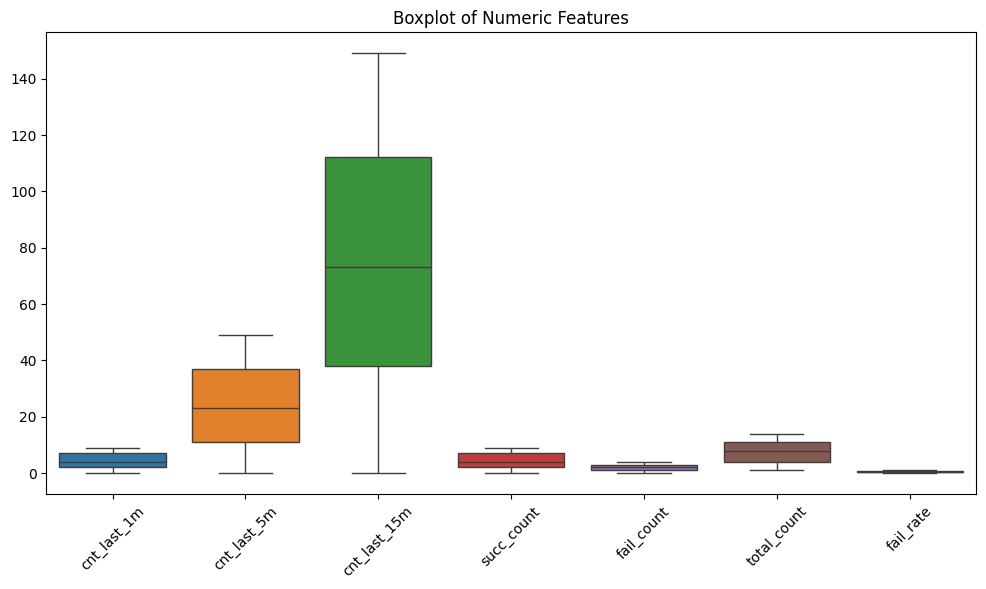

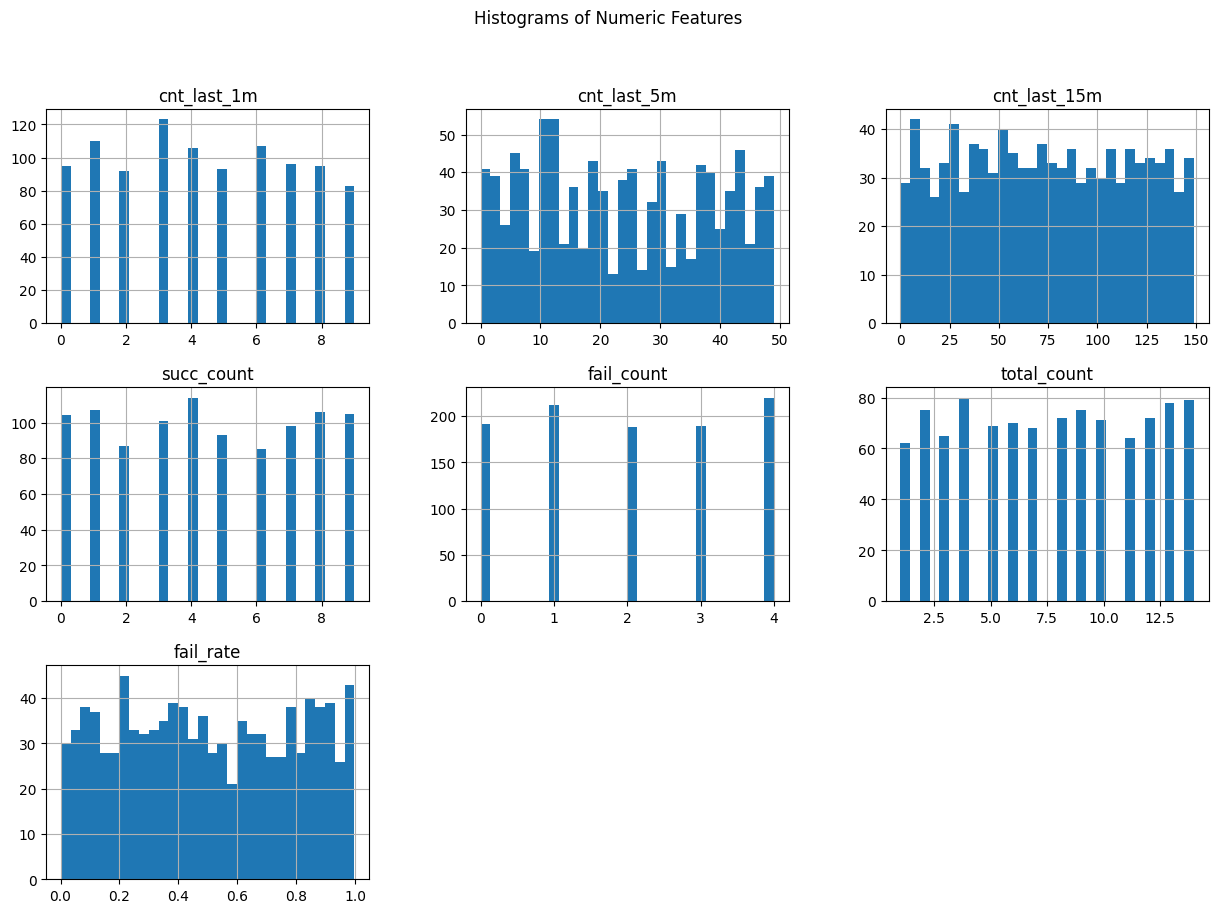

‚úÖ Best hyperparameters: {'n_estimators': 50, 'max_depth': 5}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       246

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493

ROC AUC: 1.0
PR AUC: 1.0


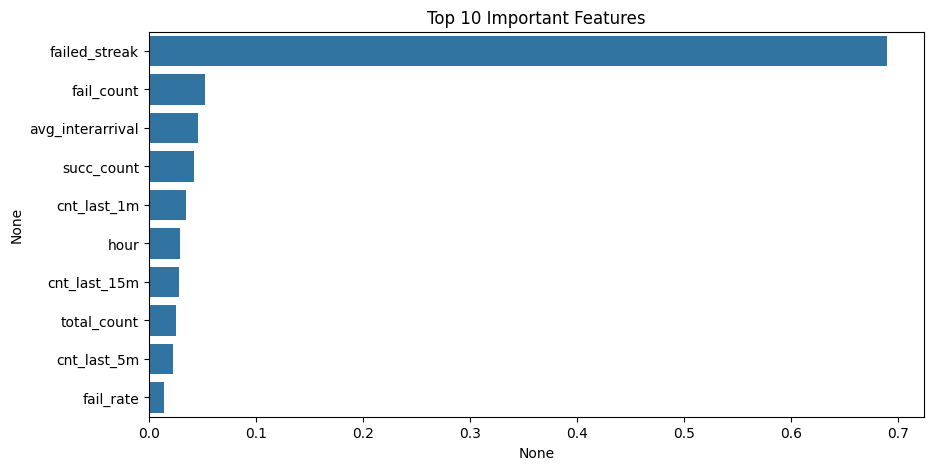

‚úÖ Model and feature list saved.
‚úÖ 1000 alerts generated. Check /home/bakri/projects/login-anomaly/data/alerts.csv
‚ö†Ô∏è Feedback file not found, skipping feedback matrix.

‚úÖ Production metrics recorded in /home/bakri/projects/login-anomaly/data/alerts_metrics.csv


In [2]:
# ==============================
# Login Anomaly Detection Full Pipeline
# Steps 1Ô∏è‚É£ to 11Ô∏è‚É£ integrated
# ==============================

import os
import sys
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'alerts_feedback.csv')
METRICS_FILE = os.path.join(BASE_DIR, 'alerts_metrics.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)
print("\n----- Result Distribution -----")
print(df['result'].value_counts())
print("\n----- Numeric Summary -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9Ô∏è‚É£ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# ==============================
# üîπ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# üîπ Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file=FEATURE_FILE_NEW, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data()
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")

# ==============================
# üîπ Step 8: Feedback Loop
# ==============================
def update_feedback_matrix(alert_file=ALERT_FILE, feedback_file=FEEDBACK_FILE):
    if not os.path.exists(feedback_file):
        print("‚ö†Ô∏è Feedback file not found, skipping feedback matrix.")
        return None
    
    alerts_df = pd.read_csv(alert_file)
    feedback_df = pd.read_csv(feedback_file)
    
    merged = pd.merge(alerts_df, feedback_df, on=['timestamp','ip','user'], how='left')
    
    merged['tp'] = ((merged['alert']==1) & (merged['label']==1)).astype(int)
    merged['fp'] = ((merged['alert']==1) & (merged['label']==0)).astype(int)
    merged['fn'] = ((merged['alert']==0) & (merged['label']==1)).astype(int)
    
    metrics = {
        'TP': merged['tp'].sum(),
        'FP': merged['fp'].sum(),
        'FN': merged['fn'].sum(),
        'Precision': merged['tp'].sum() / max(merged['tp'].sum()+merged['fp'].sum(),1),
        'Recall': merged['tp'].sum() / max(merged['tp'].sum()+merged['fn'].sum(),1)
    }
    
    print("\n‚úÖ Feedback Metrics:")
    for k,v in metrics.items():
        print(f"{k}: {v}")
    
    return metrics

feedback_metrics = update_feedback_matrix()

# ==============================
# üîπ Step 9: Production Metrics
# ==============================
def record_production_metrics(alert_file=ALERT_FILE, metrics_file=METRICS_FILE):
    if not os.path.exists(alert_file):
        print("‚ö†Ô∏è No alerts to record metrics.")
        return None
    
    alerts_df = pd.read_csv(alert_file)
    total_alerts = len(alerts_df)
    total_failed_prob = alerts_df['failed_prob'].sum()
    
    metrics = {
        'total_alerts': total_alerts,
        'sum_failed_prob': total_failed_prob
    }
    
    metrics_df = pd.DataFrame([metrics])
    if os.path.exists(metrics_file):
        metrics_df.to_csv(metrics_file, mode='a', header=False, index=False)
    else:
        metrics_df.to_csv(metrics_file, index=False)
    
    print(f"\n‚úÖ Production metrics recorded in {metrics_file}")
    return metrics_df

prod_metrics = record_production_metrics()


In [3]:
#!/usr/bin/env python3
# ==============================
# run_pipeline.py
# Full Login Anomaly Detection Pipeline
# Ready for cron automation
# ==============================

import os
import sys
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'alerts_feedback.csv')
METRICS_FILE = os.path.join(BASE_DIR, 'alerts_metrics.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# Helper Functions
# ==============================

def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

def geoip_lookup(ip, reader, geo_cache):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

# ==============================
# 1Ô∏è‚É£ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Target & Feature Engineering
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# Time features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Avg interarrival
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip, reader, geo_cache) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 3Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 4Ô∏è‚É£ Scale & Handle Imbalance
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 5Ô∏è‚É£ Train/Test Split & Train Model
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_

# Save model & scaler
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)

# ==============================
# 6Ô∏è‚É£ Predict New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file=FEATURE_FILE_NEW, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    df_new = pd.read_csv(feature_file)
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    return df_alert

alerts = predict_new_data()
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")

# ==============================
# 7Ô∏è‚É£ Feedback Loop
# ==============================
def update_feedback_matrix(alert_file=ALERT_FILE, feedback_file=FEEDBACK_FILE):
    if not os.path.exists(feedback_file):
        print("‚ö†Ô∏è Feedback file not found, skipping feedback matrix.")
        return None
    alerts_df = pd.read_csv(alert_file)
    feedback_df = pd.read_csv(feedback_file)
    merged = pd.merge(alerts_df, feedback_df, on=['timestamp','ip','user'], how='left')
    merged['tp'] = ((merged['alert']==1) & (merged['label']==1)).astype(int)
    merged['fp'] = ((merged['alert']==1) & (merged['label']==0)).astype(int)
    merged['fn'] = ((merged['alert']==0) & (merged['label']==1)).astype(int)
    metrics = {
        'TP': merged['tp'].sum(),
        'FP': merged['fp'].sum(),
        'FN': merged['fn'].sum(),
        'Precision': merged['tp'].sum() / max(merged['tp'].sum()+merged['fp'].sum(),1),
        'Recall': merged['tp'].sum() / max(merged['tp'].sum()+merged['fn'].sum(),1)
    }
    print("\n‚úÖ Feedback Metrics:")
    for k,v in metrics.items():
        print(f"{k}: {v}")
    return metrics

feedback_metrics = update_feedback_matrix()

# ==============================
# 8Ô∏è‚É£ Production Metrics
# ==============================
def record_production_metrics(alert_file=ALERT_FILE, metrics_file=METRICS_FILE):
    if not os.path.exists(alert_file):
        print("‚ö†Ô∏è No alerts to record metrics.")
        return None
    alerts_df = pd.read_csv(alert_file)
    total_alerts = len(alerts_df)
    total_failed_prob = alerts_df['failed_prob'].sum()
    metrics = {'total_alerts': total_alerts, 'sum_failed_prob': total_failed_prob}
    metrics_df = pd.DataFrame([metrics])
    if os.path.exists(metrics_file):
        metrics_df.to_csv(metrics_file, mode='a', header=False, index=False)
    else:
        metrics_df.to_csv(metrics_file, index=False)
    print(f"\n‚úÖ Production metrics recorded in {metrics_file}")
    return metrics_df

prod_metrics = record_production_metrics()


‚úÖ 1000 alerts generated. Check /home/bakri/projects/login-anomaly/data/alerts.csv
‚ö†Ô∏è Feedback file not found, skipping feedback matrix.

‚úÖ Production metrics recorded in /home/bakri/projects/login-anomaly/data/alerts_metrics.csv



----- Missing Values: auth_parsed_large.csv -----
timestamp    0.0
ip           0.0
user         0.0
result       0.0
dtype: float64

----- Missing Values: auth_features_large.csv -----
timestamp       0.0
ip              0.0
cnt_last_1m     0.0
cnt_last_5m     0.0
cnt_last_15m    0.0
succ_count      0.0
fail_count      0.0
total_count     0.0
fail_rate       0.0
event_user      0.0
event_result    0.0
dtype: float64

----- Result Distribution -----
result
success    821
failed     179
Name: count, dtype: int64

----- Numeric Summary -----
                           timestamp  cnt_last_1m  cnt_last_5m  cnt_last_15m  \
count                           1000  1000.000000  1000.000000   1000.000000   
mean   2025-10-01 08:19:29.999999744     4.373000    23.804000     73.995000   
min              2025-10-01 00:00:00     0.000000     0.000000      0.000000   
25%              2025-10-01 04:09:45     2.000000    11.000000     38.000000   
50%              2025-10-01 08:19:30     4.000000    

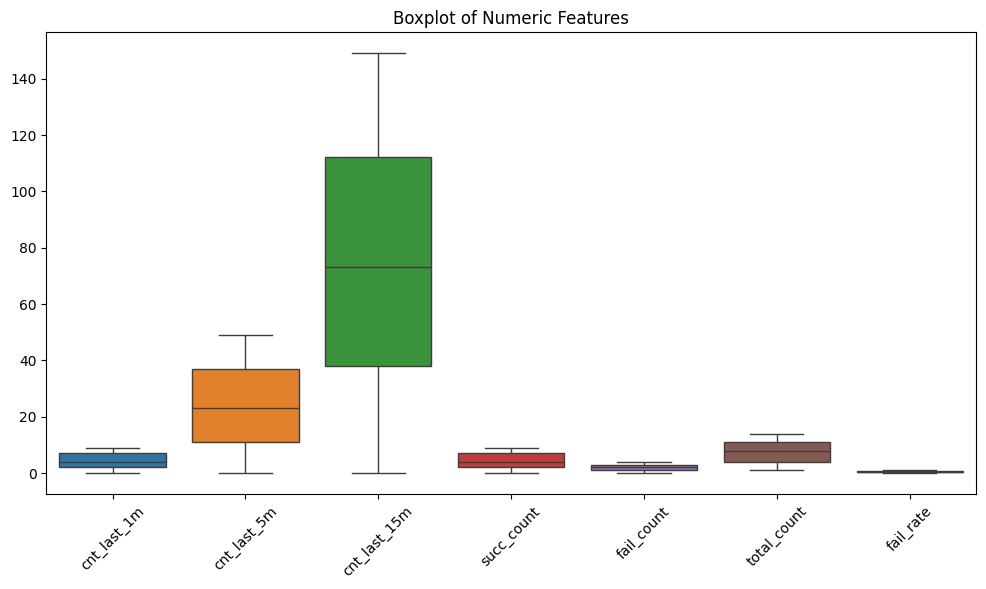

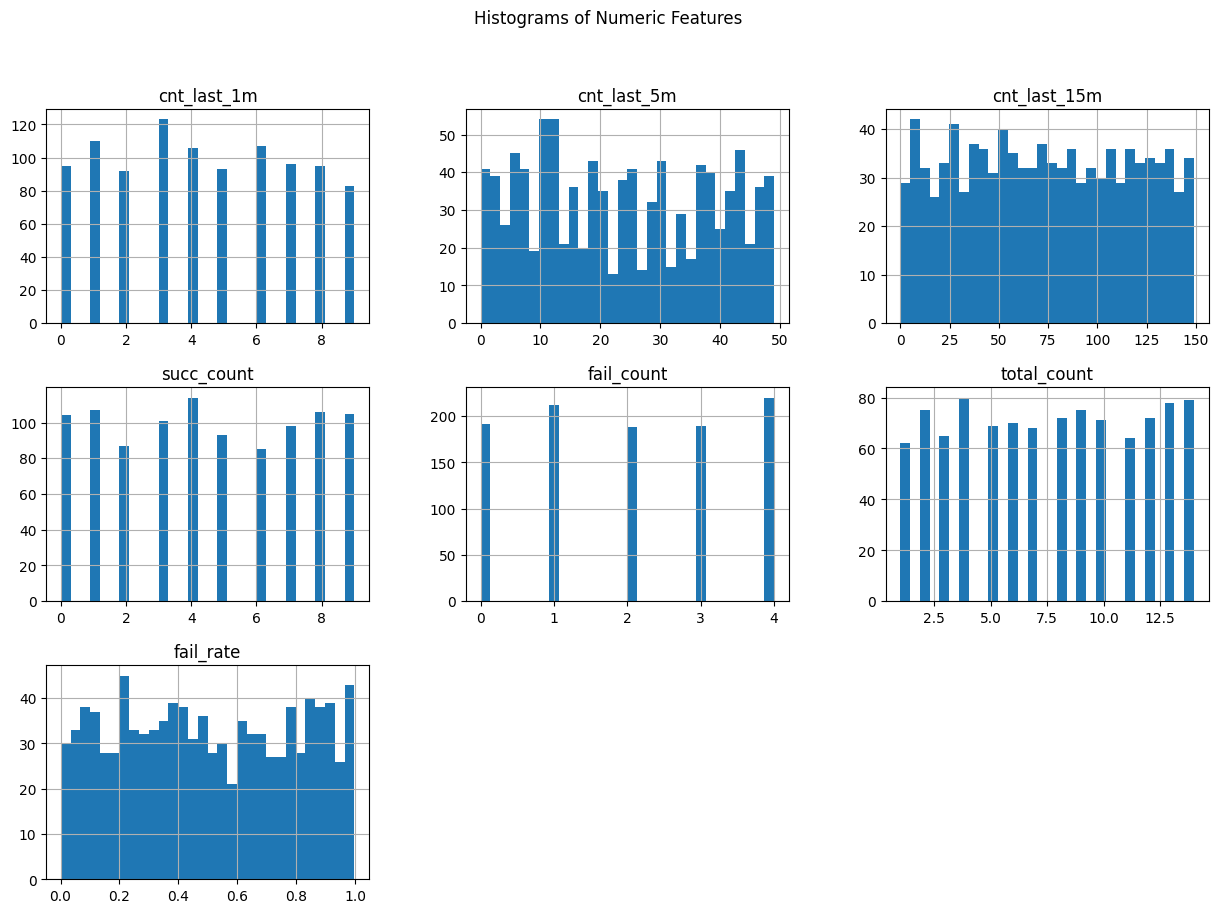

‚úÖ Best hyperparameters: {'n_estimators': 200, 'max_depth': 10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       246

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493

ROC AUC: 1.0
PR AUC: 1.0


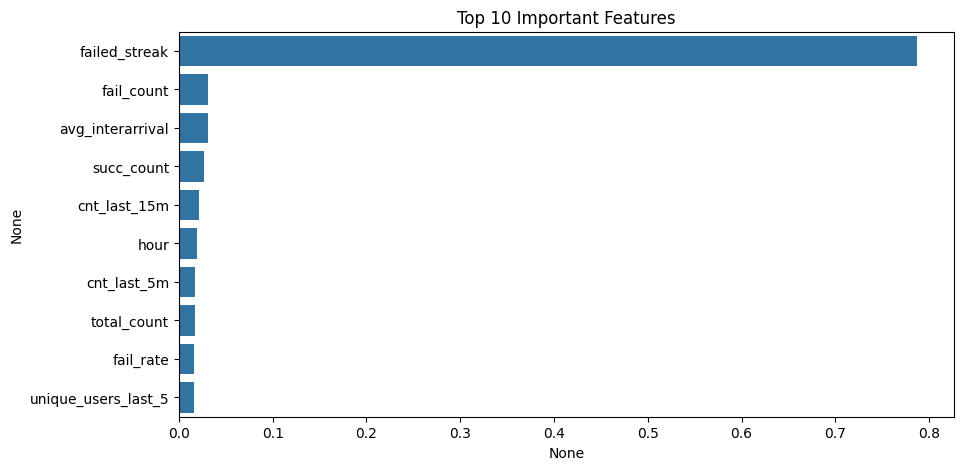

‚úÖ Model and feature list saved.
‚úÖ 1000 alerts generated. Check /home/bakri/projects/login-anomaly/data/alerts.csv
‚úÖ Feedback file updated: /home/bakri/projects/login-anomaly/data/alerts_feedback.csv
‚úÖ Production metrics recorded in /home/bakri/projects/login-anomaly/data/alerts_metrics.csv


In [4]:
# ==============================
# Login Anomaly Detection Full Pipeline (With Feedback Loop)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0Ô∏è‚É£ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'alerts_feedback.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"‚ùå File not found: {f}")

# ==============================
# 1Ô∏è‚É£ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2Ô∏è‚É£ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)
print("\n----- Result Distribution -----")
print(df['result'].value_counts())
print("\n----- Numeric Summary -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3Ô∏è‚É£ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4Ô∏è‚É£ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5Ô∏è‚É£ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6Ô∏è‚É£ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7Ô∏è‚É£ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8Ô∏è‚É£ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9Ô∏è‚É£ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("‚úÖ Best hyperparameters:", rs.best_params_)

# Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# üîπ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("‚úÖ Model and feature list saved.")

# ==============================
# üîπ Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("‚ö†Ô∏è Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"‚úÖ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("‚ö†Ô∏è No alerts generated.")

# ==============================
# üîπ Update Feedback Loop
# ==============================
if alerts is not None and not alerts.empty:
    if os.path.exists(FEEDBACK_FILE):
        df_feedback = pd.read_csv(FEEDBACK_FILE, parse_dates=['timestamp'])
        df_to_append = alerts[~alerts.set_index(['timestamp','ip','user']).index.isin(
            df_feedback.set_index(['timestamp','ip','user']).index
        )]
        if not df_to_append.empty:
            df_to_append['feedback'] = 'NA'
            df_feedback = pd.concat([df_feedback, df_to_append], ignore_index=True)
        df_feedback.to_csv(FEEDBACK_FILE, index=False)
    else:
        alerts['feedback'] = 'NA'
        alerts.to_csv(FEEDBACK_FILE, index=False)
    print(f"‚úÖ Feedback file updated: {FEEDBACK_FILE}")
else:
    print("‚ö†Ô∏è No alerts to update feedback.")

# ==============================
# üîπ Optional: record production metrics
# ==============================
metrics_file = os.path.join(BASE_DIR, 'alerts_metrics.csv')
metrics = {
    'timestamp': pd.Timestamp.now(),
    'num_alerts': len(alerts) if alerts is not None else 0
}
df_metrics = pd.DataFrame([metrics])
if os.path.exists(metrics_file):
    df_metrics.to_csv(metrics_file, mode='a', header=False, index=False)
else:
    df_metrics.to_csv(metrics_file, index=False)
print(f"‚úÖ Production metrics recorded in {metrics_file}")
